<a href="https://colab.research.google.com/github/Shawnhan666/recipes/blob/main/BA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load dataset**

In [4]:
import pandas as pd


data = pd.read_excel("/content/1st data (EO EDIT).xlsx")


def combine_rows(row1, row2):
    if pd.isna(row1) and pd.isna(row2):
        return None
    elif pd.isna(row1):
        return row2
    elif pd.isna(row2):
        return row1
    else:
        return f"{row1}: {row2}"

feature_names = [combine_rows(row1, row2) for row1, row2 in zip(data.columns, data.iloc[0])]

#  delate "Unnamed: <>:"
feature_names_cleaned = [name.replace(f"Unnamed: {i}:", "").strip() for i, name in enumerate(feature_names)]

#  rename
data.columns = feature_names_cleaned
data = data.iloc[1:].reset_index(drop=True)

data = pd.concat([pd.DataFrame([feature_names_cleaned], columns=feature_names_cleaned),
                          pd.DataFrame([data.columns], columns=feature_names_cleaned),
                          data], ignore_index=True)

# Remove the original first two rows (which are now third and fourth rows after adding new rows)
data = data.iloc[2:].reset_index(drop=True)

data

Postcode (first 4 characters only)  Gender Age (weeks) Gestational age  \
0                                  CV3    Male    6.571429             NaN   
1                                 NN10  Female    1.714286              38   
2                                  B92  Female    7.285714              37   
3                                 WV15    Male    5.571429              42   
4                                 BT48  Female   14.714286             NaN   
..                                 ...     ...         ...             ...   
498                               DE23  Female    6.714286              39   
499                               NG55   Male     8.571429              36   
500                                NaN   Male     7.285714             NaN   
501                               bt41   Male     6.428571              36   
502                               b818  female    7.142857              40   

    Birthweight (kg) Weight at presentation (kg) Weight centile  \
0                NaN                         NaN            NaN   
1               2.95                        3.21            NaN   
2               3.46                         4.8            NaN   
3                4.0                        4.22            NaN   
4                NaN                         NaN            NaN   
..               ...                         ...            ...   
498              2.5                         2.6            0.4   
499              2.1                        4.07            NaN   
500              NaN                         4.7            NaN   
501              2.3                        2.51            NaN   
502              NaN                         4.2            <25   

    Height at presentation (cm) Height centile  \
0                           NaN            NaN   
1                           NaN            NaN   
2                          56.5            NaN   
3                           NaN            NaN   
4                           NaN            NaN   
..                          ...            ...   
498                        48.5         >o.4th   
499                        60.2         ,<25TH   
500                         NaN            NaN   
501                         NaN            NaN   
502                        56.0            NaN   

    Racial group (White/ Afrocaribbean/ S Asian/ Chinese/ Other  ... Ascites  \
0                                      White - British           ...      No   
1                          White - any other White b/g           ...      No   
2                                      White - British           ...      No   
3                                      White - British           ...      No   
4                                        White - Irish           ...      No   
..                                                 ...           ...     ...   
498                                              asian           ...      No   
499                                        WHITE BLACK           ...      No   
500                                      white british           ...      No   
501                                        white irish           ...      No   
502                                      white british           ...      No   

    Polysplenia Interrupted IVC Triangular cord sign  \
0            No              No                   No   
1            No              No                   No   
2            No              No                   No   
3            No              No                   No   
4            No              No                   No   
..          ...             ...                  ...   
498          No              No                   No   
499          No              No                   No   
500          No              No                   No   
501          No              No                   No   
502          No              No                  Yes   

    Gallbladder (present/ a

In [5]:
# Recalculating missing values, unique values count, and value frequencies for each column
missing_values = data.isnull().sum()
unique_values_count = data.nunique()
high_freq_value = data.apply(lambda x: x.value_counts().idxmax() if x.nunique() > 0 else np.nan)
high_freq_count = data.apply(lambda x: x.value_counts().max() if x.nunique() > 0 else np.nan)

# Combining the results into a DataFrame again
data_overview = pd.DataFrame({
    'Missing Values': missing_values,
    'Unique Values Count': unique_values_count,
    'High Frequency Value': high_freq_value,
    'Value Frequencies': high_freq_count
})


# Calculate unique values for each column
unique_value_counts = data.apply(lambda x: x.nunique())

# For features with less than 10 unique values, get their frequencies
frequencies = data.apply(lambda x: x.value_counts().to_dict() if x.nunique() < 10 else None)

# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

info_df_simple = pd.DataFrame({
    "Missing Values": missing_values,
    "Unique Values Count": unique_value_counts,
    "Value Frequencies": frequencies
})

info_df_simple


Missing Values  \
Postcode (first 4 characters only)                               3   
Gender                                                           0   
Age (weeks)                                                      4   
Gestational age                                                117   
Birthweight (kg)                                               210   
Weight at presentation (kg)                                    130   
Weight centile                                                 489   
Height at presentation (cm)                                    294   
Height centile                                                 490   
Racial group (White/ Afrocaribbean/ S Asian/ Ch...               6   
Nutrition (breast fed/formula fed/ mixed)                      150   
Twin (monoz/dizyg/ no)                                         492   
Age at onset of jaundice (weeks)                               123   
Stool colour (pale/ indeterminate/ pigmented)                   11   
Age at onset of pale stools (weeks)                            345   
Associated anomalies: Malrotation/ non-rotation                210   
Situs inversus                                                 211   
Dextrocardia                                                   211   
Asplenia                                                       211   
ASD/VSD                                                        482   
Other cardiac anomaly                                          468   
Small bowel atresia                                            492   
Tracheo-oesophageal fistula                                    501   
Anorectal malformation                                         502   
Genetic mutation                                               476   
Cleft lip/palate                                               500   
Inguinal hernia                                                495   
Umbilical hernia                                               497   
Renal tract anomaly                                            491   
Other                                                          405   
Blood results at presentation: Total bilirubin                  17   
Conj bilirubin                                                 105   
GGT                                                             62   
AST                                                             67   
ALT                                                             34   
Alk p                                                           40   
A1AT level                                                     274   
PT                                                             173   
APTT                                                           197   
Protein                                                        202   
CMV IgM (positive/ negative)                                   354   
Ultrasound: Hepatomegaly                                        24   
Spleen length (cm)                                              87   
Ascites                                                         22   
Polysplenia                                                     22   
Interrupted IVC                                                 22   
Triangular cord sign                                            22   
Gallbladder (present/ atretic/ absent)                          22   
Gallbladder length (cm)                                        206   
Porta hepatis cyst? (yes/no)                                   100   
TBIDA or HIDA: Radioisotope study done?                          8   
Result (Excretory/  Non excretory)                             393   
Final diagnosis                                                  0   

                                                    Unique Values Count  \
Postcode (first 4 characters only)                                  402   
Gender                                                                6   
Age (weeks)                                   

<ipython-input-6-485a9102c153>:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_diagnosis = top_10_diagnosis.append(pd.Series([remaining_count], index=['Others']))


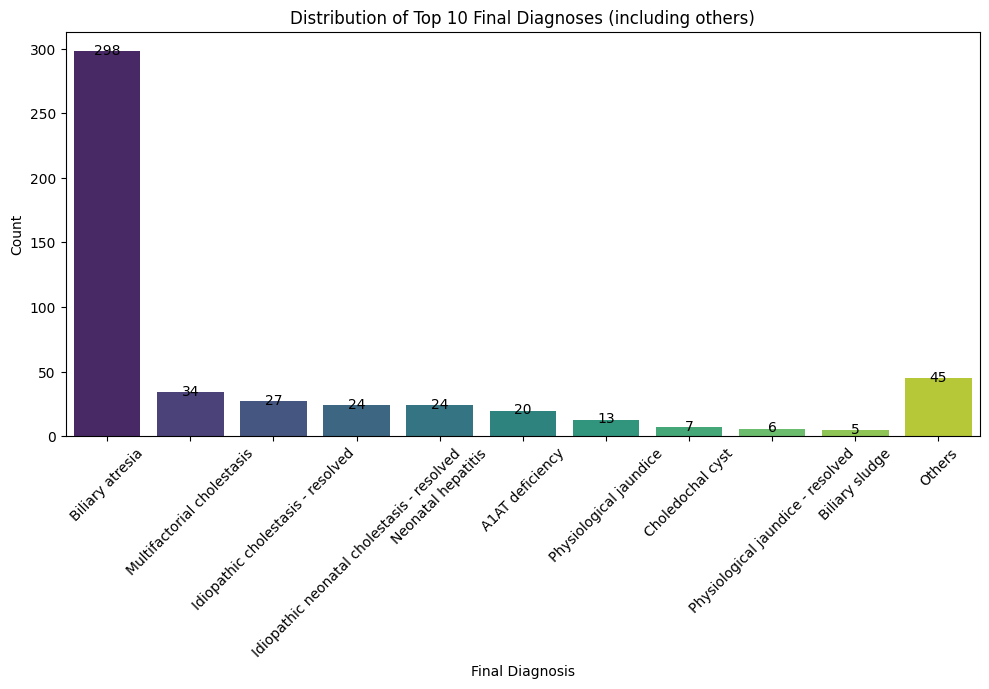

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of 'Final diagnosis'
diagnosis_counts = data['Final diagnosis'].value_counts()

# Get top 10 diagnosis
top_10_diagnosis = diagnosis_counts.head(10)
remaining_count = diagnosis_counts[10:].sum()

# Add 'Others' to the series if there are more than 10 unique diagnoses
if len(diagnosis_counts) > 10:
    top_10_diagnosis = top_10_diagnosis.append(pd.Series([remaining_count], index=['Others']))

# Adjusting the figure and re-plotting with updated titles and labels
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_diagnosis.index, y=top_10_diagnosis.values, palette='viridis', orient="v")
plt.title("Distribution of Top 10 Final Diagnoses (including others)")
plt.ylabel('Count')
plt.xlabel('Final Diagnosis')

# Adding frequency on top of each bar
for index, value in enumerate(top_10_diagnosis.values):
    plt.text(index, value + 0.5, f'{value}', ha='center', va='center')  # Adjusted the position for clearer visibility

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## **Data preprocessing**

# Gender

In [7]:
# Standardizing the 'Gender' column values
data['Gender'] = data['Gender'].str.strip().str.lower().replace({
    'female': 'Female',
    'male': 'Male'
})

# Encoding the 'Gender' column values
gender_mapping = {'Female': 0, 'Male': 1}
data['Gender_encoded'] = data['Gender'].map(gender_mapping)

# Display the unique values and their frequencies for the cleaned and encoded 'Gender' column
gender_cleaned_counts = data['Gender'].value_counts()
gender_encoded_counts = data['Gender_encoded'].value_counts()
# Dropping the original 'Gender' column
data.drop('Gender', axis=1, inplace=True)




# Age

In [8]:
# Apply the transformation，advised by Evelyn from Birmingham Women’s and Children’s Hospitals NHS Foundation Trust
data.loc[data["Age (weeks)"] == 36.0, "Age (weeks)"] = 1.8


In [9]:
# IQR for outliers
Q1 = data["Age (weeks)"].quantile(0.25)
Q3 = data["Age (weeks)"].quantile(0.75)
IQR = Q3 - Q1

#
outliers_iqr = data[(data["Age (weeks)"] < (Q1 - 1.5 * IQR)) | (data["Age (weeks)"] > (Q3 + 1.5 * IQR))]

# z-score for outliers
mean_age = data["Age (weeks)"].mean()
std_age = data["Age (weeks)"].std()
outliers_z = data[(data["Age (weeks)"] < (mean_age - 3 * std_age)) | (data["Age (weeks)"] > (mean_age + 3 * std_age))]

# check missing value
missing_values = data["Age (weeks)"].isna().sum()

outliers_iqr_count = len(outliers_iqr)
outliers_z_count = len(outliers_z)

# combine outliers by z-score and IQR
combined_outliers = pd.concat([outliers_iqr, outliers_z]).drop_duplicates().reset_index(drop=True)

combined_outliers[["Age (weeks)"]]



Age (weeks)
0    15.571429
1    19.714286
2    16.571429
3         16.0
4    18.857143
5    18.428571
6    22.428571
7         17.0
8    16.428571
9    16.142857
10   18.428571
11   15.857143
12   18.285714
13   16.571429
14   20.714286
15        19.0
16   15.428571
17        21.0
18   17.428571

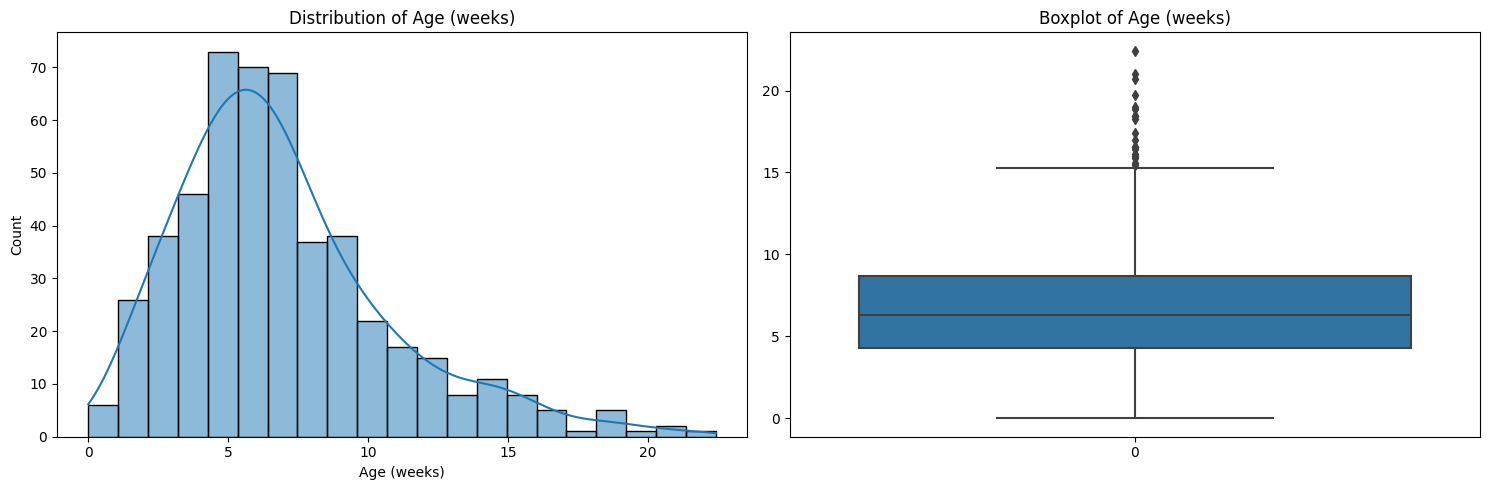

count     499.000000
unique    121.000000
top         6.285714
freq       14.000000
Name: Age (weeks), dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics of the "Age (weeks)" variable
stats = data["Age (weeks)"].describe()

# Plotting the distribution and a boxplot for "Age (weeks)"
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Age (weeks)"], kde=True).set_title("Distribution of Age (weeks)")

plt.subplot(1, 2, 2)
sns.boxplot(data["Age (weeks)"]).set_title("Boxplot of Age (weeks)")

plt.tight_layout()
plt.show()

stats


In [11]:
# Identify non-numeric values in the 'Age (weeks)' column
non_numeric_values = data['Age (weeks)'][data['Age (weeks)'].apply(lambda x: not isinstance(x, (int, float)))]

non_numeric_values_unique = non_numeric_values.unique()
# Attempt to convert 'Age (weeks)' to a numeric type and identify any errors
try:
    data['Age (weeks)'] = pd.to_numeric(data['Age (weeks)'])
    conversion_status = "Conversion successful"
except Exception as e:
    conversion_status = str(e)

conversion_status

'Conversion successful'

# Gestational age

In [12]:
# Apply the transformations，follow evelyn suggestion
data.loc[data["Gestational age"] == 2.0, "Gestational age"] = 34
data.loc[data["Gestational age"] == 5.0, "Gestational age"] = 40
data.loc[data["Gestational age"] == 1.8, "Gestational age"] = 36

In [13]:
# Check unique values of "Gestational age"
unique_values_gestational = data["Gestational age"].unique()
#unique_values_gestational

data["Gestational age"] = pd.to_numeric(data["Gestational age"], errors='coerce')


Q1_gestational = data["Gestational age"].quantile(0.25)
Q3_gestational = data["Gestational age"].quantile(0.75)
IQR_gestational = Q3_gestational - Q1_gestational


outliers_iqr_gestational = data[(data["Gestational age"] < (Q1_gestational - 1.5 * IQR_gestational)) |
                                (data["Gestational age"] > (Q3_gestational + 1.5 * IQR_gestational))]

mean_gestational = data["Gestational age"].mean()
std_gestational = data["Gestational age"].std()
outliers_z_gestational = data[(data["Gestational age"] < (mean_gestational - 3 * std_gestational)) |
                              (data["Gestational age"] > (mean_gestational + 3 * std_gestational))]

combined_outliers_gestational = pd.concat([outliers_iqr_gestational, outliers_z_gestational]).drop_duplicates().reset_index(drop=True)

combined_outliers_gestational[["Gestational age"]]


Gestational age
0              27.0
1              31.0
2              27.0
3              30.0
4              28.0
5              30.0
6              31.0
7              27.0
8              28.0
9              28.0
10             28.0
11             26.0
12             29.0
13             29.0
14             28.0
15             30.0
16             30.0
17             28.0
18             28.0
19             28.0
20             27.0
21             30.0
22             32.0
23             28.0
24             27.0
25             26.0
26             32.0
27             28.0

In [14]:
#check missing value
missing_values_gestational = data[data["Gestational age"].isna()]

missing_values_gestational[["Gestational age"]]


Gestational age
0                NaN
4                NaN
5                NaN
11               NaN
16               NaN
..               ...
484              NaN
493              NaN
495              NaN
497              NaN
500              NaN

[120 rows x 1 columns]

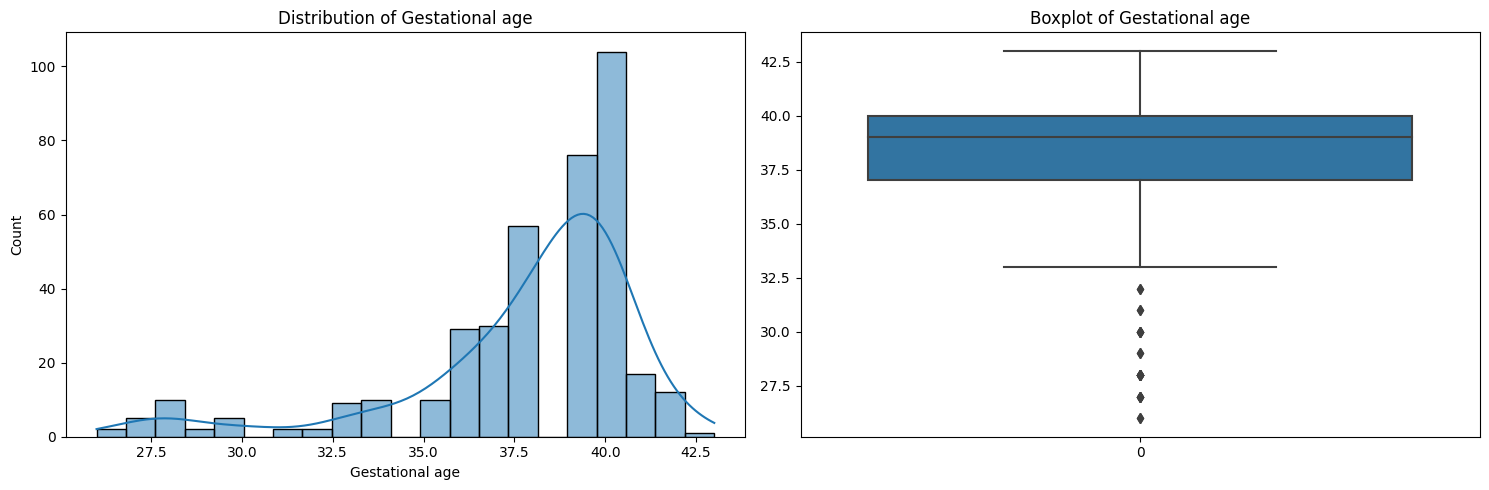

count    383.000000
mean      37.796345
std        3.240821
min       26.000000
25%       37.000000
50%       39.000000
75%       40.000000
max       43.000000
Name: Gestational age, dtype: float64

In [15]:
# Convert non-numeric values to NaN
non_numeric_values = ["\xa0", "B", "b", "NOT RECORDED"]
data["Gestational age"] = data["Gestational age"].apply(lambda x: x if x not in non_numeric_values else None)


# Basic statistics of the "Gestational age" variable
stats_gestational = data["Gestational age"].describe()

# Plotting the distribution and a boxplot for "Gestational age"
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Gestational age"], kde=True).set_title("Distribution of Gestational age")

plt.subplot(1, 2, 2)
sns.boxplot(data["Gestational age"]).set_title("Boxplot of Gestational age")

plt.tight_layout()
plt.show()

stats_gestational

# Birthweight(kg)

In [16]:

data["Birthweight (kg)"] = pd.to_numeric(data["Birthweight (kg)"], errors='coerce')
unique_values_birthweight = data["Birthweight (kg)"].unique()

unique_values_birthweight


array([  nan, 2.95 , 3.46 , 4.   , 3.2  , 3.7  , 2.7  , 3.85 , 2.94 ,
       3.69 , 3.06 , 4.03 , 3.6  , 3.4  , 3.5  , 3.12 , 2.75 , 3.21 ,
       2.35 , 4.1  , 3.14 , 3.88 , 3.612, 3.3  , 2.1  , 3.29 , 2.78 ,
       3.76 , 1.436, 2.72 , 2.58 , 3.   , 1.62 , 3.25 , 2.59 , 3.1  ,
       2.96 , 3.05 , 3.63 , 3.77 , 2.04 , 3.16 , 2.86 , 4.57 , 3.57 ,
       3.35 , 2.9  , 3.02 , 3.47 , 3.94 , 2.88 , 2.32 , 2.425, 3.11 ,
       4.33 , 2.5  , 1.975, 1.5  , 3.07 , 3.8  , 3.78 , 2.27 , 3.49 ,
       2.76 , 3.01 , 3.485, 2.6  , 3.9  , 2.92 , 3.48 , 3.04 , 3.15 ,
       3.005, 3.18 , 3.65 , 3.87 , 1.07 , 3.68 , 3.54 , 1.9  , 2.63 ,
       4.01 , 2.84 , 3.28 , 3.81 , 3.83 , 3.03 , 3.24 , 3.52 , 2.38 ,
       2.8  , 4.18 , 3.44 , 3.19 , 4.11 , 2.77 , 1.19 , 0.99 , 2.   ,
       1.14 , 0.5  , 2.51 , 2.4  , 2.3  , 0.6  , 1.7  , 2.2  , 2.05 ,
       1.79 , 0.91 , 1.2  , 2.26 , 1.3  , 5.1  , 3.17 , 1.   , 1.8  ,
       0.7  , 1.1  ])

In [17]:
# Convert the special blank character to NaN for "Birthweight (kg)"
data["Birthweight (kg)"] = data["Birthweight (kg)"].apply(lambda x: x if x != "\xa0" else None)

# Basic statistics of the cleaned "Birthweight (kg)" variable
stats_birthweight_cleaned = data["Birthweight (kg)"].describe()


Q1_birthweight = data["Birthweight (kg)"].quantile(0.25)
Q3_birthweight = data["Birthweight (kg)"].quantile(0.75)
IQR_birthweight = Q3_birthweight - Q1_birthweight


outliers_iqr_birthweight = data[(data["Birthweight (kg)"] < (Q1_birthweight - 1.5 * IQR_birthweight)) |
                                (data["Birthweight (kg)"] > (Q3_birthweight + 1.5 * IQR_birthweight))]

mean_birthweight = data["Birthweight (kg)"].mean()
std_birthweight = data["Birthweight (kg)"].std()
outliers_z_birthweight = data[(data["Birthweight (kg)"] < (mean_birthweight - 3 * std_birthweight)) |
                              (data["Birthweight (kg)"] > (mean_birthweight + 3 * std_birthweight))]


combined_outliers_birthweight = pd.concat([outliers_iqr_birthweight, outliers_z_birthweight]).drop_duplicates().reset_index(drop=True)


missing_values_birthweight = data["Birthweight (kg)"].isna().sum()

combined_outliers_birthweight[["Birthweight (kg)"]], missing_values_birthweight


(    Birthweight (kg)
 0              1.436
 1              1.500
 2              1.070
 3              1.190
 4              0.990
 5              1.140
 6              0.500
 7              1.500
 8              0.600
 9              0.910
 10             1.200
 11             1.300
 12             5.100
 13             1.200
 14             1.000
 15             1.000
 16             1.000
 17             0.700
 18             1.100,
 210)

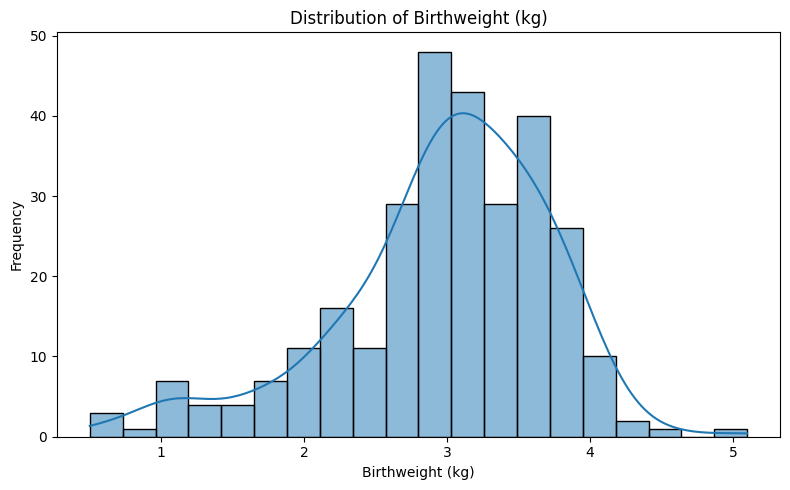

In [18]:




# Plotting the distribution of the original "Birthweight (kg)" variable
plt.figure(figsize=(8, 5))
sns.histplot(data["Birthweight (kg)"], kde=True).set_title("Distribution of Birthweight (kg)")
plt.xlabel("Birthweight (kg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Weight at presentation (kg)



In [19]:
# Apply the transformations
data.loc[data["Weight at presentation (kg)"] == 28.0, "Weight at presentation (kg)"] = 2.8
data.loc[data["Weight at presentation (kg)"] == 23.16, "Weight at presentation (kg)"] = 3.16

In [20]:

data["Weight at presentation (kg)"] = pd.to_numeric(data["Weight at presentation (kg)"], errors='coerce')


Q1_weight = data["Weight at presentation (kg)"].quantile(0.25)
Q3_weight = data["Weight at presentation (kg)"].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

outliers_iqr_weight = data[(data["Weight at presentation (kg)"] < (Q1_weight - 1.5 * IQR_weight)) |
                           (data["Weight at presentation (kg)"] > (Q3_weight + 1.5 * IQR_weight))]

mean_weight = data["Weight at presentation (kg)"].mean()
std_weight = data["Weight at presentation (kg)"].std()
outliers_z_weight = data[(data["Weight at presentation (kg)"] < (mean_weight - 3 * std_weight)) |
                         (data["Weight at presentation (kg)"] > (mean_weight + 3 * std_weight))]

combined_outliers_weight = pd.concat([outliers_iqr_weight, outliers_z_weight]).drop_duplicates().reset_index(drop=True)

missing_values_weight = data["Weight at presentation (kg)"].isna().sum()

combined_outliers_weight[["Weight at presentation (kg)"]], missing_values_weight


(    Weight at presentation (kg)
 0                          8.02
 1                          7.50
 2                          6.90
 3                          7.05
 4                          9.95
 5                          7.10
 6                          8.40
 7                          7.70
 8                         11.50
 9                          8.90
 10                         6.95
 11                         7.20
 12                         6.80
 13                         6.90
 14                         8.10
 15                         6.80,
 130)

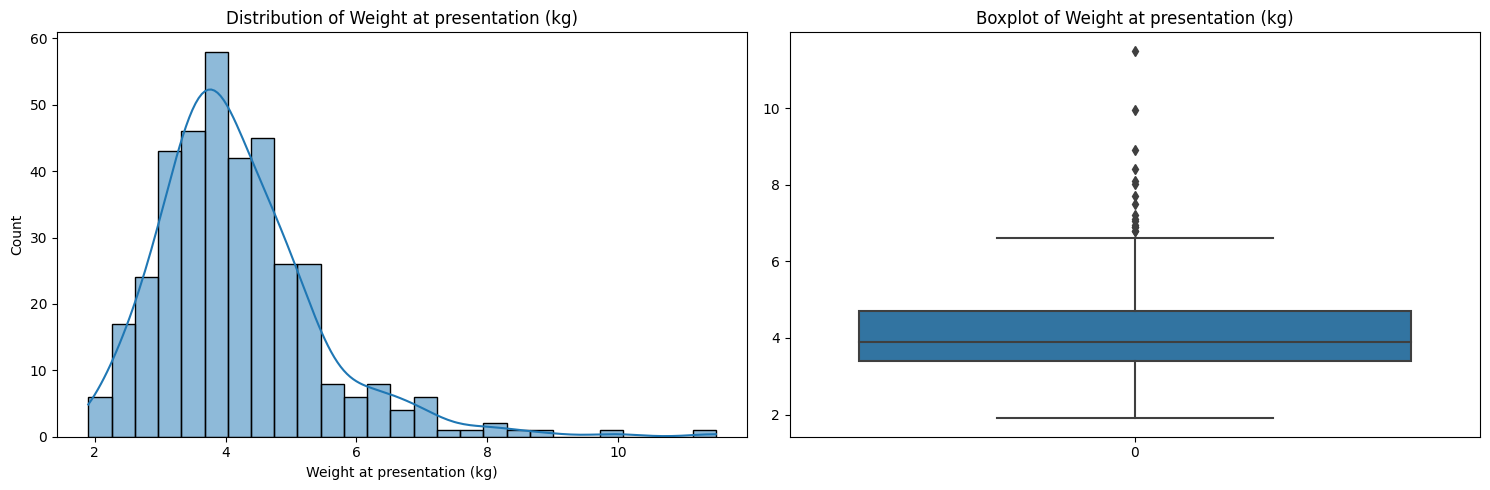

In [21]:


# Plotting the distribution and a boxplot for the cleaned "Weight at presentation (kg)" variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Weight at presentation (kg)"], kde=True).set_title("Distribution of Weight at presentation (kg)")

plt.subplot(1, 2, 2)
sns.boxplot(data["Weight at presentation (kg)"]).set_title("Boxplot of Weight at presentation (kg)")

plt.tight_layout()
plt.show()


In [22]:
median_weight = data["Weight at presentation (kg)"].median()




# Confirming that there are no missing values left and the two values are replaced
missing_values_weight = data["Weight at presentation (kg)"].isnull().sum()
values_28_and_23_replaced = 28.00 not in data["Weight at presentation (kg)"].values and 23.16 not in data["Weight at presentation (kg)"].values

missing_values_weight, values_28_and_23_replaced


(130, True)

# Height at presentation (cm)

In [23]:
# Apply the transformation
data.loc[data["Height at presentation (cm)"] == 2.88, "Height at presentation (cm)"] = 49.3

data.loc[data["Height at presentation (cm)"] == 2.88, "Height at presentation (cm)"] = pd.NA


In [24]:

data["Height at presentation (cm)"] = pd.to_numeric(data["Height at presentation (cm)"], errors='coerce')

Q1_height = data["Height at presentation (cm)"].quantile(0.25)
Q3_height = data["Height at presentation (cm)"].quantile(0.75)
IQR_height = Q3_height - Q1_height

outliers_iqr_height = data[(data["Height at presentation (cm)"] < (Q1_height - 1.5 * IQR_height)) |
                           (data["Height at presentation (cm)"] > (Q3_height + 1.5 * IQR_height))]

mean_height = data["Height at presentation (cm)"].mean()
std_height = data["Height at presentation (cm)"].std()
outliers_z_height = data[(data["Height at presentation (cm)"] < (mean_height - 3 * std_height)) |
                         (data["Height at presentation (cm)"] > (mean_height + 3 * std_height))]

combined_outliers_height = pd.concat([outliers_iqr_height, outliers_z_height]).drop_duplicates().reset_index(drop=True)

missing_values_height = data["Height at presentation (cm)"].isna().sum()

combined_outliers_height[["Height at presentation (cm)"]], missing_values_height


(   Height at presentation (cm)
 0                         39.7
 1                         34.0
 2                         42.0
 3                         43.7
 4                         28.8
 5                         44.0
 6                         44.0
 7                         30.0
 8                         35.0
 9                         35.0,
 294)

<ipython-input-25-e52ea859f8ce>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Height at presentation (cm)"], shade=True, color='red')


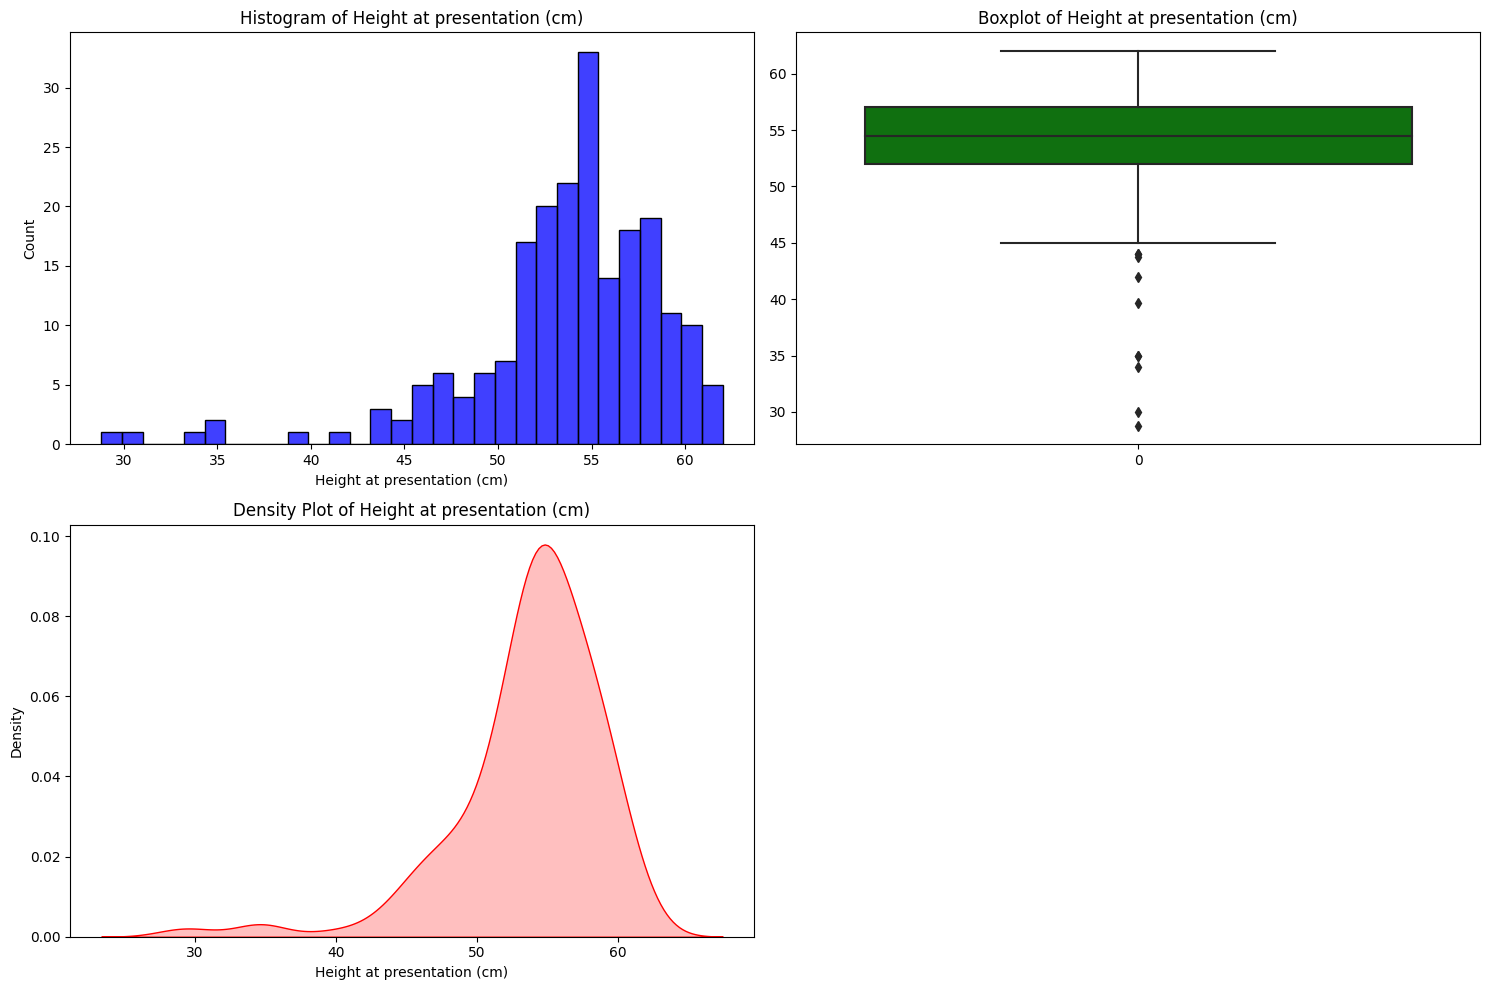

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data["Height at presentation (cm)"], kde=False, bins=30, color='blue')
plt.title('Histogram of Height at presentation (cm)')
plt.xlabel('Height at presentation (cm)')
plt.ylabel('Count')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data["Height at presentation (cm)"], color='green')
plt.title('Boxplot of Height at presentation (cm)')

# Density Plot
plt.subplot(2, 2, 3)
sns.kdeplot(data["Height at presentation (cm)"], shade=True, color='red')
plt.title('Density Plot of Height at presentation (cm)')
plt.xlabel('Height at presentation (cm)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# Racial group

In [26]:
#rename
data = data.rename(columns={
    "Racial group (White/ Afrocaribbean/ S Asian/ Chinese/ Other":
    "Racial group (White, Asian British, Black British and Mixed)"
})

In [27]:

# Check the unique values and their counts for the correct column name
racial_group_column = "Racial group (White, Asian British, Black British and Mixed)"
racial_group_counts = data[racial_group_column].value_counts()
#racial_group_counts


# Convert all values to lowercase
data[racial_group_column] = data[racial_group_column].str.lower().str.strip()

# Map similar categories to a common label
racial_group_mapping = {
    "white - british": "white",
    "white british": "white",
    "white": "white",
    "white - irish": "white",
    "white - any other white b/g": "white",
    "white irish": "white",
    "asian/asian brit - pakistani": "asian british",
    "asian british": "asian british",
    "asian/asian brit - indian": "asian british",
    "asian/asian brit - bangladeshi": "asian british",
    "asian/asian brit-any oth asian b/g": "asian british",
    "black/blk brit-african": "black british",
    "black/blk brit-caribbean": "black british",
    "black/blk brit-any oth blk b/g": "black british",
    "mixed-white & asian": "mixed",
    "mixed-any oth mixed background": "mixed",
    "mixed-white & black african": "mixed",
    "mixed-white & black caribbean": "mixed",
    "other ethnic group - chinese": "other/unknown"
}

# Apply the mapping
data[racial_group_column] = data[racial_group_column].replace(racial_group_mapping)

# For any other values not specified in our mapping, label them as 'other'
remaining_unique_values = data[racial_group_column].unique()
for val in remaining_unique_values:
    if val not in racial_group_mapping.values() and pd.notna(val):
        racial_group_mapping[val] = "other/unknown"

data[racial_group_column] = data[racial_group_column].replace(racial_group_mapping)




data[racial_group_column] = data[racial_group_column].replace(racial_group_mapping)

# 6. Treat 'other/unknown' as missing values and replace
data[racial_group_column] = data[racial_group_column].replace({"other/unknown": pd.NA})

# Check the updated categories
updated_racial_group_counts = data[racial_group_column].value_counts(dropna=False)
updated_racial_group_counts


white            317
<NA>              73
asian british     73
mixed             22
black british     12
NaN                6
Name: Racial group (White, Asian British, Black British and Mixed), dtype: int64

# Nutrition

In [28]:
# Analyze the "Nutrition (breast fed/formula fed/ mixed)" column
nutrition_column = "Nutrition (breast fed/formula fed/ mixed)"
nutrition_counts = data[nutrition_column].value_counts(dropna=False)

# Classify the entries based on the provided criteria
data[nutrition_column] = data[nutrition_column].str.strip().str.lower()

# Mapping the values
nutrition_mapping = {
    "formula": "Formula",
    "formula feed": "Formula",
    "infant formula": "Formula",
    "mixed": "Mixed",
    "breast milk": "Breast Milk/Breast feed",
    "breast feed": "Breast Milk/Breast feed",
    "breast": "Breast Milk/Breast feed",
    "infantri feed": pd.NA,
    "bottle feed": pd.NA,
    "": pd.NA,
    "fmixed": "Mixed"
}

# Apply the mapping
data[nutrition_column] = data[nutrition_column].replace(nutrition_mapping)

# Re-check the distribution of the feature after classification
final_nutrition_counts = data[nutrition_column].value_counts(dropna=False)

# For any NaN or unrecognized values, replace them with pd.NA (representing missing values)
data[nutrition_column] = data[nutrition_column].fillna(pd.NA)

# Check the updated distribution of the "Nutrition" feature
updated_nutrition_distribution = data[nutrition_column].value_counts(dropna=False)
updated_nutrition_distribution



<NA>                       152
Formula                    139
Mixed                      120
Breast Milk/Breast feed     92
Name: Nutrition (breast fed/formula fed/ mixed), dtype: int64

# Twin

In [29]:
# Extract and analyze the "Twin (monoz/dizyg/ no)" column
twin_column = "Twin (monoz/dizyg/ no)"
twin_counts = data [twin_column].value_counts(dropna=False)
twin_percentage = (twin_counts / len(data )) * 100

twin_counts, twin_percentage


(NaN                       492
 Yes                         6
 YES                         2
 yes                         2
 Twin (monoz/dizyg/ no)      1
 Name: Twin (monoz/dizyg/ no), dtype: int64,
 NaN                       97.813121
 Yes                        1.192843
 YES                        0.397614
 yes                        0.397614
 Twin (monoz/dizyg/ no)     0.198807
 Name: Twin (monoz/dizyg/ no), dtype: float64)

In [30]:
# 2. Process the "Twin (monoz/dizyg/ no)" column
data['Twin (monoz/dizyg/ no)'] = data['Twin (monoz/dizyg/ no)'].str.lower().apply(lambda x: 1 if x == "yes" or x == "twin (monoz/dizyg/ no)" else 0)

# 3. Check the updated distribution of the "Twin" feature
updated_twin_distribution = data['Twin (monoz/dizyg/ no)'].value_counts(dropna=False)
print(updated_twin_distribution)

0    492
1     11
Name: Twin (monoz/dizyg/ no), dtype: int64


# Age at onset of jaundice (weeks)

In [31]:
# Analyze the "Age at onset of jaundice (weeks)" column
jaundice_age_column = "Age at onset of jaundice (weeks)"
jaundice_age_counts = data[jaundice_age_column].value_counts(dropna=False)
jaundice_age_missing = data[jaundice_age_column].isna().sum()
jaundice_age_stats = data[jaundice_age_column].describe()

print("Missing Values:", jaundice_age_missing)
print("\nStatistics for 'Age at onset of jaundice (weeks)':")
print(jaundice_age_stats)

Missing Values: 123

Statistics for 'Age at onset of jaundice (weeks)':
count     380.0
unique     20.0
top         1.0
freq      181.0
Name: Age at onset of jaundice (weeks), dtype: float64


In [32]:
# Convert non-numeric entries to NaN
data[jaundice_age_column] = pd.to_numeric(data[jaundice_age_column], errors='coerce')



# Verify if there are any missing values left in the column
remaining_missing_values = data[jaundice_age_column].isna().sum()
remaining_missing_values


123

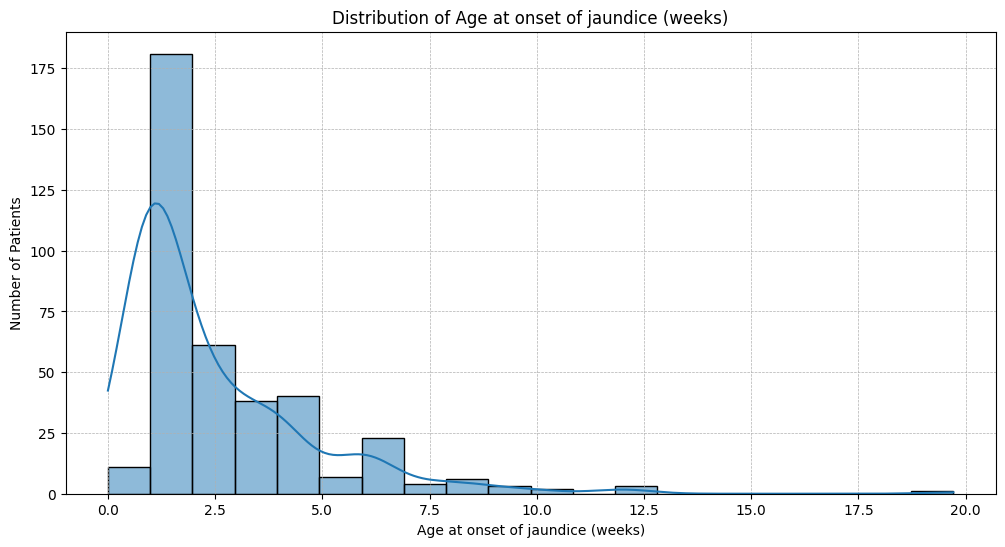

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of "Age at onset of jaundice (weeks)"
plt.figure(figsize=(12, 6))
sns.histplot(data[jaundice_age_column], bins=20, kde=True)
plt.title("Distribution of Age at onset of jaundice (weeks)")
plt.xlabel("Age at onset of jaundice (weeks)")
plt.ylabel("Number of Patients")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


# Age at onset of pale stools (weeks)

In [34]:
# Analyze the "Age at onset of pale stools (weeks)" column
pale_stools_age_column = "Age at onset of pale stools (weeks)"
pale_stools_counts = data[pale_stools_age_column].value_counts(dropna=False)
pale_stools_missing = data[pale_stools_age_column].isna().sum()

pale_stools_missing, pale_stools_counts.head(10)  # Displaying the top 10 values for clarity


(345,
 NaN    345
 1       56
 2       27
 3       24
 4       16
 7        9
 6        8
 5        8
 8        4
 0        3
 Name: Age at onset of pale stools (weeks), dtype: int64)

In [35]:
# Replace the blank strings with NaN for missing values in "Age at onset of pale stools (weeks)" column
data[pale_stools_age_column].replace("\xa0", pd.NA, inplace=True)

# Calculate the total missing values and its proportion
total_missing_values = data[pale_stools_age_column].isna().sum()
missing_proportion = (total_missing_values / len(data)) * 100

total_missing_values, missing_proportion


(345, 68.58846918489066)

In [36]:
# Drop the "Age at onset of pale stools (weeks)" column from the dataset
#data.drop(columns=[pale_stools_age_column], inplace=True)




# Stool colour

In [37]:
# Analyze the "Stool colour (pale/ indeterminate/ pigmented)" column
stool_colour_column = "Stool colour (pale/ indeterminate/ pigmented)"
stool_colour_counts = data[stool_colour_column].value_counts(dropna=False)
stool_colour_missing = data[stool_colour_column].isna().sum()


# Convert all entries to lowercase for "Stool colour (pale/ indeterminate/ pigmented)" column
data[stool_colour_column] = data[stool_colour_column].str.lower()

# Replace the blank strings with NaN for missing values
data[stool_colour_column].replace("\xa0", pd.NA, inplace=True)

# Get the counts for the "Stool colour (pale/ indeterminate/ pigmented)" column after processing
stool_colour_new_counts = data[stool_colour_column].value_counts(dropna=False)

stool_colour_new_counts

pale             225
pigmented        178
indeterminate     89
NaN               11
Name: Stool colour (pale/ indeterminate/ pigmented), dtype: int64

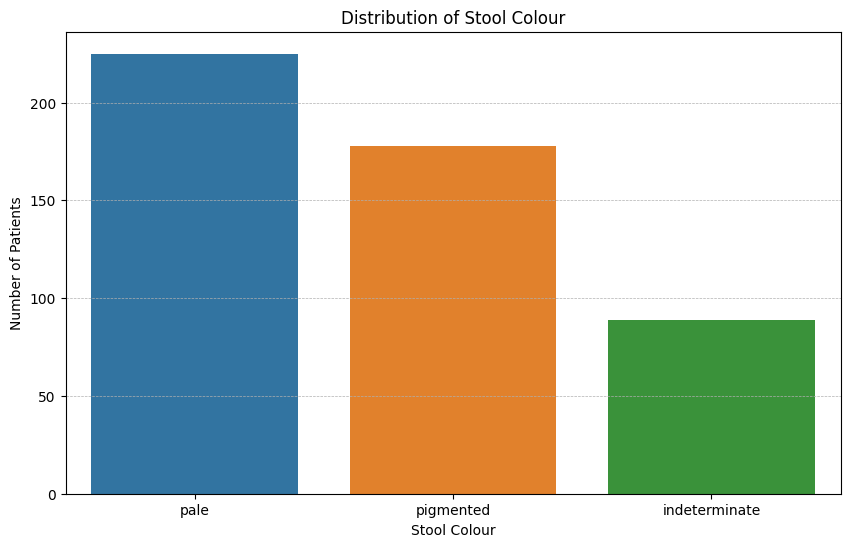

In [38]:


# Visualizing the distribution of "Stool colour (pale/ indeterminate/ pigmented)"
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=stool_colour_column, order=data[stool_colour_column].value_counts().index)
plt.title("Distribution of Stool Colour")
plt.xlabel("Stool Colour")
plt.ylabel("Number of Patients")
plt.grid(axis="y", which="both", linestyle="--", linewidth=0.5)
plt.show()


# Malrotation/ non-rotation

In [39]:
# Analyze the "Associated anomalies：Malrotation/ non-rotation" column
anomalies_column = "Associated anomalies: Malrotation/ non-rotation"
anomalies_counts = data[anomalies_column].value_counts(dropna=False)
anomalies_missing = data[anomalies_column].isna().sum()

anomalies_missing, anomalies_counts


(210,
 No                           263
 NaN                          210
 Yes                           29
 Malrotation/ non-rotation      1
 Name: Associated anomalies: Malrotation/ non-rotation, dtype: int64)

In [40]:

data[anomalies_column].replace(["\xa0", "Malrotation/ non-rotation", '<NA>', 'nan'], pd.NA, inplace=True)


final_anomalies_counts = data[anomalies_column].value_counts(dropna=False)
final_anomalies_counts


No      263
NaN     210
Yes      29
<NA>      1
Name: Associated anomalies: Malrotation/ non-rotation, dtype: int64

In [41]:
# Replace 'Yes' with 1 and 'No' with 0 for 'Associated anomalies: Malrotation/ non-rotation'
data[anomalies_column] = data[anomalies_column].map({'Yes': 1, 'No': 0})

# Check the updated value counts for the column after encoding
encoded_anomalies_counts = data[anomalies_column].value_counts(dropna=False)
encoded_anomalies_counts


0.0    263
NaN    211
1.0     29
Name: Associated anomalies: Malrotation/ non-rotation, dtype: int64

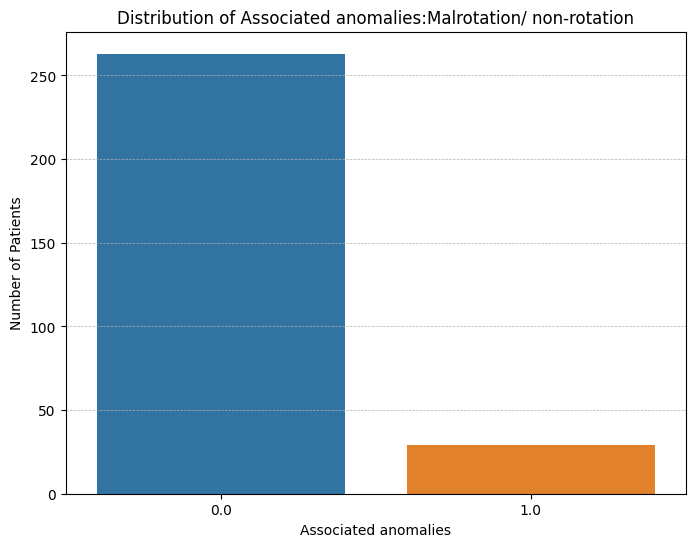

In [42]:
# Visualizing the distribution of "Associated anomalies：Malrotation/ non-rotation"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=anomalies_column, order=data[anomalies_column].value_counts().index)
plt.title("Distribution of Associated anomalies:Malrotation/ non-rotation")
plt.xlabel("Associated anomalies")
plt.ylabel("Number of Patients")
plt.grid(axis="y", which="both", linestyle="--", linewidth=0.5)
plt.show()


# Situs_inversus, Dextrocardia, Asplenia

In [43]:
# Analyze the "Situs_inversus", "Dextrocardia", and "Asplenia" columns
columns_to_analyze = ["Situs inversus", "Dextrocardia", "Asplenia"]
columns_counts = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze}
columns_missing = {column: data[column].isna().sum() for column in columns_to_analyze}

columns_missing, columns_counts


({'Situs inversus': 211, 'Dextrocardia': 211, 'Asplenia': 211},
 {'Situs inversus': No     280
  NaN    211
  Yes     12
  Name: Situs inversus, dtype: int64,
  'Dextrocardia': No     288
  NaN    211
  Yes      4
  Name: Dextrocardia, dtype: int64,
  'Asplenia': No     290
  NaN    211
  Yes      2
  Name: Asplenia, dtype: int64})

In [44]:
# Replace the blank strings with NaN for the three columns
for column in columns_to_analyze:
    data[column].replace("\xa0", pd.NA, inplace=True)

# Recalculate the missing values for these columns
columns_missing_updated = {column: data[column].isna().sum() for column in columns_to_analyze}

columns_missing_updated


{'Situs inversus': 211, 'Dextrocardia': 211, 'Asplenia': 211}

In [45]:
# Calculate the missing values proportion for these columns
columns_missing_proportion = {column: (missing_val / len(data)) * 100 for column, missing_val in columns_missing_updated.items()}

columns_missing_proportion


{'Situs inversus': 41.94831013916501,
 'Dextrocardia': 41.94831013916501,
 'Asplenia': 41.94831013916501}

In [46]:
# Fill missing values with "No" for the three columns
for column in columns_to_analyze:
    data[column].fillna("No", inplace=True)

# Re-check the distribution of the features after filling missing values
final_columns_counts = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze}

# Replace "Yes" and "No" values with 1 and 0 respectively for the three columns
for column in columns_to_analyze:
    data[column] = data[column].replace({"Yes": 1, "No": 0})

# Verify the encoding by checking the value counts for these columns
final_encoded_counts = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze}

final_encoded_counts



{'Situs inversus': 0    491
 1     12
 Name: Situs inversus, dtype: int64,
 'Dextrocardia': 0    499
 1      4
 Name: Dextrocardia, dtype: int64,
 'Asplenia': 0    501
 1      2
 Name: Asplenia, dtype: int64}

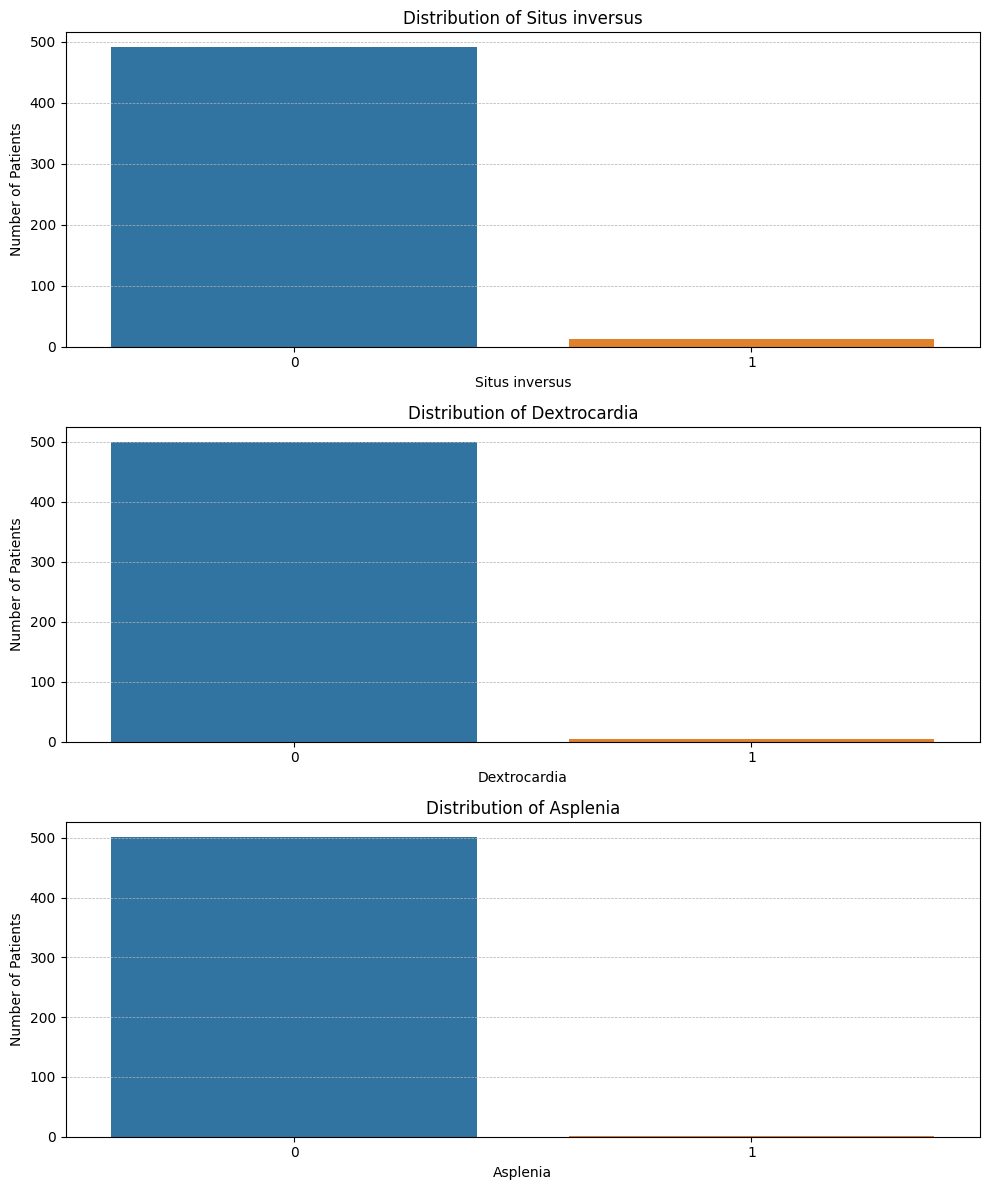

In [47]:
# Visualizing the distribution of the three features
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i, column in enumerate(columns_to_analyze):
    sns.countplot(data=data, x=column, order=data[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Number of Patients")
    axes[i].grid(axis="y", which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


# ASD/VSD, Other cardiac anomaly, Small bowel atresia

Similar to malrotation, yes means that they have one or both. This is a cardiac anomaly laypeople would call “hole in the heart”. Non-marked entries assumed to be no. PDA is another form of persistent cardiac shunt and may have been noted but not related to ASD.

In [48]:


# Columns to analyze
columns_to_analyze_2 = ["ASD/VSD", "Other cardiac anomaly", "Small bowel atresia"]

# Analyze the specified columns again
columns_counts_2 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_2}
columns_missing_2 = {column: data[column].isna().sum() for column in columns_to_analyze_2}
columns_blank_2 = {column: (data[column] == "\xa0").sum() for column in columns_to_analyze_2}

# Calculate the proportion of missing and blank values for these columns
columns_missing_proportion_2 = {column: (missing_val / len(data)) * 100 for column, missing_val in columns_missing_2.items()}
columns_blank_proportion_2 = {column: (blank_val / len(data)) * 100 for column, blank_val in columns_blank_2.items()}

columns_missing_proportion_2, columns_blank_proportion_2, columns_counts_2


({'ASD/VSD': 95.82504970178927,
  'Other cardiac anomaly': 93.04174950298211,
  'Small bowel atresia': 97.8131212723658},
 {'ASD/VSD': 0.0, 'Other cardiac anomaly': 0.0, 'Small bowel atresia': 0.0},
 {'ASD/VSD': NaN          482
  Yes           11
  VSD            3
  ASD/VSD        2
  vsd            2
  ASD            1
  ASD PDA        1
  asd small      1
  Name: ASD/VSD, dtype: int64,
  'Other cardiac anomaly': NaN                                                                           468
  PDA                                                                             6
  PFO/PULMONARY HYPERTENSION                                                      2
  pda pulmonary stenosis                                                          2
  Partial anomalous pulmonary venous return                                       2
  PULMONORY ARTERY STENOSIS                                                       1
  AORTIC STENOSIS                                                             

In [49]:
# Convert specified entries to "Yes"
yes_entries = ["Yes", "VSD", "ASD/VSD", "vsd", "ASD", "ASD PDA", "asd small"]
data["ASD/VSD"] = data["ASD/VSD"].apply(lambda x: "Yes" if x in yes_entries else x)

# Encode "Yes" as 1 and "No" as 0
data["ASD/VSD"] = data["ASD/VSD"].map({"Yes": 1, "No": 0})

# Handle the NaN entry by converting it to 0 (No)
data["ASD/VSD"].fillna(0, inplace=True)

# Display the results after reprocessing
asdv_result_corrected = data["ASD/VSD"].value_counts(dropna=False)
asdv_result_corrected

0.0    483
1.0     20
Name: ASD/VSD, dtype: int64

In [50]:
# Check the unique values for 'Other cardiac anomaly'
unique_values = data['Other cardiac anomaly'].unique()

# Calculate the missing value ratio for 'Other cardiac anomaly'
missing_value_ratio = data['Other cardiac anomaly'].isnull().mean()

unique_values, missing_value_ratio

(array([nan, 'Pulmonary stenosis', 'Hypoplastic RV', 'L isomerism', 'Yes',
        'Partial anomalous pulmonary venous return',
        'left atrial isomerism, Single right ventricle\nDORV, PA Banding 29/08/2014',
        'Large PDA, Dilated Ascending Aorta, Left arterial ...',
        'Left atrial isomerism', 'Small PFO', 'PULMONARY HYPERTENSION',
        'PDA', 'COMPLEZ HEART DISEASE',
        'PULMONARY STENOSIS,PATENT FORAMEN OVALE',
        'supra valvular pulmonary atenosis', 'PULMONORY ARTERY STENOSIS',
        'PULMONORY HYPERTENSION', 'HIGH OUTPUT CARDIAC FAILURE',
        'TFO,PA HYPOPLASIAS,', 'PFO,PDA', 'Bicuspid aortic valve',
        'PFO,PDA,', 'patent foramen', 'COARCATION OF AORTA',
        'AORTIC STENOSIS', 'pda pulmonary stenosis',
        'PFO/PULMONARY HYPERTENSION', 'small PFO'], dtype=object),
 0.9304174950298211)

In [51]:
# Convert non-null values to 'Yes' and null values to 'No'
data['Other cardiac anomaly'] = data['Other cardiac anomaly'].where(data['Other cardiac anomaly'].isnull(), 'Yes').fillna('No')

# Convert 'Yes' to 1 and 'No' to 0
data['Other cardiac anomaly'] = data['Other cardiac anomaly'].map({'Yes': 1, 'No': 0})

# Display the updated 'Other cardiac anomaly' column
data['Other cardiac anomaly'].value_counts()


0    468
1     35
Name: Other cardiac anomaly, dtype: int64

In [52]:
# Convert non-null values of 'Small bowel atresia' to 'Yes' and null values to 'No'
data['Small bowel atresia'] = data['Small bowel atresia'].where(data['Small bowel atresia'].isnull(), 'Yes').fillna('No')

# Convert 'Yes' to 1 and 'No' to 0 for 'Small bowel atresia'
data['Small bowel atresia'] = data['Small bowel atresia'].map({'Yes': 1, 'No': 0})

# Display the updated 'Small bowel atresia' column
data['Small bowel atresia'].value_counts()



0    492
1     11
Name: Small bowel atresia, dtype: int64

# Tracheo-oesophageal fistula, Anorectal malformation, Cleft lip/palate

In [53]:
cols_to_check = ["Tracheo-oesophageal fistula", "Anorectal malformation", "Cleft lip/palate"]

data[cols_to_check] = data[cols_to_check].replace('\xa0', pd.NA)



# Replace spaces with NaN values
data[cols_to_check] = data[cols_to_check].replace('\xa0', pd.NA)

# Encode missing values and spaces as 0, all others as 1
data[cols_to_check] = data[cols_to_check].where(data[cols_to_check].isna(), 1).fillna(0).astype(int)

# Check the updated missing values
updated_missing_values = data[cols_to_check].isnull().sum()

updated_missing_values = data[cols_to_check].isnull().sum()
updated_missing_values


Tracheo-oesophageal fistula    0
Anorectal malformation         0
Cleft lip/palate               0
dtype: int64

# Genetic mutation, Inguinal hernia, Umbilical hernia, Renal tract anomaly

In [54]:


# Specify columns for analysis
columns_to_analyze_4 = ["Genetic mutation", "Inguinal hernia", "Umbilical hernia", "Renal tract anomaly"]

# Analyze the specified columns
columns_counts_4 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_4}
columns_missing_4 = {column: data[column].isna().sum() for column in columns_to_analyze_4}
columns_blank_4 = {column: (data[column] == "\xa0").sum() for column in columns_to_analyze_4}

# Calculate the proportion of missing and blank values for these columns
columns_missing_proportion_4 = {column: (missing_val / len(data)) * 100 for column, missing_val in columns_missing_4.items()}
columns_blank_proportion_4 = {column: (blank_val / len(data)) * 100 for column, blank_val in columns_blank_4.items()}

columns_missing_proportion_4, columns_blank_proportion_4, columns_counts_4


({'Genetic mutation': 94.63220675944333,
  'Inguinal hernia': 98.40954274353876,
  'Umbilical hernia': 98.80715705765407,
  'Renal tract anomaly': 97.61431411530815},
 {'Genetic mutation': 0.0,
  'Inguinal hernia': 0.0,
  'Umbilical hernia': 0.0,
  'Renal tract anomaly': 0.0},
 {'Genetic mutation': NaN                                   476
  alpha 1PIZZ                             3
  ALLAGILE SYNDROM                        2
  TRISOMY 21                              2
  ALPHA 1 ANTITRYPSIN DEFICENCY PIZZ      1
  gilbert syndrom                         1
  ALLAGILE                                1
  CYSTIC FIBROSIS                         1
  SLC25A13                                1
  Alpha 1PIMZ                             1
  Alpha 1PIZZ                             1
  ALPHA 1 ANTITRYPSIN DEFICENCY ZZ        1
  Glycogen storage disease                1
  ALPHA 1 ANTITRYPSIN DEFICENCY MZ        1
  Check?                                  1
  pimz                                    

In [55]:
# Convert entries for the specified columns
def convert_to_binary_general(entry):
    if entry == "\xa0" or pd.isna(entry):
        return 0
    return 1

# Apply the function to the specified columns
for column in columns_to_analyze_4:
    data[column] = data[column].apply(convert_to_binary_general)

# Check the distribution after processing
processed_columns_counts_4 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_4}
processed_columns_counts_4


{'Genetic mutation': 0    476
 1     27
 Name: Genetic mutation, dtype: int64,
 'Inguinal hernia': 0    495
 1      8
 Name: Inguinal hernia, dtype: int64,
 'Umbilical hernia': 0    497
 1      6
 Name: Umbilical hernia, dtype: int64,
 'Renal tract anomaly': 0    491
 1     12
 Name: Renal tract anomaly, dtype: int64}

# Other associated anomalies



简化类别: 由于这个特征包含大量的不同条目，并且大多数条目的数量都很少，我们可以考虑将所有非空白和非NaN的条目都归为"Yes"，表示存在其他医学情况。
处理缺失值和空白字符: 考虑到这个特征的背景和目的，我们可以将空白字符和NaN都归为"No"，表示没有其他医学情况。
编码: 将"Yes"编码为1，表示存在其他医学情况，将"No"编码为0，表示没有其他医学情况。

In [56]:
unique_values44 = data["Other"].unique()
value_counts44 = data["Other"].value_counts()

unique_values44, value_counts44

(array([nan, 'Increased renal echogenicity', 'Hypospadias',
        'Mild intrahepatic duct dilatation', 'Dysplastic Hips',
        "Meckel's diverticulum", 'Lumbar scoliosis convex to the right.',
        'Intraventricular haemorrhage grade 2',
        'Non-rotation  of bowel, meconium plug syndrome & ileal perforaton, laparotomy D3',
        'Child is a triplet.\nAbnormalities- Sickle Cell Disease\n',
        'bilateral optic nerve hypoplasia',
        '\nCorneal opacity\nmicro-ophthalmia\nVentricular hypertrophy\nDysgeusia corpus callosum\nbilateral small dysplastic kidneys.',
        'IVF baby. IUGR, placental insufficiency, born by LSCS',
        'pathological left femur fracture due to ostepaenia',
        'Non rotation, cyst at porta hepatis',
        'engorged lymphatics of intestinal wall, enlarged mesenteric lymph nodes of mid ileum segment',
        'IUGR, maternal substance abuse, nystagmus, opiate withdrawal',
        'Meconium pseudocyst, intrauterine perforation',
      

In [57]:
# Convert non-null values of 'Other' to 'Yes' and null values to 'No'
data['Other'] = data['Other'].where(data['Other'].isnull(), 'Yes').fillna('No')

# Convert 'Yes' to 1 and 'No' to 0 for 'Other'
data['Other'] = data['Other'].map({'Yes': 1, 'No': 0})

# Display the updated 'Other' column
data['Other'].value_counts()



0    405
1     98
Name: Other, dtype: int64

# Blood results at presentation：Total bilirubin

In [58]:

data["Blood results at presentation: Total bilirubin"] = pd.to_numeric(data["Blood results at presentation: Total bilirubin"], errors='coerce')

# IQR
Q1_bilirubin = data["Blood results at presentation: Total bilirubin"].quantile(0.25)
Q3_bilirubin = data["Blood results at presentation: Total bilirubin"].quantile(0.75)
IQR_bilirubin = Q3_bilirubin - Q1_bilirubin


outliers_iqr_bilirubin = data[(data["Blood results at presentation: Total bilirubin"] < (Q1_bilirubin - 1.5 * IQR_bilirubin)) |
                              (data["Blood results at presentation: Total bilirubin"] > (Q3_bilirubin + 1.5 * IQR_bilirubin))]

# z-score
mean_bilirubin = data["Blood results at presentation: Total bilirubin"].mean()
std_bilirubin = data["Blood results at presentation: Total bilirubin"].std()
outliers_z_bilirubin = data[(data["Blood results at presentation: Total bilirubin"] < (mean_bilirubin - 3 * std_bilirubin)) |
                            (data["Blood results at presentation: Total bilirubin"] > (mean_bilirubin + 3 * std_bilirubin))]


combined_outliers_bilirubin = pd.concat([outliers_iqr_bilirubin, outliers_z_bilirubin]).drop_duplicates().reset_index(drop=True)


missing_values_bilirubin = data["Blood results at presentation: Total bilirubin"].isna().sum()

combined_outliers_bilirubin[["Blood results at presentation: Total bilirubin"]], missing_values_bilirubin


(    Blood results at presentation: Total bilirubin
 0                                            382.0
 1                                            392.0
 2                                            428.0
 3                                            328.0
 4                                            300.0
 5                                            321.0
 6                                            299.0
 7                                            390.0
 8                                            297.0
 9                                            344.0
 10                                           311.0
 11                                           501.0
 12                                           338.0
 13                                           300.0
 14                                           296.0
 15                                           437.0
 16                                           296.0,
 20)

<ipython-input-59-33dd8b9fd062>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Blood results at presentation: Total bilirubin"], shade=True, color='red')
<ipython-input-59-33dd8b9fd062>:22: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


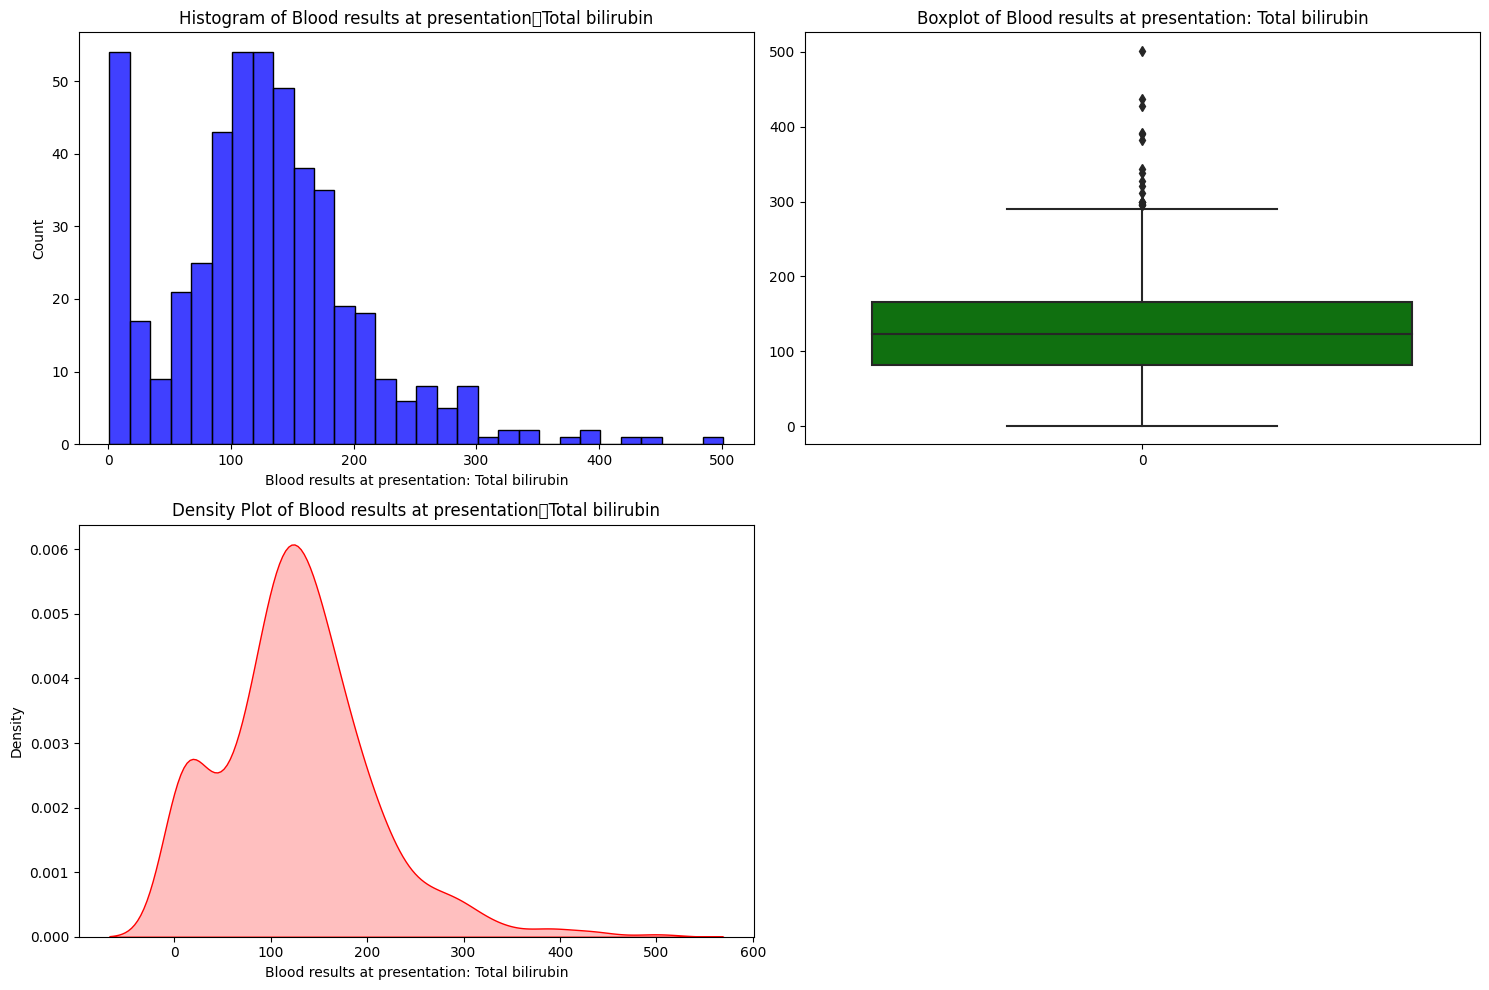

In [59]:
plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data["Blood results at presentation: Total bilirubin"], kde=False, bins=30, color='blue')
plt.title('Histogram of Blood results at presentation：Total bilirubin')
plt.xlabel('Blood results at presentation: Total bilirubin')
plt.ylabel('Count')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data["Blood results at presentation: Total bilirubin"], color='green')
plt.title('Boxplot of Blood results at presentation: Total bilirubin')

# Density Plot
plt.subplot(2, 2, 3)
sns.kdeplot(data["Blood results at presentation: Total bilirubin"], shade=True, color='red')
plt.title('Density Plot of Blood results at presentation：Total bilirubin')
plt.xlabel('Blood results at presentation: Total bilirubin')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [60]:

# 检查是否还有缺失值
remaining_missing_values_bilirubin = data["Blood results at presentation: Total bilirubin"].isna().sum()

remaining_missing_values_bilirubin


20

# Conj bilirubin

In [61]:

data["Conj bilirubin"] = pd.to_numeric(data["Conj bilirubin"], errors='coerce')


Q1_conj_bilirubin = data["Conj bilirubin"].quantile(0.25)
Q3_conj_bilirubin = data["Conj bilirubin"].quantile(0.75)
IQR_conj_bilirubin = Q3_conj_bilirubin - Q1_conj_bilirubin

outliers_iqr_conj_bilirubin = data[(data["Conj bilirubin"] < (Q1_conj_bilirubin - 1.5 * IQR_conj_bilirubin)) |
                                (data["Conj bilirubin"] > (Q3_conj_bilirubin + 1.5 * IQR_conj_bilirubin))]

mean_conj_bilirubin = data["Conj bilirubin"].mean()
std_conj_bilirubin = data["Conj bilirubin"].std()
outliers_z_conj_bilirubin = data[(data["Conj bilirubin"] < (mean_conj_bilirubin - 3 * std_conj_bilirubin)) |
                                (data["Conj bilirubin"] > (mean_conj_bilirubin + 3 * std_conj_bilirubin))]

combined_outliers_conj_bilirubin = pd.concat([outliers_iqr_conj_bilirubin, outliers_z_conj_bilirubin]).drop_duplicates().reset_index(drop=True)


missing_values_conj_bilirubin = data["Conj bilirubin"].isna().sum()

combined_outliers_conj_bilirubin[["Conj bilirubin"]], missing_values_conj_bilirubin


(   Conj bilirubin
 0           363.0
 1           253.0
 2           246.0
 3          1355.0
 4           244.0
 5           563.0,
 107)

<ipython-input-62-bf96860054cf>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Conj bilirubin"], shade=True, color='red')


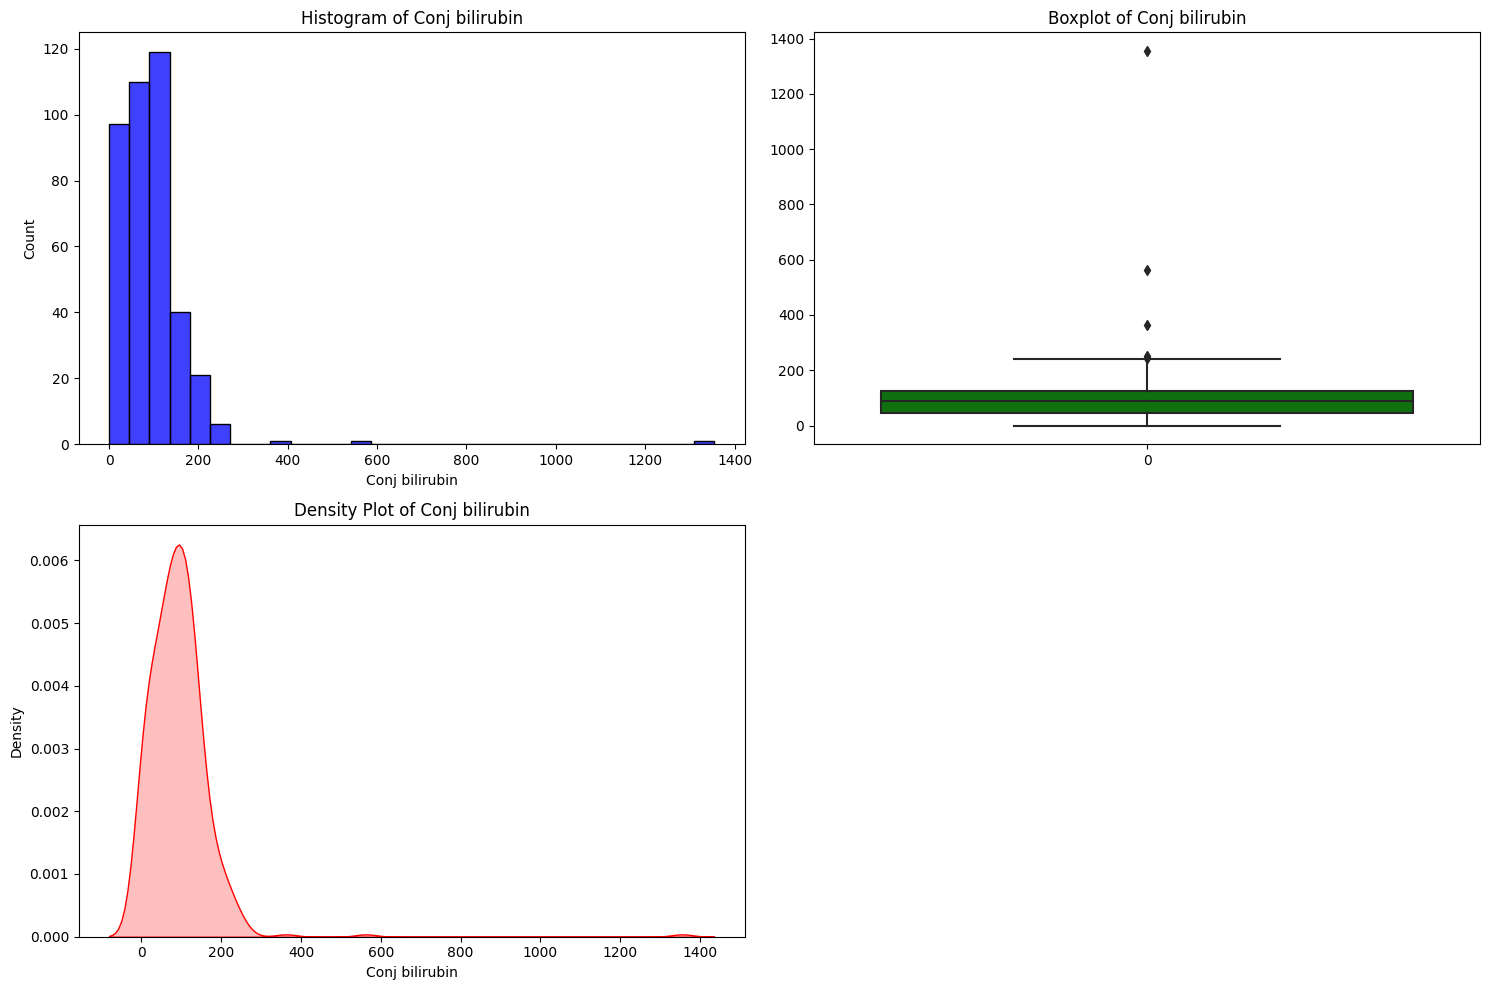

In [62]:



plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data["Conj bilirubin"], kde=False, bins=30, color='blue')
plt.title('Histogram of Conj bilirubin')
plt.xlabel('Conj bilirubin')
plt.ylabel('Count')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data["Conj bilirubin"], color='green')
plt.title('Boxplot of Conj bilirubin')

# Density Plot
plt.subplot(2, 2, 3)
sns.kdeplot(data["Conj bilirubin"], shade=True, color='red')
plt.title('Density Plot of Conj bilirubin')
plt.xlabel('Conj bilirubin')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# GGT

In [63]:

data["GGT"] = pd.to_numeric(data["GGT"], errors='coerce')

Q1_ggt = data["GGT"].quantile(0.25)
Q3_ggt = data["GGT"].quantile(0.75)
IQR_ggt = Q3_ggt - Q1_ggt


outliers_iqr_ggt = data[(data["GGT"] < (Q1_ggt - 1.5 * IQR_ggt)) |
                        (data["GGT"] > (Q3_ggt + 1.5 * IQR_ggt))]

mean_ggt = data["GGT"].mean()
std_ggt = data["GGT"].std()
outliers_z_ggt = data[(data["GGT"] < (mean_ggt - 3 * std_ggt)) |
                      (data["GGT"] > (mean_ggt + 3 * std_ggt))]

combined_outliers_ggt = pd.concat([outliers_iqr_ggt, outliers_z_ggt]).drop_duplicates().reset_index(drop=True)

missing_values_ggt = data["GGT"].isna().sum()

combined_outliers_ggt[["GGT"]], missing_values_ggt


(      GGT
 0  1717.0
 1  2020.0
 2  1873.0
 3  2338.0
 4  2865.0
 5  2078.0
 6  1648.0
 7  1575.0
 8  3618.0
 9  2066.0,
 62)

<ipython-input-64-2f8898365d0b>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["GGT"], shade=True, color='red')


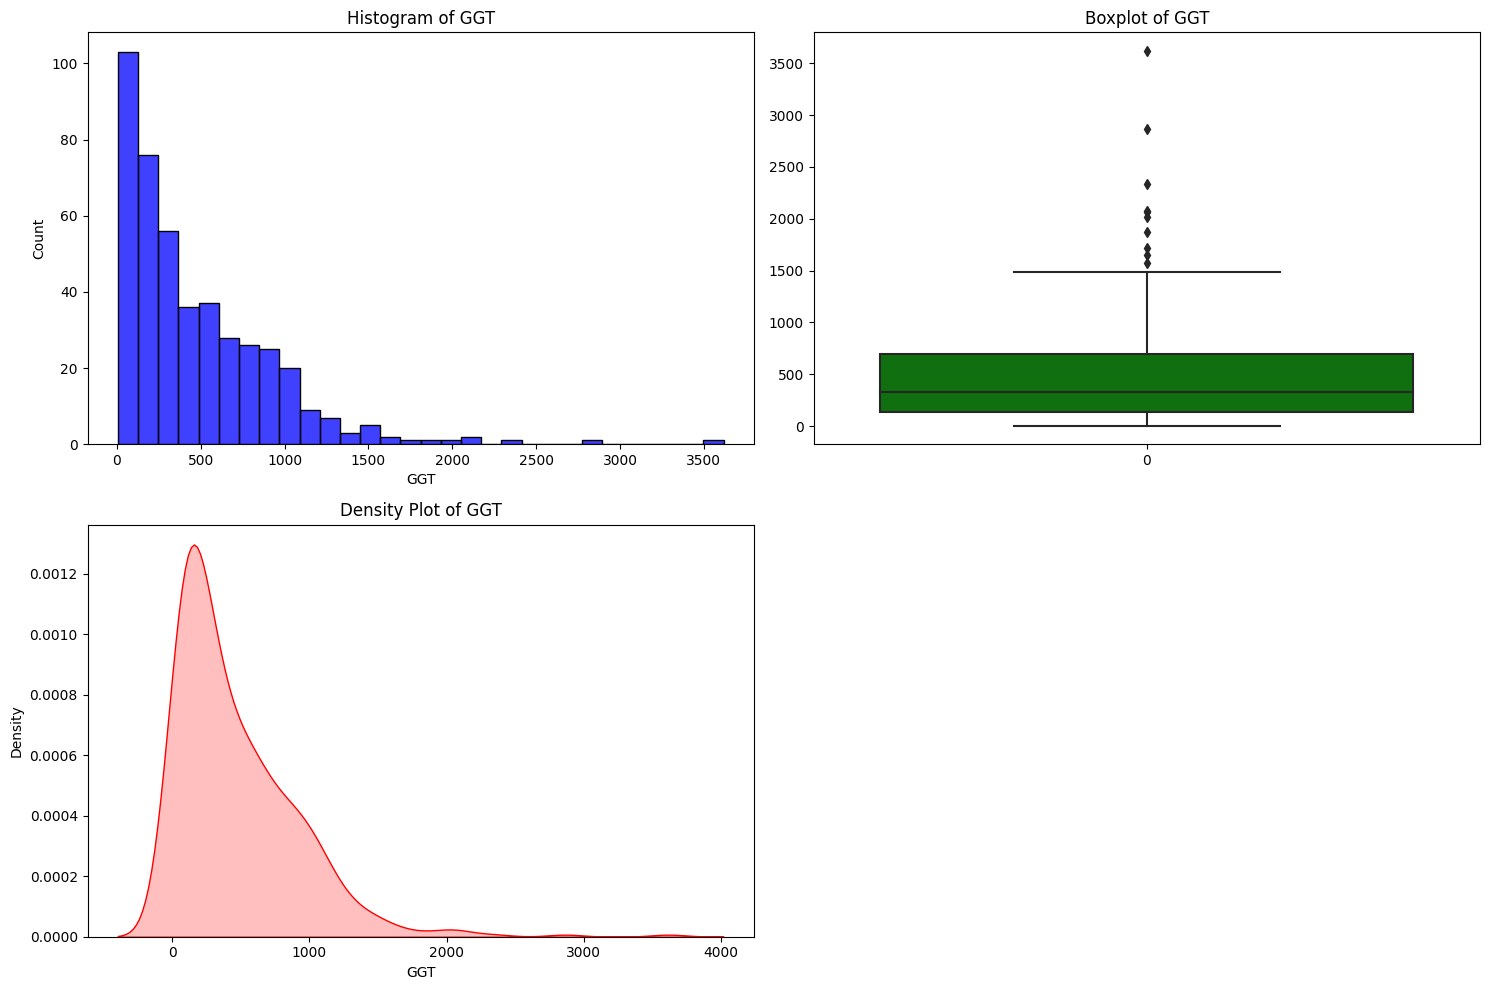

In [64]:


plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data["GGT"], kde=False, bins=30, color='blue')
plt.title('Histogram of GGT')
plt.xlabel('GGT')
plt.ylabel('Count')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data["GGT"], color='green')
plt.title('Boxplot of GGT')

# Density Plot
plt.subplot(2, 2, 3)
sns.kdeplot(data["GGT"], shade=True, color='red')
plt.title('Density Plot of GGT')
plt.xlabel('GGT')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# AST

In [65]:

data["AST"] = pd.to_numeric(data["AST"], errors='coerce')


Q1_ast = data["AST"].quantile(0.25)
Q3_ast = data["AST"].quantile(0.75)
IQR_ast = Q3_ast - Q1_ast

outliers_iqr_ast = data[(data["AST"] < (Q1_ast - 1.5 * IQR_ast)) |
                        (data["AST"] > (Q3_ast + 1.5 * IQR_ast))]


mean_ast = data["AST"].mean()
std_ast = data["AST"].std()
outliers_z_ast = data[(data["AST"] < (mean_ast - 3 * std_ast)) |
                      (data["AST"] > (mean_ast + 3 * std_ast))]

combined_outliers_ast = pd.concat([outliers_iqr_ast, outliers_z_ast]).drop_duplicates().reset_index(drop=True)


missing_values_ast = data["AST"].isna().sum()

combined_outliers_ast[["AST"]], missing_values_ast


(       AST
 0    466.0
 1    873.0
 2    445.0
 3    462.0
 4    927.0
 5    492.0
 6    596.0
 7    775.0
 8    866.0
 9    454.0
 10   447.0
 11   433.0
 12   465.0
 13   834.0
 14   432.0
 15   781.0
 16   641.0
 17   472.0
 18   561.0
 19   709.0
 20   603.0
 21   527.0
 22  1683.0
 23   453.0
 24   517.0
 25   894.0,
 67)

<ipython-input-66-fee60816118b>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["AST"], shade=True, color='red')


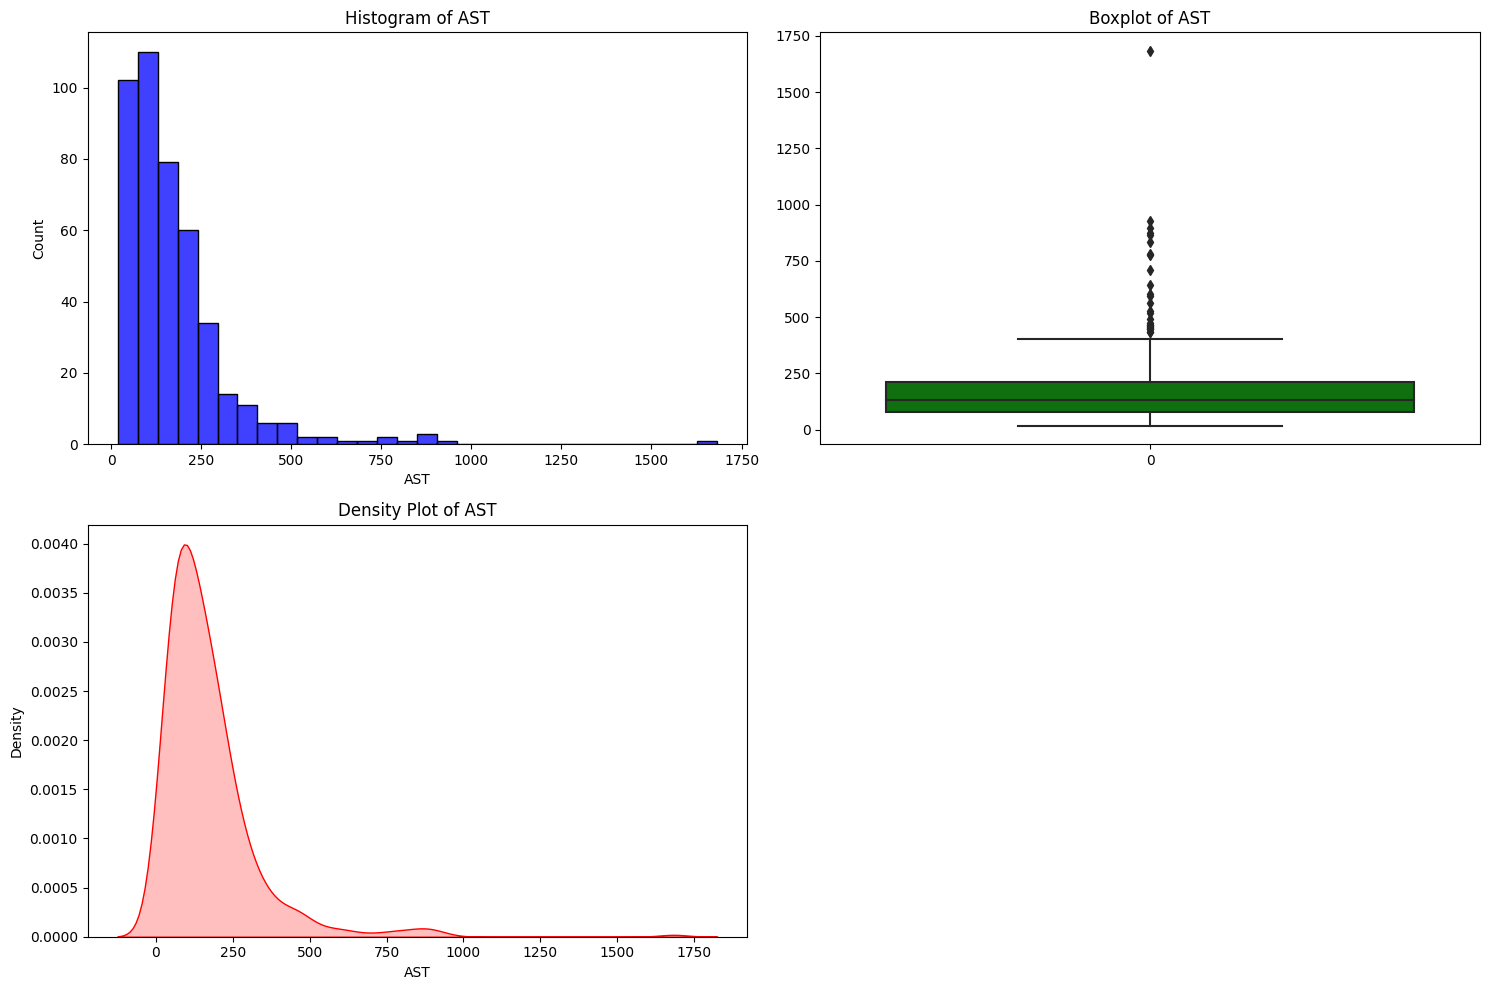

In [66]:



plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data["AST"], kde=False, bins=30, color='blue')
plt.title('Histogram of AST')
plt.xlabel('AST')
plt.ylabel('Count')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data["AST"], color='green')
plt.title('Boxplot of AST')

# Density Plot
plt.subplot(2, 2, 3)
sns.kdeplot(data["AST"], shade=True, color='red')
plt.title('Density Plot of AST')
plt.xlabel('AST')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# ALT

<ipython-input-67-eb2703b99ef9>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["ALT"], shade=True, color='red')


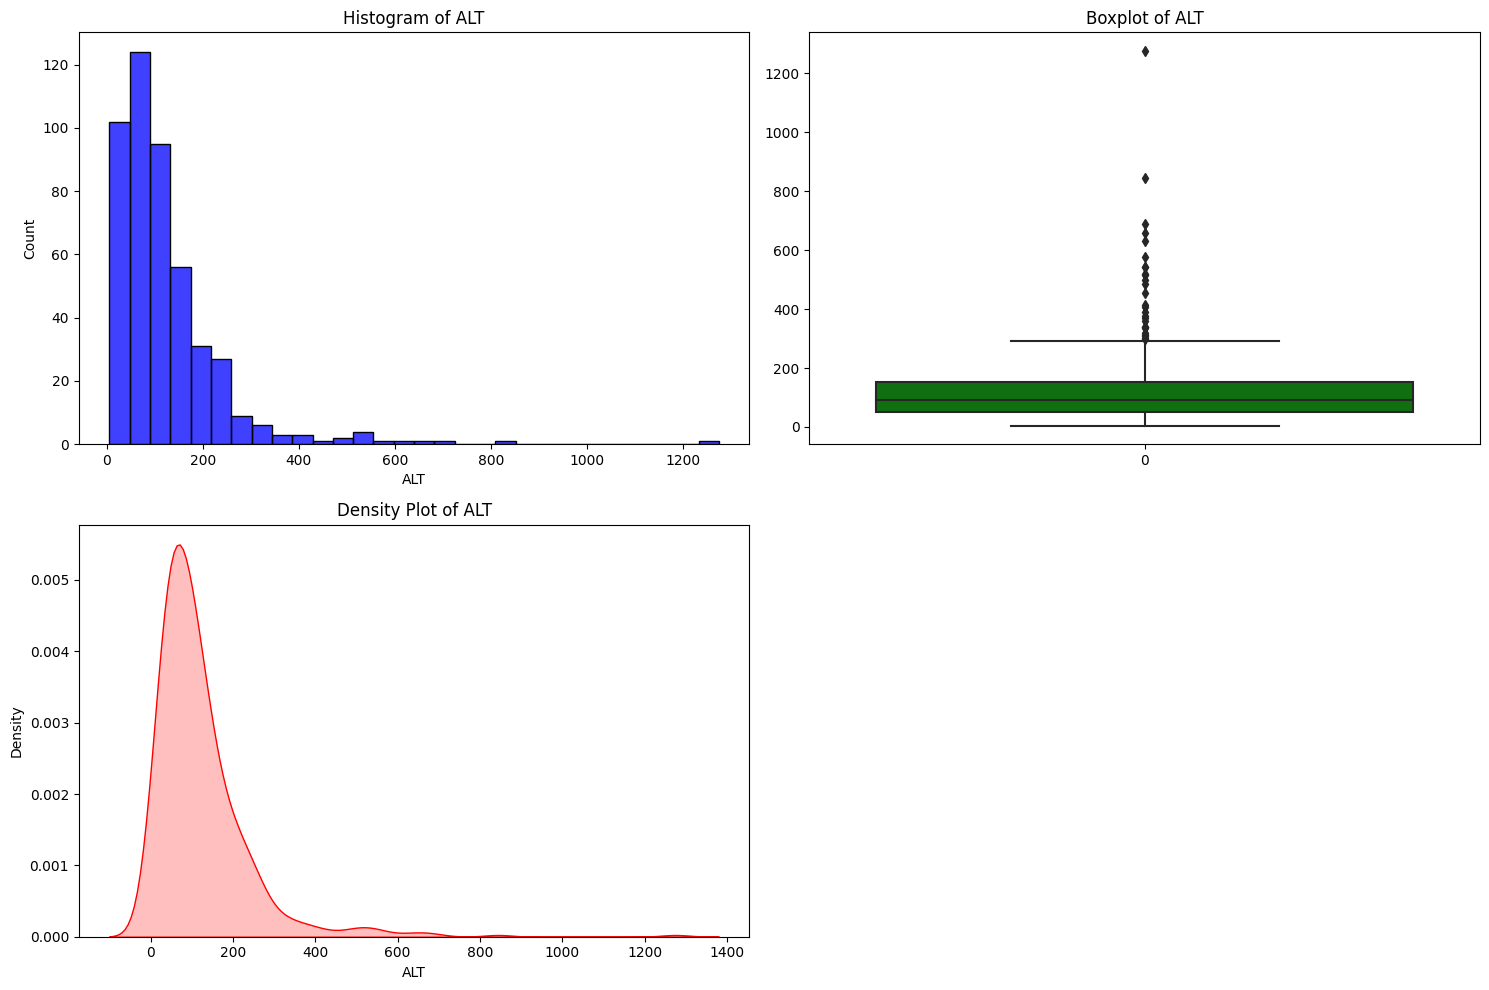

(       ALT
 0    575.0
 1    375.0
 2    406.0
 3    518.0
 4    453.0
 5    339.0
 6    844.0
 7    336.0
 8    308.0
 9    658.0
 10   497.0
 11   339.0
 12   300.0
 13   688.0
 14   371.0
 15   485.0
 16   301.0
 17   360.0
 18   515.0
 19   318.0
 20   543.0
 21   543.0
 22   313.0
 23  1275.0
 24   391.0
 25   631.0
 26   415.0,
 34)

In [67]:

data["ALT"] = pd.to_numeric(data["ALT"], errors='coerce')


Q1_alt = data["ALT"].quantile(0.25)
Q3_alt = data["ALT"].quantile(0.75)
IQR_alt = Q3_alt - Q1_alt


outliers_iqr_alt = data[(data["ALT"] < (Q1_alt - 1.5 * IQR_alt)) |
                        (data["ALT"] > (Q3_alt + 1.5 * IQR_alt))]

mean_alt = data["ALT"].mean()
std_alt = data["ALT"].std()
outliers_z_alt = data[(data["ALT"] < (mean_alt - 3 * std_alt)) |
                      (data["ALT"] > (mean_alt + 3 * std_alt))]


combined_outliers_alt = pd.concat([outliers_iqr_alt, outliers_z_alt]).drop_duplicates().reset_index(drop=True)

missing_values_alt = data["ALT"].isna().sum()



plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data["ALT"], kde=False, bins=30, color='blue')
plt.title('Histogram of ALT')
plt.xlabel('ALT')
plt.ylabel('Count')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data["ALT"], color='green')
plt.title('Boxplot of ALT')

# Density Plot
plt.subplot(2, 2, 3)
sns.kdeplot(data["ALT"], shade=True, color='red')
plt.title('Density Plot of ALT')
plt.xlabel('ALT')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

combined_outliers_alt[["ALT"]], missing_values_alt


# Alk p, A1AT level, PT, APTT, Protein

In [68]:

def check_outliers_missing(data, column_name):

    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')


    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1


    outliers_iqr = data[(data[column_name] < (Q1 - 1.5 * IQR)) |
                        (data[column_name] > (Q3 + 1.5 * IQR))]


    mean_value = data[column_name].mean()
    std_value = data[column_name].std()
    outliers_z = data[(data[column_name] < (mean_value - 3 * std_value)) |
                      (data[column_name] > (mean_value + 3 * std_value))]


    combined_outliers = pd.concat([outliers_iqr, outliers_z]).drop_duplicates().reset_index(drop=True)

    missing_values = data[column_name].isna().sum()

    return combined_outliers[[column_name]], missing_values


columns_to_check = ["Alk p", "A1AT level", "PT", "APTT", "Protein"]

outliers_missing_results = {}
for column in columns_to_check:
    outliers, missing = check_outliers_missing(data, column)
    outliers_missing_results[column] = {
        "Outliers": outliers,
        "Missing Values": missing
    }

outliers_missing_results


{'Alk p': {'Outliers':     Alk p
  0  3541.0
  1  2993.0
  2  2942.0
  3  3587.0
  4  3724.0
  5  2936.0
  6  2907.0
  7  5222.0
  8  3529.0
  9  5977.0,
  'Missing Values': 40},
 'A1AT level': {'Outliers':     A1AT level
  0         2.12
  1         2.70
  2         2.39
  3         2.10
  4       186.00
  5         2.98
  6         2.30
  7       148.00
  8         2.47
  9       118.00
  10        2.70
  11      251.00
  12        0.41
  13        0.41,
  'Missing Values': 277},
 'PT': {'Outliers':       PT
  0   19.0
  1   17.0
  2   16.0
  3   16.0
  4   14.0
  5   44.0
  6   17.0
  7   14.0
  8   14.0
  9   16.0
  10  14.0
  11  14.0
  12  14.0
  13  15.0
  14  16.0
  15  14.0
  16  14.0,
  'Missing Values': 173},
 'APTT': {'Outliers':     APTT
  0  10.00
  1  12.00
  2  10.00
  3  13.00
  4  44.00
  5  54.00
  6  52.00
  7   4.00
  8   0.89,
  'Missing Values': 197},
 'Protein': {'Outliers':     Protein
  0      44.0
  1      38.0
  2      36.0
  3      42.0
  4      43.0
  5   

# CMV IgM (positive/ negative)

In [69]:


# Check missing values, unique values, and blank strings for "CMV IgM (positive/ negative)"
missing_values_cmv_igm_reload = data["CMV IgM (positive/ negative)"].isna().sum()
blank_values_cmv_igm_reload = (data["CMV IgM (positive/ negative)"] == "\xa0").sum()
unique_values_cmv_igm_reload = data["CMV IgM (positive/ negative)"].unique()

missing_values_cmv_igm_reload, blank_values_cmv_igm_reload, unique_values_cmv_igm_reload


(354,
 0,
 array([nan, 'Positive', 'No', 'NEGATIVE', 'POSITIVE', 'IG G POSITIVE',
        'IGA POSITIVE', 'positive', 'negative'], dtype=object))

In [70]:
# Convert blank entries to NaN for "CMV IgM (positive/ negative)"
data["CMV IgM (positive/ negative)"].replace("\xa0", float('nan'), inplace=True)

# Calculate the proportion of missing values
missing_values_cmv_igm_updated = data["CMV IgM (positive/ negative)"].isna().sum()
missing_proportion_cmv_igm_updated = (missing_values_cmv_igm_updated / len(data)) * 100

missing_values_cmv_igm_updated, missing_proportion_cmv_igm_updated


(354, 70.37773359840955)

In [71]:
# Combine the different versions of Positive and Negative into standard categories
positive_entries = ["Positive", "POSITIVE", "IG G POSITIVE", "IGA POSITIVE", "positive"]
negative_entries = ["No", "NEGATIVE", "negative"]

data["CMV IgM (positive/ negative)"] = data["CMV IgM (positive/ negative)"].apply(lambda x: "Positive" if x in positive_entries else x)
data["CMV IgM (positive/ negative)"] = data["CMV IgM (positive/ negative)"].apply(lambda x: "Negative" if x in negative_entries else x)

# Check the updated unique values
unique_values_cmv_igm_processed = data["CMV IgM (positive/ negative)"].value_counts(dropna=False)
unique_values_cmv_igm_processed


NaN         354
Negative    138
Positive     11
Name: CMV IgM (positive/ negative), dtype: int64

In [72]:
# Fill missing values with the mode (most frequent value) for "CMV IgM (positive/ negative)"
mode_cmv_igm = data["CMV IgM (positive/ negative)"].mode()[0]
data["CMV IgM (positive/ negative)"].fillna(mode_cmv_igm, inplace=True)

# Check if there are any missing values left in the column
remaining_missing_values_cmv_igm = data["CMV IgM (positive/ negative)"].isna().sum()



In [73]:
# Display the distribution of values for "CMV IgM (positive/ negative)"
final_distribution_cmv_igm = data["CMV IgM (positive/ negative)"].value_counts(normalize=True) * 100
final_distribution_cmv_igm


Negative    97.813121
Positive     2.186879
Name: CMV IgM (positive/ negative), dtype: float64

In [74]:
# Encode "Positive" as 1 and "Negative" as 0 for "CMV IgM (positive/ negative)"
data["CMV IgM (positive/ negative)"] = data["CMV IgM (positive/ negative)"].replace({"Positive": 1, "Negative": 0})

# Verify the encoding by checking the value counts
encoded_values_cmv_igm = data["CMV IgM (positive/ negative)"].value_counts(dropna=False)

encoded_values_cmv_igm

0    492
1     11
Name: CMV IgM (positive/ negative), dtype: int64

# Ultrasound：Hepatomegaly, Ascites,  Polysplenia, Interrupted IVC, Triangular cord sign

In [75]:

# Update the columns list with the correct names
columns_to_analyze_11 = ["Ultrasound: Hepatomegaly", "Ascites", "Polysplenia",
                         "Interrupted IVC", "Triangular cord sign"]

# Analyze the specified columns
columns_counts_11 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_11}
columns_missing_11 = {column: data[column].isna().sum() for column in columns_to_analyze_11}
columns_blank_11 = {column: (data[column] == "\xa0").sum() for column in columns_to_analyze_11}

# Calculate the proportion of missing and blank values for these columns
columns_missing_proportion_11 = {column: (missing_val / len(data)) * 100 for column, missing_val in columns_missing_11.items()}
columns_blank_proportion_11 = {column: (blank_val / len(data)) * 100 for column, blank_val in columns_blank_11.items()}

columns_missing_proportion_11, columns_blank_proportion_11, columns_counts_11


({'Ultrasound: Hepatomegaly': 4.7713717693836974,
  'Ascites': 4.3737574552683895,
  'Polysplenia': 4.3737574552683895,
  'Interrupted IVC': 4.3737574552683895,
  'Triangular cord sign': 4.3737574552683895},
 {'Ultrasound: Hepatomegaly': 0.0,
  'Ascites': 0.0,
  'Polysplenia': 0.0,
  'Interrupted IVC': 0.0,
  'Triangular cord sign': 0.0},
 {'Ultrasound: Hepatomegaly': No     310
  Yes    166
  NaN     24
  NO       2
  no       1
  Name: Ultrasound: Hepatomegaly, dtype: int64,
  'Ascites': No     434
  Yes     45
  NaN     22
  no       2
  Name: Ascites, dtype: int64,
  'Polysplenia': No               447
  Yes               30
  NaN               22
  no                 3
  Absent spleen      1
  Name: Polysplenia, dtype: int64,
  'Interrupted IVC': No     455
  NaN     22
  Yes     20
  n        4
  no       2
  Name: Interrupted IVC, dtype: int64,
  'Triangular cord sign': No     434
  Yes     45
  NaN     22
  no       2
  Name: Triangular cord sign, dtype: int64})

In [76]:
# Define a function to simplify and clean the ultrasound related columns
import numpy as np
def clean_ultrasound_column(value):
    if value in ["\xa0", np.nan]:
        return np.nan
    elif value.lower() in ["yes"]:
        return "Yes"
    elif value.lower() in ["no", "n", "absent spleen"]:
        return "No"
    else:
        return value

# Apply the cleaning function to the specified columns
for column in columns_to_analyze_11:
    data[column] = data[column].apply(clean_ultrasound_column)

# Display the updated value counts for the specified columns
updated_columns_counts_11 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_11}
updated_columns_counts_11


{'Ultrasound: Hepatomegaly': No     313
 Yes    166
 NaN     24
 Name: Ultrasound: Hepatomegaly, dtype: int64,
 'Ascites': No     436
 Yes     45
 NaN     22
 Name: Ascites, dtype: int64,
 'Polysplenia': No     451
 Yes     30
 NaN     22
 Name: Polysplenia, dtype: int64,
 'Interrupted IVC': No     461
 NaN     22
 Yes     20
 Name: Interrupted IVC, dtype: int64,
 'Triangular cord sign': No     436
 Yes     45
 NaN     22
 Name: Triangular cord sign, dtype: int64}

In [77]:
# Calculate the proportion of missing values for these columns
columns_missing_proportion_11_updated = {column: (count / len(data)) * 100 for column, count in columns_missing_11.items()}

# Fill missing values with "No"
for column in columns_to_analyze_11:
    data[column].fillna("No", inplace=True)

# Encode "Yes" as 1 and "No" as 0
for column in columns_to_analyze_11:
    data[column] = data[column].map({"Yes": 1, "No": 0})

# Display the proportion of missing values and the updated value counts for the specified columns
updated_columns_counts_11_encoded = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_11}

columns_missing_proportion_11_updated, updated_columns_counts_11_encoded


({'Ultrasound: Hepatomegaly': 4.7713717693836974,
  'Ascites': 4.3737574552683895,
  'Polysplenia': 4.3737574552683895,
  'Interrupted IVC': 4.3737574552683895,
  'Triangular cord sign': 4.3737574552683895},
 {'Ultrasound: Hepatomegaly': 0    337
  1    166
  Name: Ultrasound: Hepatomegaly, dtype: int64,
  'Ascites': 0    458
  1     45
  Name: Ascites, dtype: int64,
  'Polysplenia': 0    473
  1     30
  Name: Polysplenia, dtype: int64,
  'Interrupted IVC': 0    483
  1     20
  Name: Interrupted IVC, dtype: int64,
  'Triangular cord sign': 0    458
  1     45
  Name: Triangular cord sign, dtype: int64})

# Spleen length (cm)

In [78]:

outliers_spleen, missing_values_spleen = check_outliers_missing(data, "Spleen length (cm)")

outliers_spleen, missing_values_spleen


(    Spleen length (cm)
 0                 2.30
 1                 1.90
 2                 8.10
 3                 1.20
 4                 1.70
 5                 8.40
 6                 8.10
 7                 9.40
 8                 8.10
 9                 8.24
 10               10.90,
 87)

# Gallbladder (present/ atretic/ absent)

In [79]:
# Analyzing the "Gallbladder (present/ atretic/ absent)" column
gallbladder_col = "Gallbladder (present/ atretic/ absent)"
gallbladder_counts = data[gallbladder_col].value_counts(dropna=False)
gallbladder_missing = data[gallbladder_col].isna().sum()
gallbladder_blank = (data[gallbladder_col] == "\xa0").sum()

# Convert blank strings to NaN
data[gallbladder_col] = data[gallbladder_col].apply(lambda x: np.nan if x == "\xa0" else x)

# Calculate the proportion of missing and blank values
gallbladder_missing_proportion = (gallbladder_missing / len(data)) * 100
gallbladder_blank_proportion = (gallbladder_blank / len(data)) * 100
# Merge "absent" with "Absent"
data[gallbladder_col] = data[gallbladder_col].replace("absent", "Absent")
gallbladder_missing_proportion, gallbladder_blank_proportion,



(4.3737574552683895, 0.0)

In [80]:
# Combine 'absent' with 'Absent'
data['Gallbladder (present/ atretic/ absent)'] = data['Gallbladder (present/ atretic/ absent)'].replace('absent', 'Absent')

# Recalculate value counts for 'Gallbladder (present/ atretic/ absent)'
value_counts_gallbladder_updated = data['Gallbladder (present/ atretic/ absent)'].value_counts()

value_counts_gallbladder_updated


Present    266
Atretic    126
Absent      89
Name: Gallbladder (present/ atretic/ absent), dtype: int64

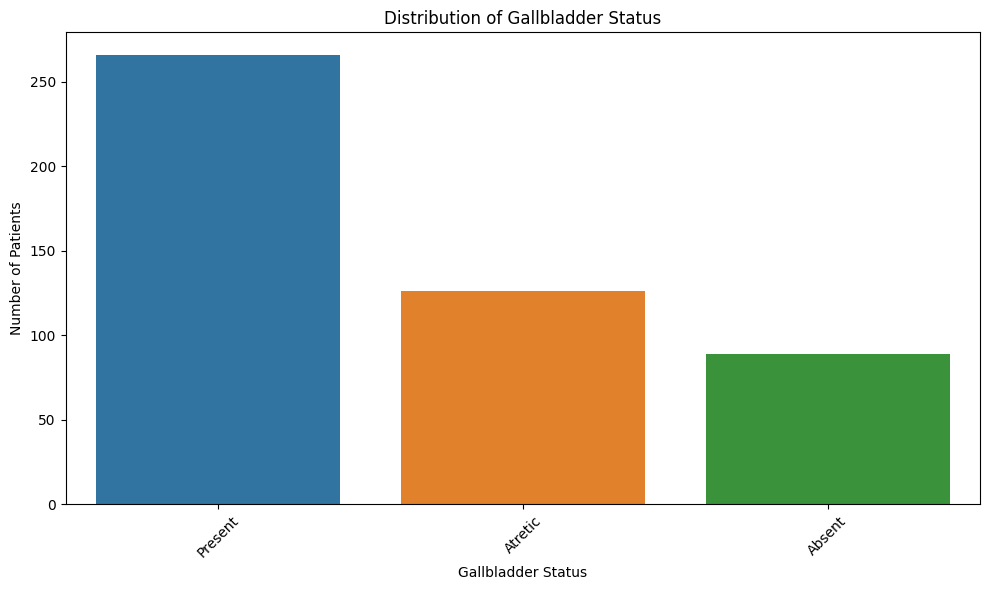

In [81]:
# Visualization of the "Gallbladder (present/ atretic/ absent)" column after preprocessing
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=gallbladder_col, order=value_counts_gallbladder_updated.index)
plt.title('Distribution of Gallbladder Status')
plt.ylabel('Number of Patients')
plt.xlabel('Gallbladder Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gallbladder length (cm)

In [82]:

outliers_gallbladder, missing_values_gallbladder = check_outliers_missing(data, "Gallbladder length (cm)")

outliers_gallbladder, missing_values_gallbladder


(   Gallbladder length (cm)
 0                     7.00
 1                     4.79
 2                     4.92,
 206)

# Porta hepatis cyst? (yes/no), TBIDA or HIDA：Radioisotope study done?

In [83]:
# Analyzing the two columns: "Porta hepatis cyst? (yes/no)" and "TBIDA or HIDA：Radioisotope study done?"
columns_to_analyze_4 = ["Porta hepatis cyst? (yes/no)", "TBIDA or HIDA: Radioisotope study done?"]

# Get the value counts and missing values for the specified columns
columns_counts_4 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_4}
columns_missing_4 = {column: data[column].isna().sum() for column in columns_to_analyze_4}
columns_blank_4 = {column: (data[column] == "\xa0").sum() for column in columns_to_analyze_4}

# Calculate the proportion of missing and blank values for these columns
columns_missing_proportion_4 = {column: (missing_val / len(data)) * 100 for column, missing_val in columns_missing_4.items()}
columns_blank_proportion_4 = {column: (blank_val / len(data)) * 100 for column, blank_val in columns_blank_4.items()}

columns_missing_proportion_4, columns_blank_proportion_4, columns_counts_4


({'Porta hepatis cyst? (yes/no)': 19.880715705765407,
  'TBIDA or HIDA: Radioisotope study done?': 1.5904572564612325},
 {'Porta hepatis cyst? (yes/no)': 0.0,
  'TBIDA or HIDA: Radioisotope study done?': 0.0},
 {'Porta hepatis cyst? (yes/no)': No     361
  NaN    100
  Yes     34
  no       8
  Name: Porta hepatis cyst? (yes/no), dtype: int64,
  'TBIDA or HIDA: Radioisotope study done?': No     381
  Yes    110
  NaN      8
  no       4
  Name: TBIDA or HIDA: Radioisotope study done?, dtype: int64})

In [84]:
# Merge "no" with "No" for both columns
data[columns_to_analyze_4] = data[columns_to_analyze_4].replace("no", "No")

# Fill blank strings with NaN
data[columns_to_analyze_4] = data[columns_to_analyze_4].replace("\xa0", np.nan)

# Fill NaN with the mode for both columns
for column in columns_to_analyze_4:
    mode_value = data[column].mode().iloc[0]
    data[column].fillna(mode_value, inplace=True)

# Check the updated distribution for both columns
updated_counts_4 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_4}
updated_counts_4


{'Porta hepatis cyst? (yes/no)': No     469
 Yes     34
 Name: Porta hepatis cyst? (yes/no), dtype: int64,
 'TBIDA or HIDA: Radioisotope study done?': No     393
 Yes    110
 Name: TBIDA or HIDA: Radioisotope study done?, dtype: int64}

In [85]:
# Encode "Yes" as 1 and "No" as 0 for both columns
for column in columns_to_analyze_4:
    data[column] = data[column].map({"Yes": 1, "No": 0})

# Check the updated encoded values for both columns
encoded_values_4 = {column: data[column].value_counts(dropna=False) for column in columns_to_analyze_4}
encoded_values_4


{'Porta hepatis cyst? (yes/no)': 0    469
 1     34
 Name: Porta hepatis cyst? (yes/no), dtype: int64,
 'TBIDA or HIDA: Radioisotope study done?': 0    393
 1    110
 Name: TBIDA or HIDA: Radioisotope study done?, dtype: int64}

# Excretory/  Non excretory

In [86]:
# Analyze the "Result (Excretory/  Non excretory)" column
column_to_analyze_5 = "Result (Excretory/  Non excretory)"

# Get the value counts and missing values for the specified column
column_counts_5 = data[column_to_analyze_5].value_counts(dropna=False)
column_missing_5 = data[column_to_analyze_5].isna().sum()
column_blank_5 = (data[column_to_analyze_5] == "\xa0").sum()

# Calculate the proportion of missing and blank values for this column
column_missing_proportion_5 = (column_missing_5 / len(data)) * 100
column_blank_proportion_5 = (column_blank_5 / len(data)) * 100

column_missing_proportion_5, column_blank_proportion_5, column_counts_5


(78.13121272365805,
 0.0,
 NaN              393
 Non excretory     95
 Excretory         13
 No                 1
 No report          1
 Name: Result (Excretory/  Non excretory), dtype: int64)

In [87]:
# Convert 'No' to 'Non excretory' for 'Result (Excretory/  Non excretory)'
data['Result (Excretory/  Non excretory)'] = data['Result (Excretory/  Non excretory)'].replace('No', 'Non excretory')




# Convert blank strings and "No report" to NaN for the specified column
data[column_to_analyze_5] = data[column_to_analyze_5].replace(["\xa0", "No report"], np.nan)

# Calculate the updated proportion of missing values for this column
updated_missing_5 = data[column_to_analyze_5].isna().sum()
updated_missing_proportion_5 = (updated_missing_5 / len(data)) * 100

updated_value_counts_5 = data[column_to_analyze_5].value_counts(dropna=False)
updated_missing_proportion_5, updated_value_counts_5


(78.33001988071571,
 NaN              394
 Non excretory     96
 Excretory         13
 Name: Result (Excretory/  Non excretory), dtype: int64)

In [88]:
# Fill NaN values with "Non excretory"
data[column_to_analyze_5].fillna("Non excretory", inplace=True)

# Encode "Non excretory" as 0 and "Excretory" as 1
data[column_to_analyze_5] = data[column_to_analyze_5].map({"Non excretory": 0, "Excretory": 1})

# Check the updated encoded values for the column
encoded_values_5 = data[column_to_analyze_5].value_counts(dropna=False)
encoded_values_5


0    490
1     13
Name: Result (Excretory/  Non excretory), dtype: int64

# Final diagnosis

In [89]:
# Analyze the "Final diagnosis" column
column_to_analyze_6 = "Final diagnosis"

# Get the value counts and missing values for the specified column
column_counts_6 = data[column_to_analyze_6].value_counts(dropna=False)
column_missing_6 = data[column_to_analyze_6].isna().sum()
column_blank_6 = (data[column_to_analyze_6] == "\xa0").sum()

# Calculate the proportion of missing and blank values for this column
column_missing_proportion_6 = (column_missing_6 / len(data)) * 100
column_blank_proportion_6 = (column_blank_6 / len(data)) * 100



In [90]:
# Convert blank strings to NaN for the "Final diagnosis" column
import numpy as np

data[column_to_analyze_6] = data[column_to_analyze_6].replace("\xa0", np.nan)

# Check the updated value counts for the column
updated_value_counts_6 = data[column_to_analyze_6].value_counts(dropna=False)
updated_missing_6 = data[column_to_analyze_6].isna().sum()
updated_missing_proportion_6 = (updated_missing_6 / len(data)) * 100

updated_missing_proportion_6, updated_value_counts_6


(0.0,
 Biliary atresia                                                                                                                                                                                    298
 Multifactorial cholestasis                                                                                                                                                                          34
 Idiopathic cholestasis - resolved                                                                                                                                                                   27
 Idiopathic neonatal cholestasis - resolved                                                                                                                                                          24
 Neonatal hepatitis                                                                                                                                                                               

In [91]:
# Create the new binary target variable "Has_Biliary_Atresia"
data["Has_Biliary_Atresia"] = data["Final diagnosis"].apply(lambda x: 1 if x == "Biliary atresia" else 0)

# Check the distribution of the new target variable
has_biliary_atresia_counts = data["Has_Biliary_Atresia"].value_counts()
has_biliary_atresia_counts


1    298
0    205
Name: Has_Biliary_Atresia, dtype: int64

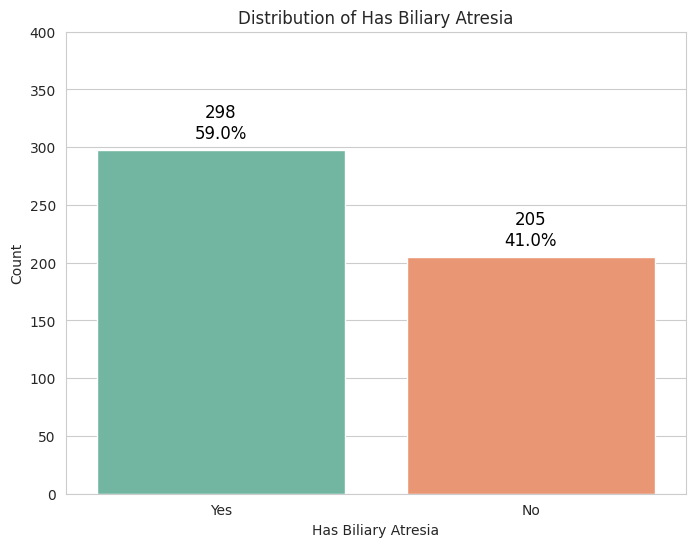

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you've already loaded your data into a DataFrame named 'data'
# Creating a new feature for whether the diagnosis is "Biliary atresia"
data['Has_Biliary_Atresia'] = data['Final diagnosis'].apply(lambda x: 'Yes' if x == 'Biliary atresia' else 'No')

# Calculating the counts and proportions for the "Has_Biliary_Atresia" feature
counts = data['Has_Biliary_Atresia'].value_counts()
proportions = (counts / counts.sum()).round(2)

# Setting style
sns.set_style("whitegrid")

# Creating the bar plot with a brighter color palette
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Has_Biliary_Atresia", data=data, palette='Set2')

# Setting title and labels
plt.title("Distribution of Has Biliary Atresia")
plt.xlabel("Has Biliary Atresia")
plt.ylabel("Count")
plt.xticks([0, 1], ['Yes', 'No'])
plt.ylim(0, 400)

# Adding counts and proportions on top of the bars
for index, (count, proportion) in enumerate(zip(counts, proportions)):
    ax.text(index, count + 10, f'{count}\n{proportion * 100}%', color='black', ha="center", fontsize=12)

# Displaying the plot
plt.show()


In [94]:

data['Has_Biliary_Atresia'] = data['Has_Biliary_Atresia'].replace({'Yes': 1, 'No': 0})


In [95]:
data["Has_Biliary_Atresia"]

0      1
1      1
2      1
3      1
4      1
      ..
498    0
499    0
500    0
501    0
502    0
Name: Has_Biliary_Atresia, Length: 503, dtype: int64

# **Overall pre-processing of features**

In [97]:
# drop above 50%
columns_to_drop1 = [
    'Age at onset of pale stools (weeks)',

    'A1AT level',

    'Height at presentation (cm)',
    'Postcode (first 4 characters only)',
    'Final diagnosis',
    'Height centile',
    'Weight centile'
]


data = data.drop(columns=columns_to_drop1)
# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a dataframe to display missing values and their percentage
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_percentage})

# Sort the dataframe by the percentage of missing values in descending order
missing_df = missing_df.sort_values(by="Percentage (%)", ascending=False)





missing_df.head(60)

Missing Values  \
Associated anomalies: Malrotation/ non-rotation                211   
Birthweight (kg)                                               210   
Gallbladder length (cm)                                        206   
Protein                                                        202   
APTT                                                           197   
PT                                                             173   
Nutrition (breast fed/formula fed/ mixed)                      152   
Weight at presentation (kg)                                    130   
Age at onset of jaundice (weeks)                               123   
Gestational age                                                120   
Conj bilirubin                                                 107   
Spleen length (cm)                                              87   
Racial group (White, Asian British, Black Briti...              79   
AST                                                             67   
GGT                                                             62   
Alk p                                                           40   
ALT                                                             34   
Gallbladder (present/ atretic/ absent)                          22   
Blood results at presentation: Total bilirubin                  20   
Stool colour (pale/ indeterminate/ pigmented)                   11   
Age (weeks)                                                      4   
CMV IgM (positive/ negative)                                     0   
Ultrasound: Hepatomegaly                                         0   
Ascites                                                          0   
Polysplenia                                                      0   
Interrupted IVC                                                  0   
Porta hepatis cyst? (yes/no)                                     0   
TBIDA or HIDA: Radioisotope study done?                          0   
Result (Excretory/  Non excretory)                               0   
Gender_encoded                                                   0   
Triangular cord sign                                             0   
Other                                                            0   
Renal tract anomaly                                              0   
Umbilical hernia                                                 0   
Inguinal hernia                                                  0   
Cleft lip/palate                                                 0   
Genetic mutation                                                 0   
Anorectal malformation                                           0   
Tracheo-oesophageal fistula                                      0   
Small bowel atresia                                              0   
Other cardiac anomaly                                            0   
ASD/VSD                                                          0   
Asplenia                                                         0   
Dextrocardia                                                     0   
Situs inversus                                                   0   
Twin (monoz/dizyg/ no)                                           0   
Has_Biliary_Atresia                                              0   

                                                    Percentage (%)  
Associated anomalies: Malrotation/ non-rotation          41.948310  
Birthweight (kg)                                         41.749503  
Gallbladder length (cm)                                  40.954274  
Protein                                                  40.159046  
APTT                                                     39.165010  
PT                                                       34.393638  
Nutrition (breast fed/formula fed/ mixed)                30.218688  
Weight at presentation (kg)                              25.844930  
Age at onset of jaundice (weeks)                         24.453280  
G

In [98]:
# Display unique values and frequencies for 'Associated anomalies: Malrotation/ non-rotation'
unique_values_malrotation = data['Associated anomalies: Malrotation/ non-rotation'].unique()
frequency_malrotation = data['Associated anomalies: Malrotation/ non-rotation'].value_counts()

unique_values_malrotation, frequency_malrotation



(array([ 0.,  1., nan]),
 0.0    263
 1.0     29
 Name: Associated anomalies: Malrotation/ non-rotation, dtype: int64)

In [99]:
# # Identify columns with 'NAType' data type
# na_type_columns = [col for col in data.columns if any(isinstance(x, pd.NA.__class__) for x in data[col])]

# # Replace <NA> values in the specified column with float NaN
# data["Associated anomalies：Malrotation/ non-rotation"] = data["Associated anomalies：Malrotation/ non-rotation"].apply(lambda x: float('nan') if x is pd.NA else x)

# # Convert the column to 'int64' data type (after filling NaN values with a temporary value, e.g., -1)
# data["Associated anomalies：Malrotation/ non-rotation"] = data["Associated anomalies：Malrotation/ non-rotation"].fillna(-1).astype(int)

# # Check unique values for the specified column
# unique_values_after_conversion = data["Associated anomalies：Malrotation/ non-rotation"].unique()

# # Replace -1 with NaN to represent missing values
# data["Associated anomalies：Malrotation/ non-rotation"] = data["Associated anomalies：Malrotation/ non-rotation"].replace(-1, float('nan'))

# # Check unique values for the specified column after replacing -1 with NaN
# unique_values_after_replacing = data["Associated anomalies：Malrotation/ non-rotation"].unique()

# unique_values_after_replacing



Categorical variable coding

In [100]:


# Step 2: Define the columns to check and encode their unique values
columns_to_check = [
    "Gallbladder (present/ atretic/ absent)",
    "Racial group (White, Asian British, Black British and Mixed)",
    "Nutrition (breast fed/formula fed/ mixed)",
    "Stool colour (pale/ indeterminate/ pigmented)"
]

encoded_mappings = {}
for col in columns_to_check:
    unique_vals = data[col].dropna().unique()
    encoded_mappings[col] = {value: idx+1 for idx, value in enumerate(unique_vals)}
    data[col] = data[col].map(encoded_mappings[col])

# Step 3: Replace the original columns with the encoded values (already done in the loop above)

# Step 4: Display the frequency of each unique value for the specified columns
frequency_values_reload = data[columns_to_check].apply(lambda x: x.value_counts()).fillna(0).astype(int).T
frequency_values_reload


1.0  2.0  3.0  4.0
Gallbladder (present/ atretic/ absent)              266  126   89    0
Racial group (White, Asian British, Black Briti...  317   22   12   73
Nutrition (breast fed/formula fed/ mixed)           139  120   92    0
Stool colour (pale/ indeterminate/ pigmented)        89  225  178    0

# Preprocessing is complete, download the dataset as，data_with_missing_value

In [ ]:
data.to_csv('data_with_missing_value.csv', index=False)
from google.colab import files
files.download('data_with_missing_value.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
# Load the dataset
data1 = pd.read_csv('/content/data_with_missing_value.csv')


In [102]:


# Calculate the missing value ratio for each column
missing_ratio = data1.isnull().sum() / len(data1)

# Sort the missing ratio in descending order
missing_ratio_sorted = missing_ratio.sort_values(ascending=False)

missing_ratio_sorted

Associated anomalies: Malrotation/ non-rotation                 0.419483
Birthweight (kg)                                                0.417495
Gallbladder length (cm)                                         0.409543
Protein                                                         0.401590
APTT                                                            0.391650
PT                                                              0.343936
Nutrition (breast fed/formula fed/ mixed)                       0.302187
Weight at presentation (kg)                                     0.258449
Age at onset of jaundice (weeks)                                0.244533
Gestational age                                                 0.238569
Conj bilirubin                                                  0.212724
Spleen length (cm)                                              0.172962
Racial group (White, Asian British, Black British and Mixed)    0.157058
AST                                                

# **Median and mode filling missing value**


In [106]:
# List of columns to fill missing values using median
columns_median = [
    "Age (weeks)", "Gestational age", "Birthweight (kg)", "Weight at presentation (kg)",
    "Age at onset of jaundice (weeks)", "Blood results at presentation: Total bilirubin",
    "Conj bilirubin", "GGT", "AST", "ALT", "Alk p", "PT", "APTT",
    "Protein", "Spleen length (cm)", "Gallbladder length (cm)"
]

# Fill missing values using median for the specified columns
for column in columns_median:
    data1[column].fillna(data1[column].median(), inplace=True)

# Fill missing values using mode for the other columns
for column in data1.columns:
    if column not in columns_median:
        mode_value = data1[column].mode()[0]
        data1[column].fillna(mode_value, inplace=True)

# Check if there are still any missing values in the dataset
missing_values_after_filling = data1.isnull().sum().sum()

missing_values_after_filling


0

In [107]:
# List of categorical columns for one-hot encoding
categorical_columns = [
    'Stool colour (pale/ indeterminate/ pigmented)',
    'Nutrition (breast fed/formula fed/ mixed)',
    'Racial group (White, Asian British, Black British and Mixed)',
    'Gallbladder (present/ atretic/ absent)'
]

# Apply one-hot encoding
data1_encoded = pd.get_dummies(data1, columns=categorical_columns, drop_first=False)


data1_encoded.head()


Age (weeks)  Gestational age  Birthweight (kg)  \
0     6.571429             39.0              3.06   
1     1.714286             38.0              2.95   
2     7.285714             37.0              3.46   
3     5.571429             42.0              4.00   
4    14.714286             39.0              3.06   

   Weight at presentation (kg)  Twin (monoz/dizyg/ no)  \
0                         3.90                       0   
1                         3.21                       0   
2                         4.80                       0   
3                         4.22                       0   
4                         3.90                       0   

   Age at onset of jaundice (weeks)  \
0                          1.000000   
1                          0.857143   
2                          0.714286   
3                          4.714286   
4                          1.000000   

   Associated anomalies: Malrotation/ non-rotation  Situs inversus  \
0                                              0.0               0   
1                                              0.0               0   
2                                              0.0               0   
3                                              0.0               0   
4                                              0.0               0   

   Dextrocardia  Asplenia  ...  Nutrition (breast fed/formula fed/ mixed)_1.0  \
0             0         0  ...                                              1   
1             0         0  ...                                              1   
2             0         0  ...                                              1   
3             0         0  ...                                              1   
4             0         0  ...                                              1   

   Nutrition (breast fed/formula fed/ mixed)_2.0  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Nutrition (breast fed/formula fed/ mixed)_3.0  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Racial group (White, Asian British, Black British and Mixed)_1.0  \
0                                                  1                  
1                                                  1                  
2                                                  1                  
3                                                  1                  
4                                                  1                  

   Racial group (White, Asian British, Black British and Mixed)_2.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Racial group (White, Asian British, Black British and Mixed)_3.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Racial group (White, Asian British, Black British and Mixed)_4.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3

In [108]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

data1_encoded[columns_median] = scaler.fit_transform(data1_encoded[columns_median])


data1_encoded.head()


Age (weeks)  Gestational age  Birthweight (kg)  \
0    -0.091734         0.319287          0.085630   
1    -1.361101        -0.029089         -0.105477   
2     0.094937        -0.377465          0.780565   
3    -0.353075         1.364415          1.718726   
4     2.036323         0.319287          0.085630   

   Weight at presentation (kg)  Twin (monoz/dizyg/ no)  \
0                    -0.192610                       0   
1                    -0.834458                       0   
2                     0.644583                       0   
3                     0.105059                       0   
4                    -0.192610                       0   

   Age at onset of jaundice (weeks)  \
0                         -0.528369   
1                         -0.597062   
2                         -0.665754   
3                          1.257626   
4                         -0.528369   

   Associated anomalies: Malrotation/ non-rotation  Situs inversus  \
0                                              0.0               0   
1                                              0.0               0   
2                                              0.0               0   
3                                              0.0               0   
4                                              0.0               0   

   Dextrocardia  Asplenia  ...  Nutrition (breast fed/formula fed/ mixed)_1.0  \
0             0         0  ...                                              1   
1             0         0  ...                                              1   
2             0         0  ...                                              1   
3             0         0  ...                                              1   
4             0         0  ...                                              1   

   Nutrition (breast fed/formula fed/ mixed)_2.0  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Nutrition (breast fed/formula fed/ mixed)_3.0  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Racial group (White, Asian British, Black British and Mixed)_1.0  \
0                                                  1                  
1                                                  1                  
2                                                  1                  
3                                                  1                  
4                                                  1                  

   Racial group (White, Asian British, Black British and Mixed)_2.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Racial group (White, Asian British, Black British and Mixed)_3.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Racial group (White, Asian British, Black British and Mixed)_4.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3

# **Random Forest**

In [109]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# a) Splitting the data into training and testing sets
X = data1_encoded.drop("Has_Biliary_Atresia", axis=1)
y = data1_encoded["Has_Biliary_Atresia"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# b) Perform k-fold cross-validation (k=5) on the training set
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

cv_scores


array([0.96296296, 0.97530864, 0.9625    , 0.975     , 0.95      ])

In [116]:
from sklearn.model_selection import RandomizedSearchCV

# c) Adjusting hyperparameters using the results of cross-validation
param_distributions = {
    'n_estimators': [10, 25, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing the random forest model
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


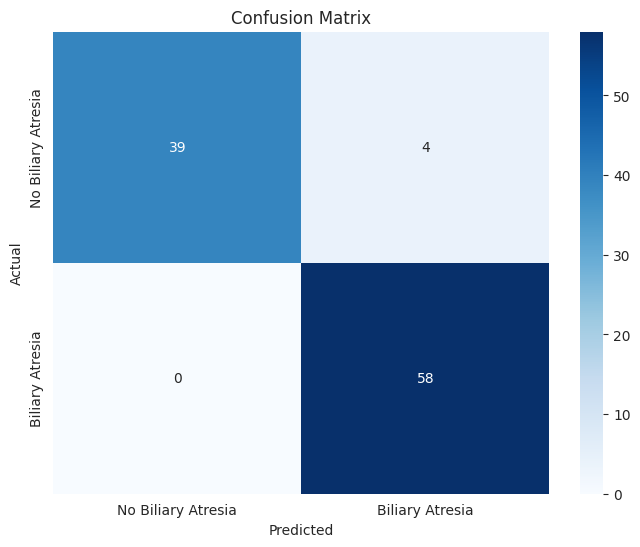

(0.9603960396039604,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.91      0.95        43\n           1       0.94      1.00      0.97        58\n\n    accuracy                           0.96       101\n   macro avg       0.97      0.95      0.96       101\nweighted avg       0.96      0.96      0.96       101\n')

In [117]:
# d) Evaluating the performance on the test set using the best hyperparameters

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

accuracy, classification_rep


Random Forest overall metrics with best parameters:
  Accuracy: 0.9604
  Precision: 0.963
  Recall: 0.9604
  F1 Score: 0.9601


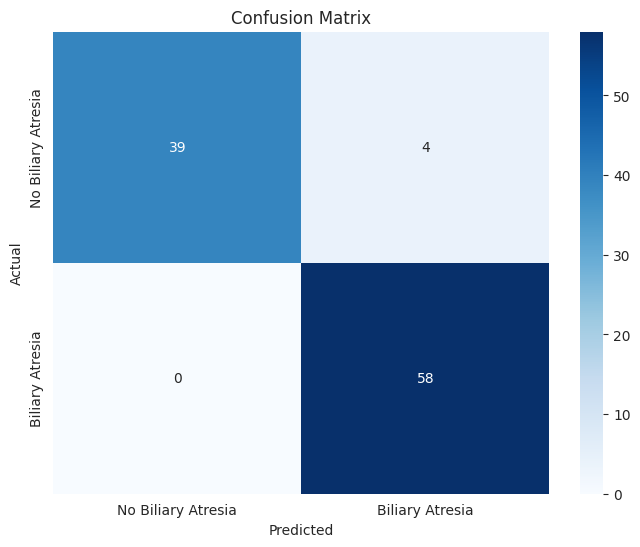

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# d) Evaluating the performance on the test set using the best hyperparameters
best_params = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Storing metrics in a dictionary
overall_metrics = {
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1 Score': round(fscore, 4)
}

# Display overall metrics
print("Random Forest overall metrics with best parameters:")
for metric, value in overall_metrics.items():
    print(f"  {metric}: {value}")

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# **SVM**

In [53]:
from sklearn.svm import SVC

# a) We already split the data into training and testing sets earlier

# b) Perform k-fold cross-validation (k=5) on the training set using SVM
svm = SVC(random_state=42)
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

svm_cv_scores


array([0.96296296, 0.96296296, 0.9625    , 0.9625    , 0.9625    ])

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Reducing the parameter grid for faster computation
reduced_svm_param_distributions = {
    'C': [1, 10],
    'gamma': ['scale', 1],
    'kernel': ['linear', 'rbf']
}

# Initializing the SVM model
svm = SVC(random_state=42)

reduced_svm_random_search = RandomizedSearchCV(estimator=svm, param_distributions=reduced_svm_param_distributions,
                                               n_iter=4, cv=5, n_jobs=-1, verbose=2, random_state=42)

reduced_svm_random_search.fit(X_train, y_train)

# Best hyperparameters from the reduced random search
reduced_svm_best_params = reduced_svm_random_search.best_params_
print("Best parameters found: ", reduced_svm_best_params)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'kernel': 'linear', 'gamma': 'scale', 'C': 1}


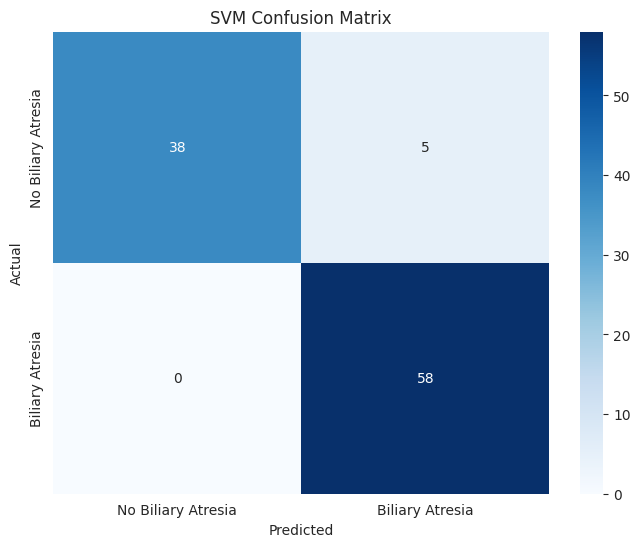

(0.9504950495049505,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.94        43\n           1       0.92      1.00      0.96        58\n\n    accuracy                           0.95       101\n   macro avg       0.96      0.94      0.95       101\nweighted avg       0.95      0.95      0.95       101\n')

In [121]:
# Using the best hyperparameters to train the SVM model on the training set
best_svm = SVC(C=1, gamma='scale', kernel='linear', random_state=42)
best_svm.fit(X_train, y_train)

# Predicting on the test set
svm_y_pred = best_svm.predict(X_test)

# Metrics
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_classification_rep = classification_report(y_test, svm_y_pred)
svm_confusion_mat = confusion_matrix(y_test, svm_y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()

svm_accuracy, svm_classification_rep


SVM overall metrics with best parameters:
  Accuracy: 0.9505
  Precision: 0.9544
  Recall: 0.9505
  F1 Score: 0.95


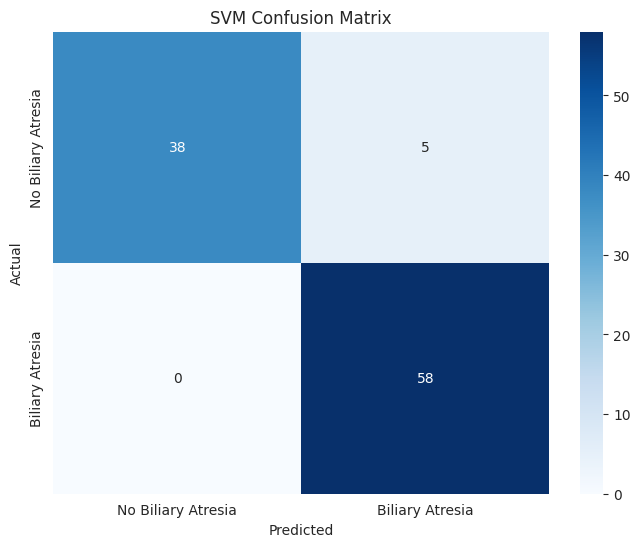

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Using the best hyperparameters to train the SVM model on the training set
best_svm = SVC(C=1, gamma='scale', kernel='linear', random_state=42)
best_svm.fit(X_train, y_train)

# Predicting on the test set
svm_y_pred = best_svm.predict(X_test)

# Metrics
svm_accuracy = accuracy_score(y_test, svm_y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, svm_y_pred, average='weighted')

# Storing metrics in a dictionary
svm_overall_metrics = {
    'Accuracy': round(svm_accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1 Score': round(fscore, 4)
}

# Display overall metrics
print("SVM overall metrics with best parameters:")
for metric, value in svm_overall_metrics.items():
    print(f"  {metric}: {value}")

# Confusion Matrix
svm_confusion_mat = confusion_matrix(y_test, svm_y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()


# **logistic regression**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# a) We already split the data into training and testing sets earlier

# b) Perform k-fold cross-validation (k=5) on the training set using Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=10000)
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

logreg_cv_scores


array([0.97530864, 0.98765432, 0.9625    , 0.975     , 0.975     ])

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Reducing the parameter grid for faster computation
reduced_param_distributions = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Initializing the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=10000)

reduced_random_search = RandomizedSearchCV(estimator=logreg, param_distributions=reduced_param_distributions,
                                           n_iter=4, cv=5, n_jobs=-1, verbose=2, random_state=42)

reduced_random_search.fit(X_train, y_train)

# Best hyperparameters from the reduced random search
reduced_best_params = reduced_random_search.best_params_
print("Best parameters found: ", reduced_best_params)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'penalty': 'l2', 'C': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

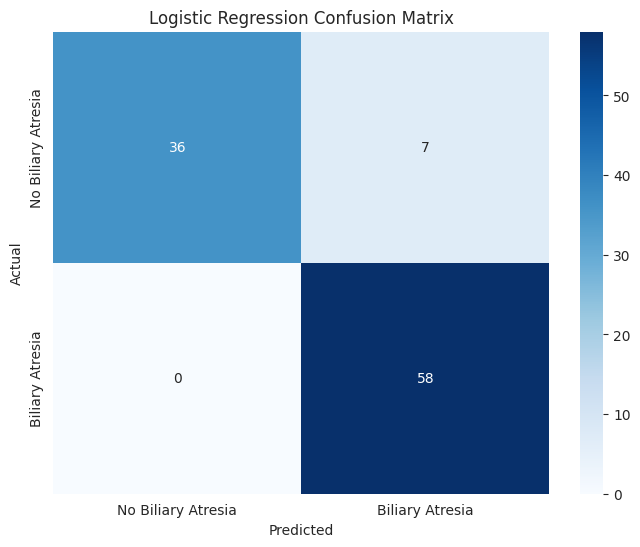

Accuracy: 0.9306930693069307
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.89      1.00      0.94        58

    accuracy                           0.93       101
   macro avg       0.95      0.92      0.93       101
weighted avg       0.94      0.93      0.93       101



In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
best_params = {'C': 1, 'penalty': 'l2'}
# Train the model using the best parameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], random_state=42, max_iter=10000)
best_logreg.fit(X_train, y_train)

# Predict on the test set using the best logistic regression model
y_pred_logreg = best_logreg.predict(X_test)

# Metrics
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_classification_rep = classification_report(y_test, y_pred_logreg)

# Plotting confusion matrix
logreg_confusion_mat = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("Accuracy:", logreg_accuracy)
print(logreg_classification_rep)



Logistic Regression overall metrics with best parameters:
  Accuracy: 0.9307
  Precision: 0.9382
  Recall: 0.9307
  F1 Score: 0.9296


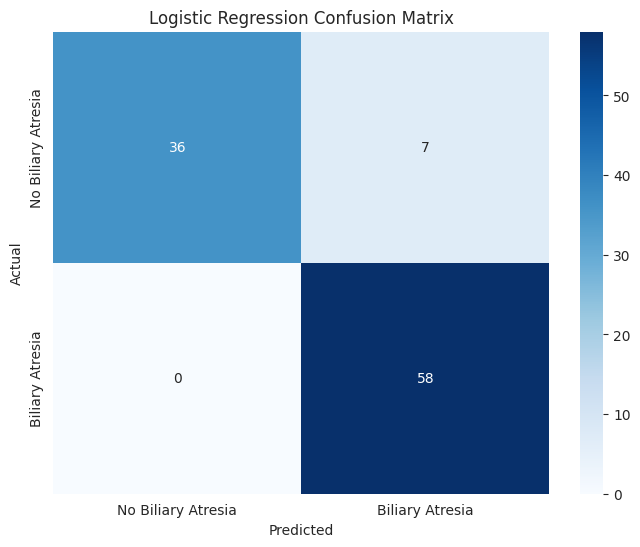

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

best_params = {'C': 1, 'penalty': 'l2'}
# Train the model using the best parameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], random_state=42, max_iter=10000)
best_logreg.fit(X_train, y_train)

# Predict on the test set using the best logistic regression model
y_pred_logreg = best_logreg.predict(X_test)

# Metrics
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_logreg, average='weighted')

# Storing metrics in a dictionary
logreg_overall_metrics = {
    'Accuracy': round(logreg_accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1 Score': round(fscore, 4)
}

# Display overall metrics
print("Logistic Regression overall metrics with best parameters:")
for metric, value in logreg_overall_metrics.items():
    print(f"  {metric}: {value}")

# Confusion Matrix
logreg_confusion_mat = confusion_matrix(y_test, y_pred_logreg)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


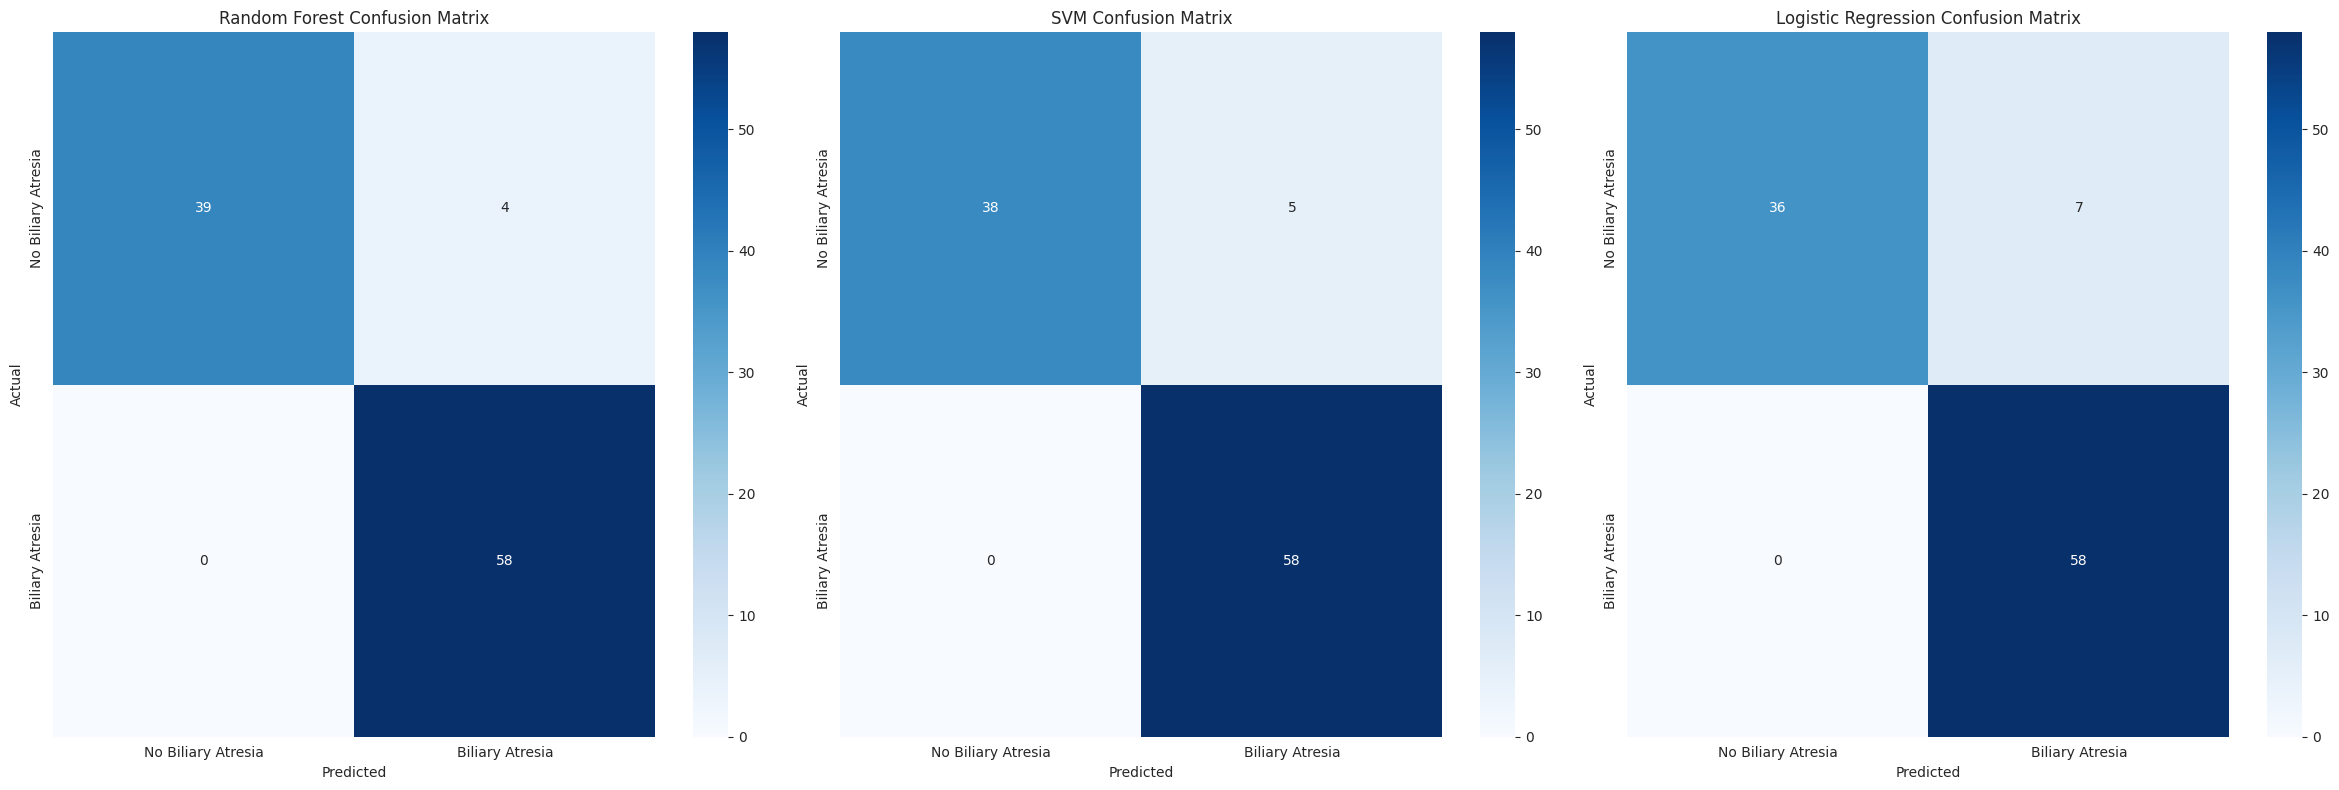

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Random Forest Confusion Matrix
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# SVM Confusion Matrix
sns.heatmap(svm_confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Logistic Regression Confusion Matrix
sns.heatmap(logreg_confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            ax=axes[2])
axes[2].set_title('Logistic Regression Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [125]:
# Random Forest Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_mat)

# SVM Confusion Matrix
print("\nSVM Confusion Matrix:")
print(svm_confusion_mat)

# Logistic Regression Confusion Matrix
print("\nLogistic Regression Confusion Matrix:")
print(logreg_confusion_mat)


Random Forest Confusion Matrix:
[[39  4]
 [ 0 58]]

SVM Confusion Matrix:
[[38  5]
 [ 0 58]]

Logistic Regression Confusion Matrix:
[[36  7]
 [ 0 58]]


# **Multiple imputation**

In [2]:
import pandas as pd

# Reload the dataset and check for missing values
data2 = pd.read_csv("/content/data_with_missing_value.csv")

# Calculate the percentage of missing values for each column
missing_data2 = data2.isnull().sum() / len(data2) * 100
missing_data2_percentage = missing_data2[missing_data2 > 0].sort_values(ascending=False)

missing_data2_percentage

Associated anomalies: Malrotation/ non-rotation                 41.948310
Birthweight (kg)                                                41.749503
Gallbladder length (cm)                                         40.954274
Protein                                                         40.159046
APTT                                                            39.165010
PT                                                              34.393638
Nutrition (breast fed/formula fed/ mixed)                       30.218688
Weight at presentation (kg)                                     25.844930
Age at onset of jaundice (weeks)                                24.453280
Gestational age                                                 23.856859
Conj bilirubin                                                  21.272366
Spleen length (cm)                                              17.296223
Racial group (White, Asian British, Black British and Mixed)    15.705765
AST                                   

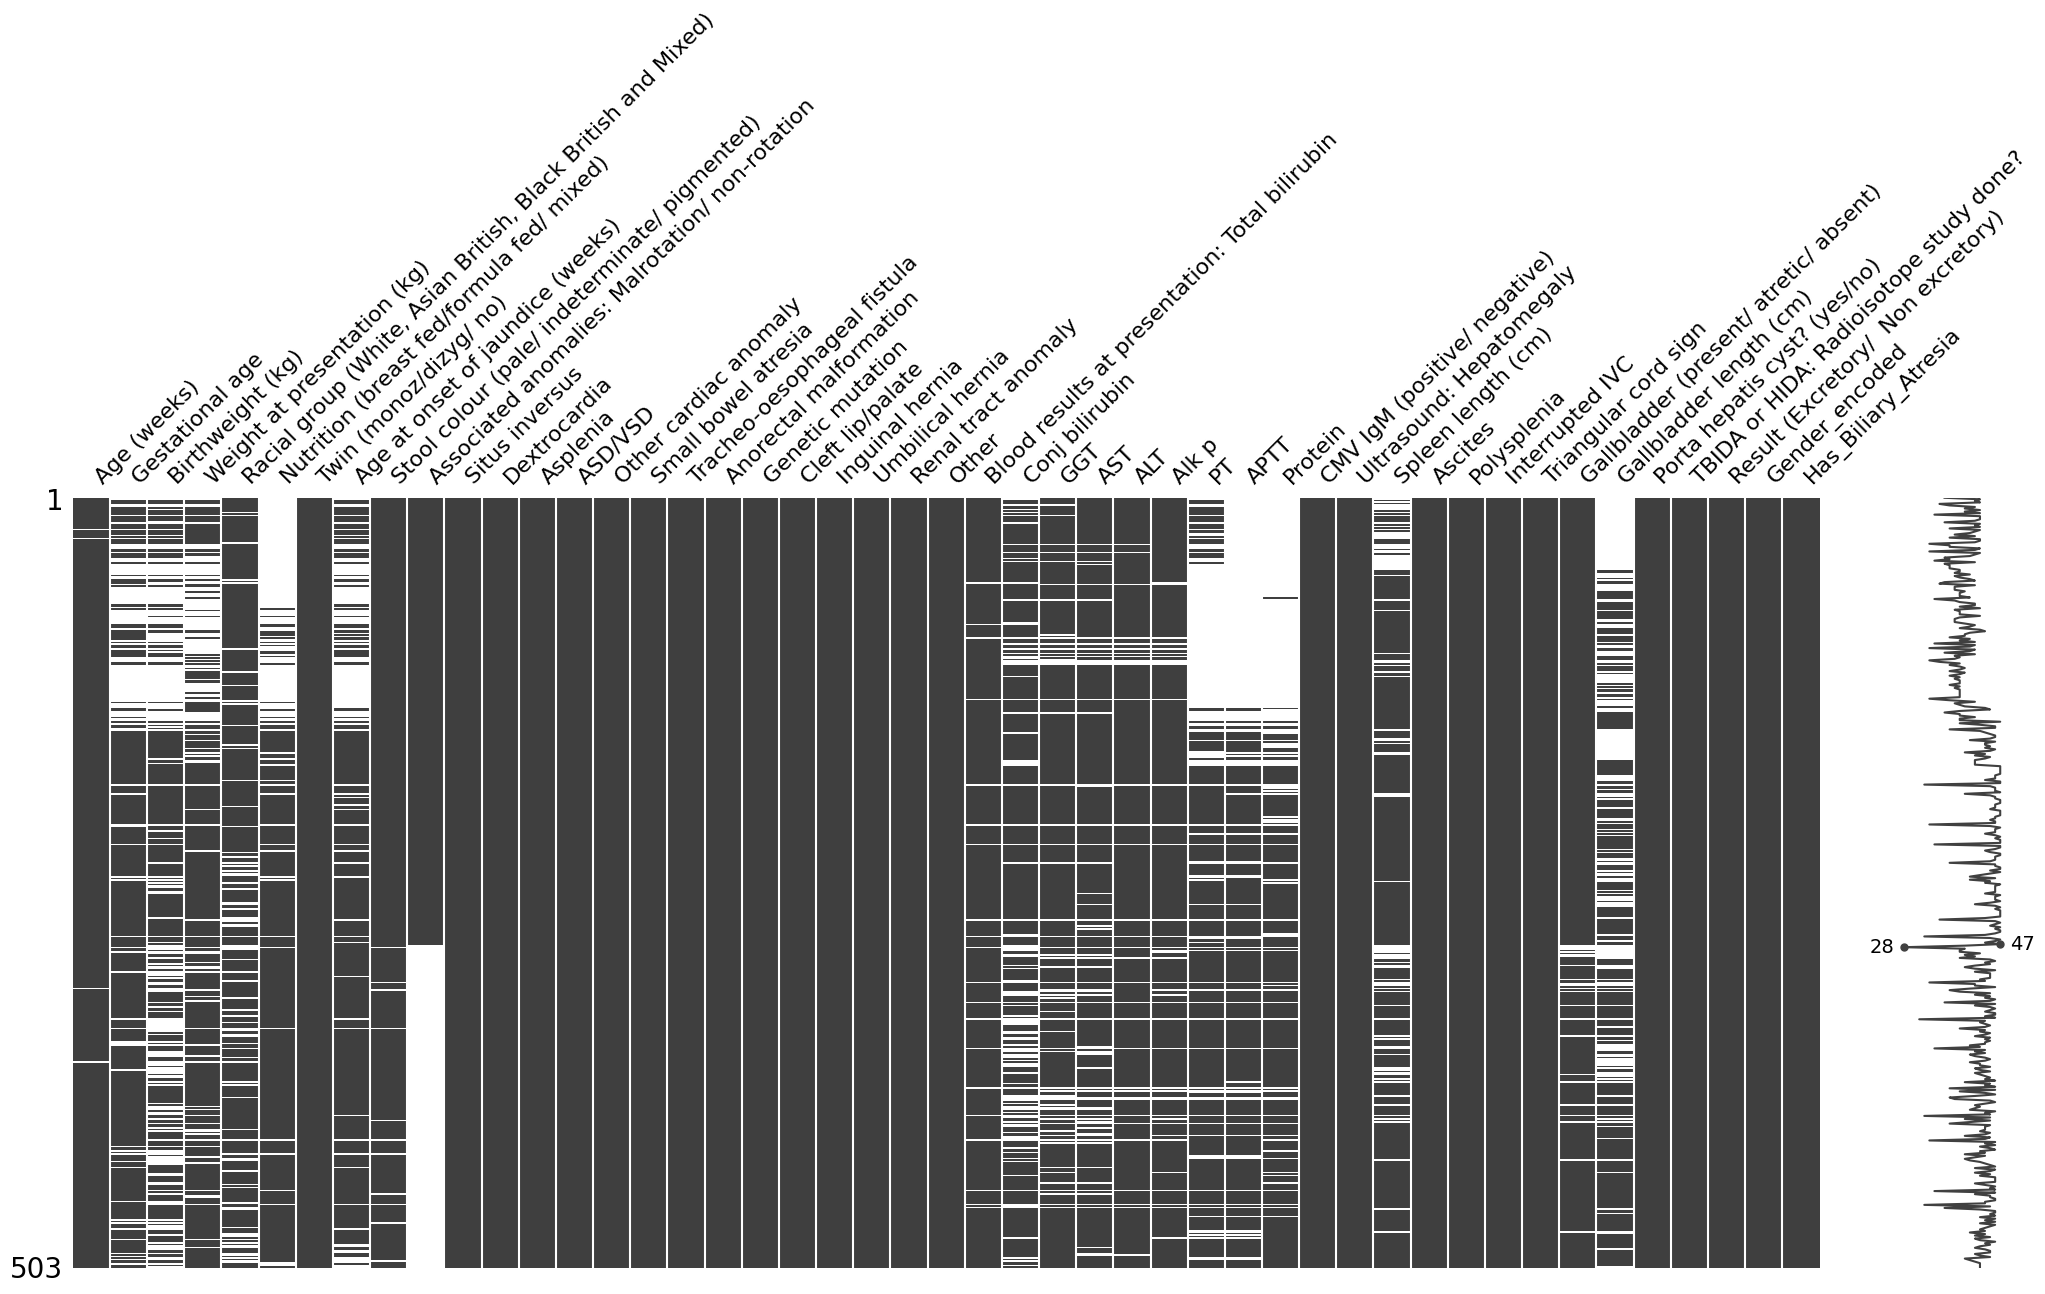

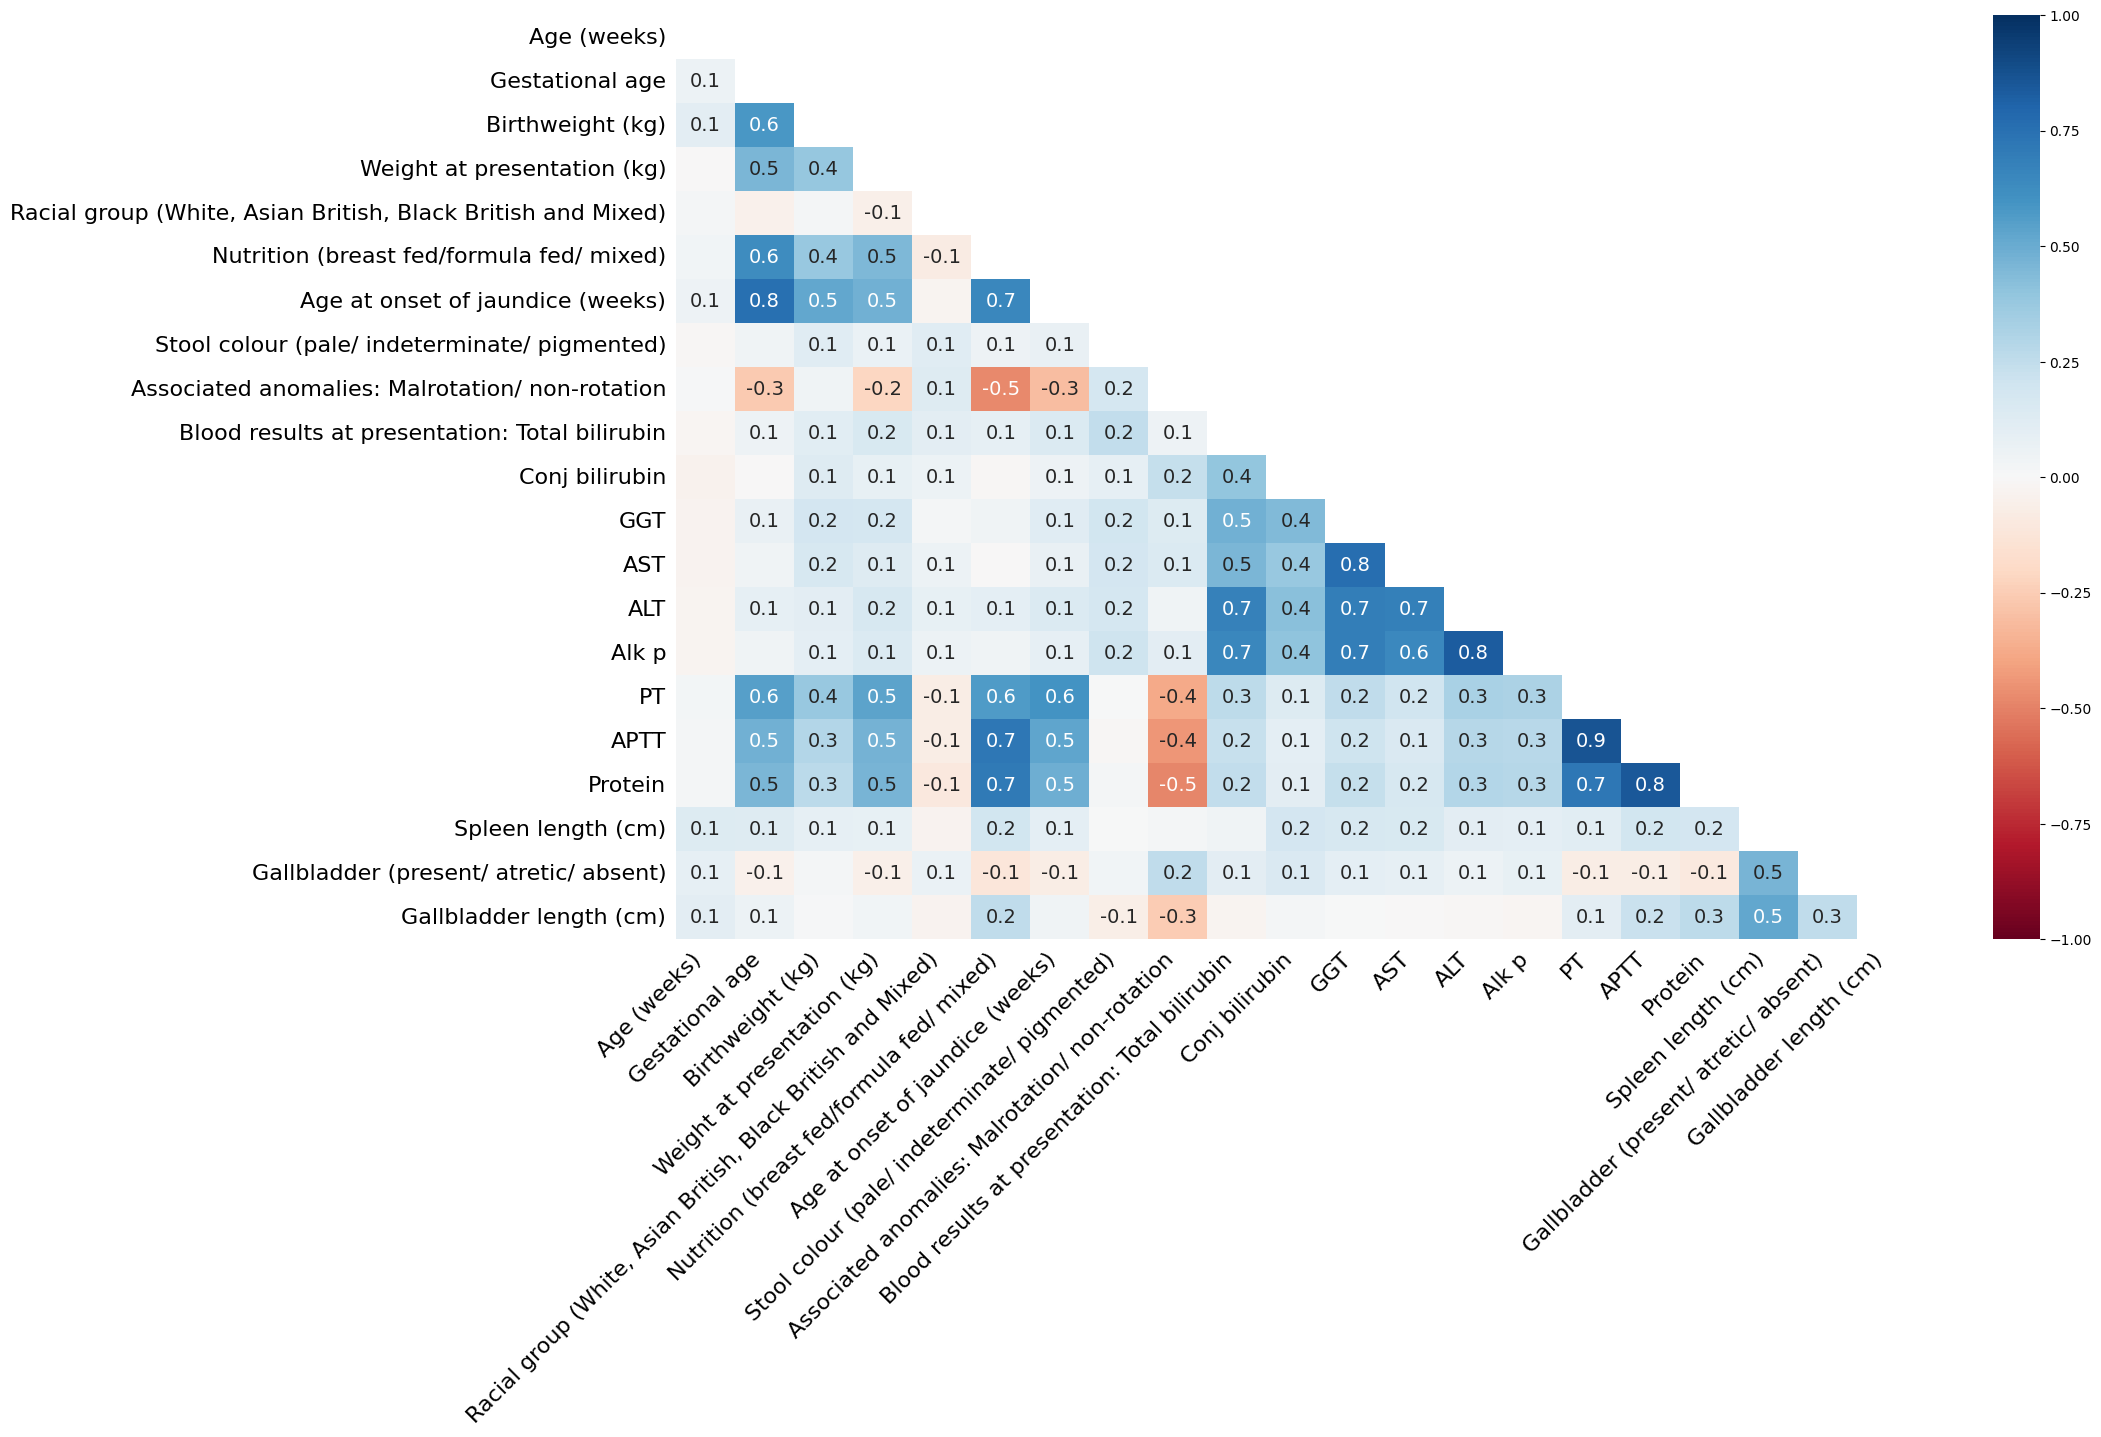

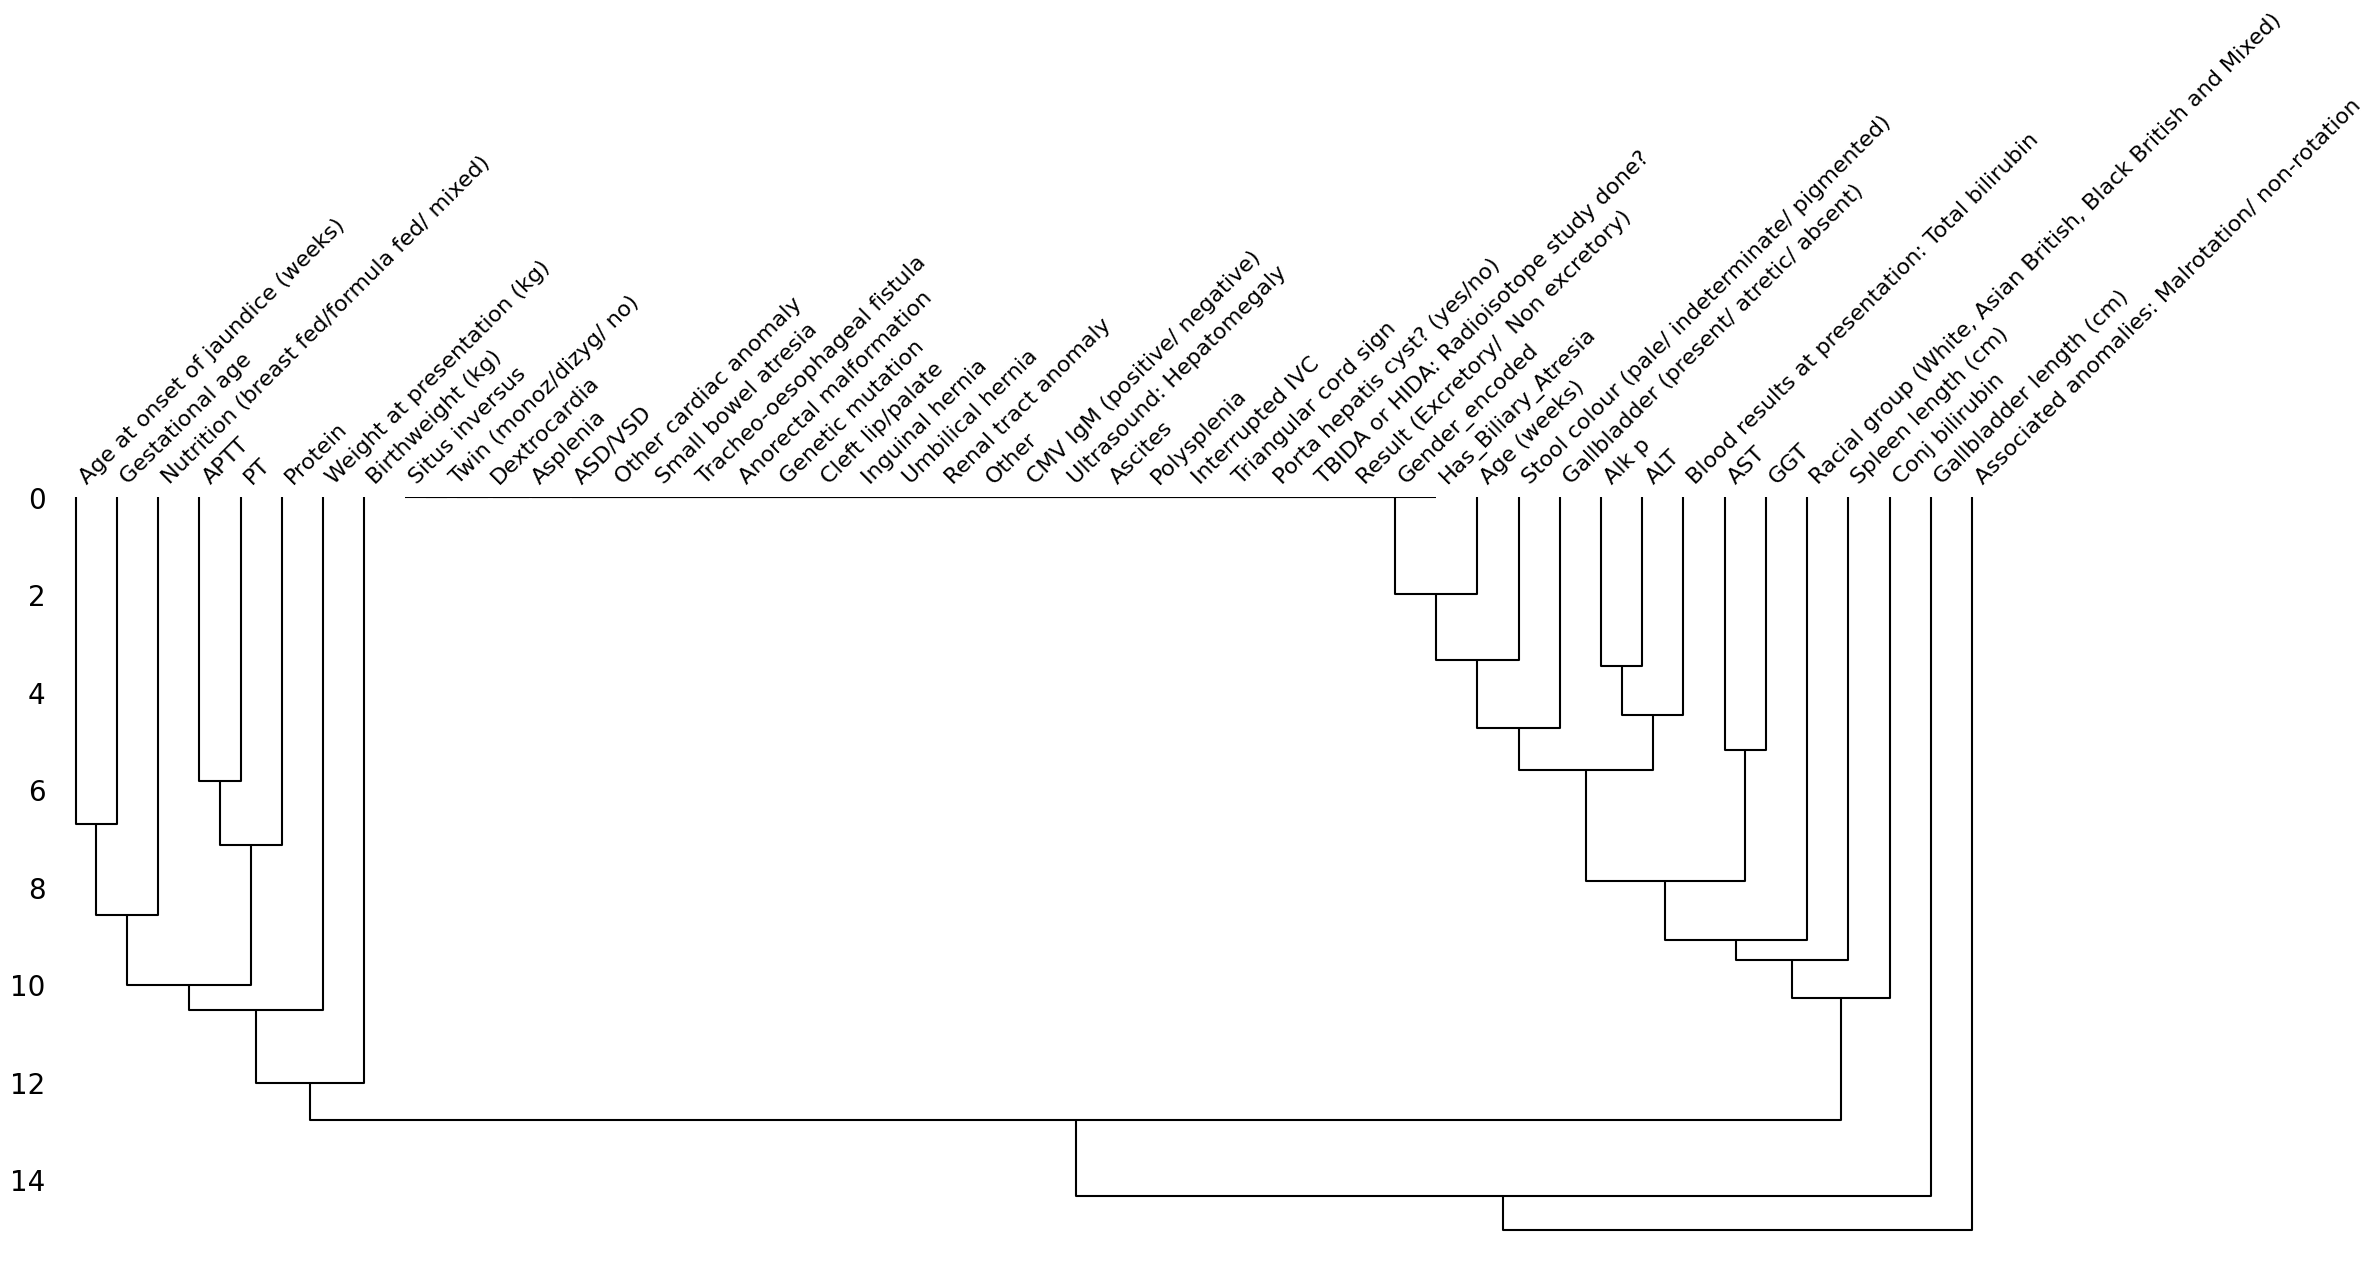

In [4]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualise missing patterns across the dataset , visualise correlation of missing values between different columns, visualise hierarchical clustering patterns of missing values using tree diagrams
msno.matrix(data2)
plt.show()


msno.heatmap(data2)
plt.show()


msno.dendrogram(data2)
plt.show()

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Step 1: Split features
continuous_features = ["Age (weeks)", "Gestational age", "Birthweight (kg)",
                       "Weight at presentation (kg)", "Age at onset of jaundice (weeks)",
                       "Blood results at presentation: Total bilirubin", "Conj bilirubin",
                       "GGT", "AST", "ALT", "Alk p", "PT", "APTT", "Protein", "Spleen length (cm)",
                       "Gallbladder length (cm)"]

categorical_features = [col for col in data2.columns if col not in continuous_features]



data_continuous = data2[continuous_features]
data_categorical = data2[categorical_features]

imputed_datasets = []

for i in range(5):  # Creating 5 imputed datasets
    # Step 2: Impute continuous features using RandomForest
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=i)
    imputer_cont = IterativeImputer(random_state=i, estimator=rf_regressor, max_iter=10)
    data_continuous_imputed = imputer_cont.fit_transform(data_continuous)

    # Step 3: Impute categorical features using Logistic Regression
    logreg = LogisticRegression(max_iter=5000)
    imputer_cat = IterativeImputer(random_state=i, estimator=logreg, max_iter=10)
    data_categorical_imputed = imputer_cat.fit_transform(data_categorical)

    # Convert imputed data back to dataframe
    data_continuous_df = pd.DataFrame(data_continuous_imputed, columns=continuous_features)
    data_categorical_df = pd.DataFrame(data_categorical_imputed, columns=categorical_features)

    # Step 4: Merge imputed data
    data_imputed = pd.concat([data_continuous_df, data_categorical_df], axis=1)

    # Append each imputed dataset to the list
    imputed_datasets.append(data_imputed)

# Display the head of the first imputed dataset
imputed_datasets[0].head()


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Age (weeks)  Gestational age  Birthweight (kg)  \
0     6.571429            39.66            3.7616   
1     1.714286            38.00            2.9500   
2     7.285714            37.00            3.4600   
3     5.571429            42.00            4.0000   
4    14.714286            40.08            3.2582   

   Weight at presentation (kg)  Age at onset of jaundice (weeks)  \
0                      4.53665                          2.025714   
1                      3.21000                          0.857143   
2                      4.80000                          0.714286   
3                      4.22000                          4.714286   
4                      5.35040                          3.945714   

   Blood results at presentation: Total bilirubin  Conj bilirubin     GGT  \
0                                           103.0          313.12  112.00   
1                                           125.0          112.00  822.00   
2                                           100.0           65.00  695.00   
3                                           144.0          117.00  304.00   
4                                           105.0           76.88  695.96   

     AST    ALT  ...  Ascites  Polysplenia  Interrupted IVC  \
0  186.0  199.0  ...      0.0          0.0              0.0   
1  101.0   53.0  ...      0.0          0.0              0.0   
2  106.0   59.0  ...      0.0          0.0              0.0   
3  342.0  258.0  ...      0.0          0.0              0.0   
4  118.0  125.0  ...      0.0          0.0              0.0   

   Triangular cord sign  Gallbladder (present/ atretic/ absent)  \
0                   0.0                                     1.0   
1                   0.0                                     2.0   
2                   0.0                                     1.0   
3                   0.0                                     3.0   
4                   0.0                                     1.0   

   Porta hepatis cyst? (yes/no)  TBIDA or HIDA: Radioisotope study done?  \
0                           0.0                                      1.0   
1                           0.0                                      0.0   
2                           0.0                                      1.0   
3                           0.0                                      1.0   
4                           0.0                                      0.0   

   Result (Excretory/  Non excretory)  Gender_encoded  Has_Biliary_Atresia  
0                                 0.0             1.0                  1.0  
1                                 0.0             0.0                  1.0  
2                                 0.0             0.0                  1.0  
3                                 0.0             1.0                  1.0  
4                                 0.0             0.0                  1.0  

[5 rows x 47 columns]

In [14]:
# import pandas as pd


# imputed_datasets[0].to_csv('imputed_dataset_0.csv', index=False)
# imputed_datasets[1].to_csv('imputed_dataset_1.csv', index=False)
# imputed_datasets[2].to_csv('imputed_dataset_2.csv', index=False)
# imputed_datasets[3].to_csv('imputed_dataset_3.csv', index=False)
# imputed_datasets[4].to_csv('imputed_dataset_4.csv', index=False)



# from google.colab import files

# files.download('imputed_dataset_0.csv')
# files.download('imputed_dataset_1.csv')
# files.download('imputed_dataset_2.csv')
# files.download('imputed_dataset_3.csv')
# files.download('imputed_dataset_4.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Standardization

In [20]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


continuous_features = [
    "Age (weeks)", "Gestational age", "Birthweight (kg)", "Weight at presentation (kg)",
    "Age at onset of jaundice (weeks)", "Blood results at presentation: Total bilirubin",
    "Conj bilirubin", "GGT", "AST", "ALT", "Alk p", "PT", "APTT",
    "Protein", "Spleen length (cm)", "Gallbladder length (cm)"
]


for i in range(5):
    imputed_datasets[i][continuous_features] = scaler.fit_transform(imputed_datasets[i][continuous_features])


In [21]:
imputed_datasets[4].head()

Age (weeks)  Gestational age  Birthweight (kg)  \
0    -0.100549         0.403067          0.352260   
1    -1.361564        -0.027153         -0.170699   
2     0.084895        -0.368597          0.604348   
3    -0.360170         1.338625          1.424985   
4     2.013505         0.642079          0.241444   

   Weight at presentation (kg)  Age at onset of jaundice (weeks)  \
0                    -0.144082                         -0.313542   
1                    -0.909088                         -0.760486   
2                     0.481038                         -0.827898   
3                    -0.026052                          1.059650   
4                     1.262918                          0.933589   

   Blood results at presentation: Total bilirubin  Conj bilirubin       GGT  \
0                                       -0.306243        2.278360 -0.836486   
1                                       -0.019977        0.271164  0.810147   
2                                       -0.345280       -0.296011  0.515608   
3                                        0.227253        0.331502 -0.391200   
4                                       -0.280219       -0.208159  0.615079   

        AST       ALT  ...  Ascites  Polysplenia  Interrupted IVC  \
0  0.116926  0.660359  ...      0.0          0.0              0.0   
1 -0.442698 -0.589299  ...      0.0          0.0              0.0   
2 -0.409779 -0.537943  ...      0.0          0.0              0.0   
3  1.144001  1.165358  ...      0.0          0.0              0.0   
4 -0.330773  0.026971  ...      0.0          0.0              0.0   

   Triangular cord sign  Gallbladder (present/ atretic/ absent)  \
0                   0.0                                     1.0   
1                   0.0                                     2.0   
2                   0.0                                     1.0   
3                   0.0                                     3.0   
4                   0.0                                     1.0   

   Porta hepatis cyst? (yes/no)  TBIDA or HIDA: Radioisotope study done?  \
0                           0.0                                      1.0   
1                           0.0                                      0.0   
2                           0.0                                      1.0   
3                           0.0                                      1.0   
4                           0.0                                      0.0   

   Result (Excretory/  Non excretory)  Gender_encoded  Has_Biliary_Atresia  
0                                 0.0             1.0                  1.0  
1                                 0.0             0.0                  1.0  
2                                 0.0             0.0                  1.0  
3                                 0.0             1.0                  1.0  
4                                 0.0             0.0                  1.0  

[5 rows x 47 columns]

**Run Multiple imputation**

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# # Visualizing the distributions for each feature before and after imputation
# for feature in data2.columns:
#     fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#     # Before imputation
#     sns.kdeplot(data2[feature].dropna(), ax=ax[0], color='blue', shade=True, label='Before Imputation')
#     ax[0].set_title(f'{feature} - Before Imputation')
#     ax[0].set_xlabel(feature)
#     ax[0].set_ylabel('Density')
#     ax[0].legend()

#     # After imputation
#     sns.kdeplot(data_imputed[feature], ax=ax[1], color='green', shade=True, label='After Imputation')
#     ax[1].set_title(f'{feature} - After Imputation')
#     ax[1].set_xlabel(feature)
#     ax[1].set_ylabel('Density')
#     ax[1].legend()

#     plt.tight_layout()
#     plt.show()


**one-hot encoding**

In [18]:
# # Columns to be one-hot encoded
# columns_to_encode = [
#     'Stool colour (pale/ indeterminate/ pigmented)',
#     'Nutrition (breast fed/formula fed/ mixed)',
#     'Racial group (White/ Afrocaribbean/ S Asian/ Chinese/ Other',
#     'Gallbladder (present/ atretic/ absent)'
# ]

# # Performing one-hot encoding
# encoded_data2 = pd.get_dummies(data_imputed, columns=columns_to_encode, drop_first=False)

# # Displaying the first few rows of the resulting dataframe
# encoded_data2.head()


In [23]:
import pandas as pd

columns_to_encode = [
    'Stool colour (pale/ indeterminate/ pigmented)',
    'Nutrition (breast fed/formula fed/ mixed)',
    'Racial group (White, Asian British, Black British and Mixed)',
    'Gallbladder (present/ atretic/ absent)'
]


imputed_datasets_encoded = []

for i in range(5):

    encoded_df = pd.get_dummies(imputed_datasets[i], columns=columns_to_encode)

    imputed_datasets_encoded.append(encoded_df)


imputed_datasets_encoded[0].head()


Age (weeks)  Gestational age  Birthweight (kg)  \
0    -0.098261         0.534189          1.040122   
1    -1.364523        -0.031066         -0.178453   
2     0.087954        -0.371581          0.587285   
3    -0.358962         1.330994          1.398068   
4     2.024591         0.677205          0.284293   

   Weight at presentation (kg)  Age at onset of jaundice (weeks)  \
0                     0.251686                         -0.210804   
1                    -0.907382                         -0.760954   
2                     0.481770                         -0.828210   
3                    -0.024964                          1.054945   
4                     0.962644                          0.693110   

   Blood results at presentation: Total bilirubin  Conj bilirubin       GGT  \
0                                       -0.314338        2.676159 -0.839978   
1                                       -0.029689        0.263522  0.803889   
2                                       -0.353154       -0.300291  0.509845   
3                                        0.216144        0.323502 -0.395440   
4                                       -0.288461       -0.157778  0.512068   

        AST       ALT  ...  Nutrition (breast fed/formula fed/ mixed)_1.0  \
0  0.114128  0.658063  ...                                              1   
1 -0.445058 -0.591555  ...                                              1   
2 -0.412165 -0.540201  ...                                              1   
3  1.140399  1.163046  ...                                              1   
4 -0.333221  0.024695  ...                                              1   

   Nutrition (breast fed/formula fed/ mixed)_2.0  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Nutrition (breast fed/formula fed/ mixed)_3.0  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Racial group (White, Asian British, Black British and Mixed)_1.0  \
0                                                  1                  
1                                                  1                  
2                                                  1                  
3                                                  1                  
4                                                  1                  

   Racial group (White, Asian British, Black British and Mixed)_2.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Racial group (White, Asian British, Black British and Mixed)_3.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Racial group (White, Asian British, Black British and Mixed)_4.0  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   

In [24]:
for i, dataset in enumerate(imputed_datasets_encoded):
    missing_values = dataset.isnull().sum()
    total_missing_values = missing_values.sum()

    print(f"Dataset {i} has {total_missing_values} missing values.")
    if total_missing_values > 0:
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])


Dataset 0 has 0 missing values.
Dataset 1 has 0 missing values.
Dataset 2 has 0 missing values.
Dataset 3 has 0 missing values.
Dataset 4 has 0 missing values.


In [23]:

# imputed_datasets_encoded[0].to_csv('imputed_dataset_encoded_0.csv', index=False)
# imputed_datasets_encoded[1].to_csv('imputed_dataset_encoded_1.csv', index=False)
# imputed_datasets_encoded[2].to_csv('imputed_dataset_encoded_2.csv', index=False)
# imputed_datasets_encoded[3].to_csv('imputed_dataset_encoded_3.csv', index=False)
# imputed_datasets_encoded[4].to_csv('imputed_dataset_encoded_4.csv', index=False)


# from google.colab import files

# files.download('imputed_dataset_encoded_0.csv')
# files.download('imputed_dataset_encoded_1.csv')
# files.download('imputed_dataset_encoded_2.csv')
# files.download('imputed_dataset_encoded_3.csv')
# files.download('imputed_dataset_encoded_4.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Random Forest**

Dataset 0: Initial cross-validation scores: [0.97530864 0.98765432 0.9625     1.         0.9625    ]
Dataset 0: Accuracy with initial parameters: 0.9802
Dataset 0: Classification Report with initial parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.98        58

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



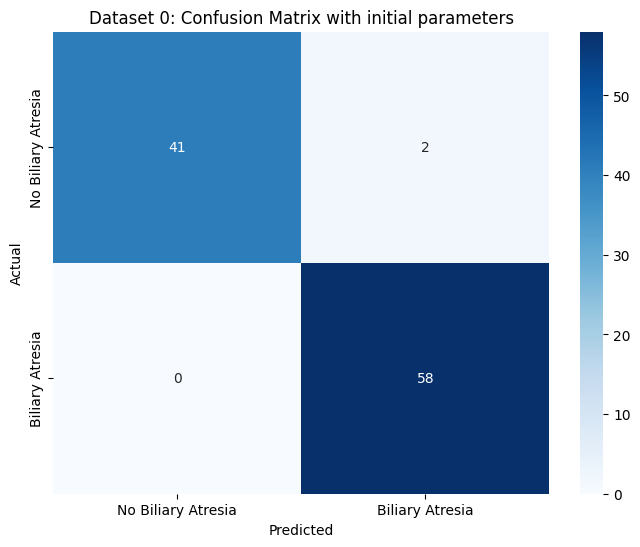

Dataset 1: Initial cross-validation scores: [0.97530864 0.97530864 0.9625     1.         0.9625    ]
Dataset 1: Accuracy with initial parameters: 0.9703
Dataset 1: Classification Report with initial parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



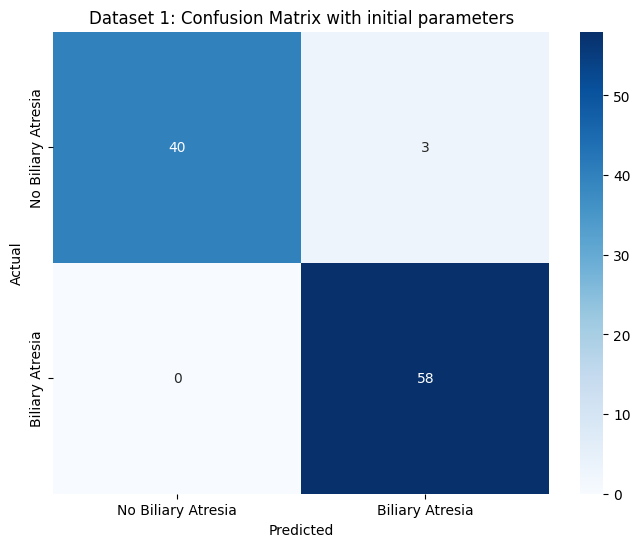

Dataset 2: Initial cross-validation scores: [0.97530864 0.98765432 0.9625     1.         0.9625    ]
Dataset 2: Accuracy with initial parameters: 0.9604
Dataset 2: Classification Report with initial parameters:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.95      0.98      0.97        58

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



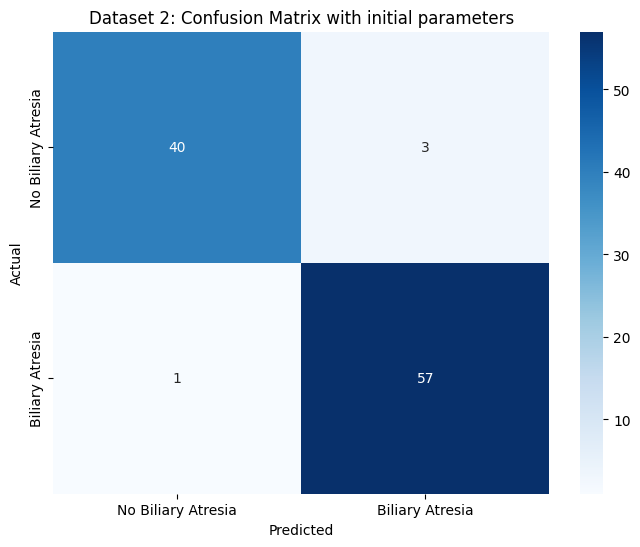

Dataset 3: Initial cross-validation scores: [0.97530864 0.97530864 0.9625     1.         0.9625    ]
Dataset 3: Accuracy with initial parameters: 0.9604
Dataset 3: Classification Report with initial parameters:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.95      0.98      0.97        58

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



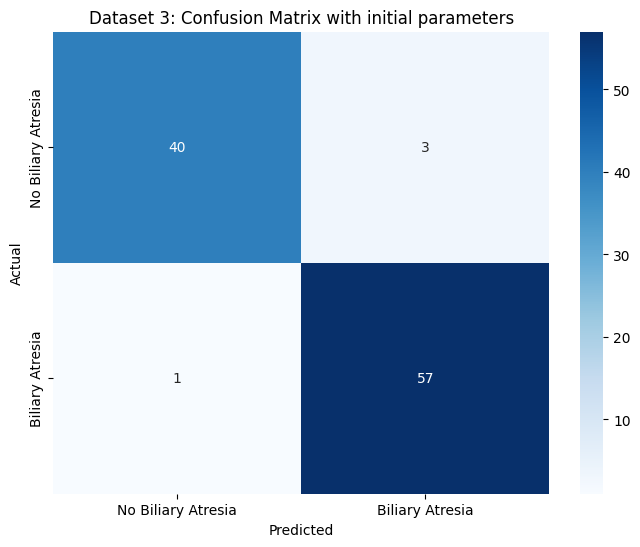

Dataset 4: Initial cross-validation scores: [0.97530864 0.97530864 0.9625     1.         0.9625    ]
Dataset 4: Accuracy with initial parameters: 0.9703
Dataset 4: Classification Report with initial parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



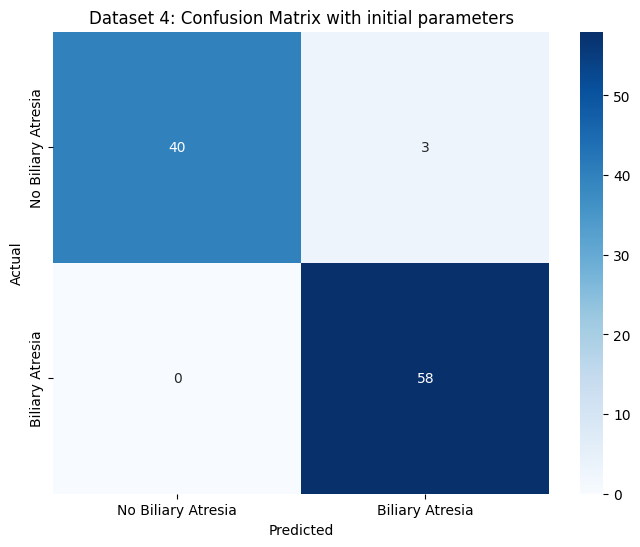

In [25]:
#new

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each imputed dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_initial = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_initial = dataset['Has_Biliary_Atresia']

    X_train_MI_initial, X_test_MI_initial, y_train_MI_initial, y_test_MI_initial = train_test_split(X_Multiple_imputation_initial, Y_Multiple_imputation_initial, test_size=0.2, random_state=42)

    # b) Perform k-fold cross-validation (k=5) on the training set
    rf_classifier_initial = RandomForestClassifier(random_state=42)
    cv_scores_initial = cross_val_score(rf_classifier_initial, X_train_MI_initial, y_train_MI_initial, cv=5)
    print(f"Dataset {i}: Initial cross-validation scores: {cv_scores_initial}")

    # c) Initializing random forest model with initial parameters
    rf_classifier_initial.fit(X_train_MI_initial, y_train_MI_initial)

    # d) Model evaluation with initial parameters
    y_pred_MI_initial = rf_classifier_initial.predict(X_test_MI_initial)

    accuracy_MI_initial = accuracy_score(y_test_MI_initial, y_pred_MI_initial)
    classification_rep_MI_initial = classification_report(y_test_MI_initial, y_pred_MI_initial)
    confusion_mat_MI_initial = confusion_matrix(y_test_MI_initial, y_pred_MI_initial)

    print(f"Dataset {i}: Accuracy with initial parameters: {accuracy_MI_initial:.4f}")
    print(f"Dataset {i}: Classification Report with initial parameters:")
    print(classification_rep_MI_initial)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat_MI_initial, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
                yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Dataset {i}: Confusion Matrix with initial parameters')
    plt.show()


In [26]:
from sklearn.metrics import precision_recall_fscore_support

# Stores the overall performance metrics for all datasets with initial parameters
overall_metrics_initial = []

# Loop through each imputed dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_initial = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_initial = dataset['Has_Biliary_Atresia']

    X_train_MI_initial, X_test_MI_initial, y_train_MI_initial, y_test_MI_initial = train_test_split(X_Multiple_imputation_initial, Y_Multiple_imputation_initial, test_size=0.2, random_state=42)

    # c) Initializing random forest model with initial parameters
    rf_classifier_initial = RandomForestClassifier(random_state=42)
    rf_classifier_initial.fit(X_train_MI_initial, y_train_MI_initial)

    # d) Model evaluation with initial parameters
    y_pred_MI_initial = rf_classifier_initial.predict(X_test_MI_initial)

    # Get precision, recall, fscore with initial parameters
    precision_initial, recall_initial, fscore_initial, _ = precision_recall_fscore_support(y_test_MI_initial, y_pred_MI_initial, average='weighted')

    # Storing metrics of the current dataset with initial parameters
    overall_metrics_initial.append({
        'Dataset': i,
        'Accuracy': round(accuracy_score(y_test_MI_initial, y_pred_MI_initial), 4),
        'Precision': round(precision_initial, 4),
        'Recall': round(recall_initial, 4),
        'F1 Score': round(fscore_initial, 4)
    })

# Display overall metrics with initial parameters
for metrics in overall_metrics_initial:
    print(f"Dataset {metrics['Dataset']} with initial parameters:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")


Dataset 0 with initial parameters:
  Accuracy: 0.9802
  Precision: 0.9809
  Recall: 0.9802
  F1 Score: 0.9801
Dataset 1 with initial parameters:
  Accuracy: 0.9703
  Precision: 0.9718
  Recall: 0.9703
  F1 Score: 0.9701
Dataset 2 with initial parameters:
  Accuracy: 0.9604
  Precision: 0.9609
  Recall: 0.9604
  F1 Score: 0.9603
Dataset 3 with initial parameters:
  Accuracy: 0.9604
  Precision: 0.9609
  Recall: 0.9604
  F1 Score: 0.9603
Dataset 4 with initial parameters:
  Accuracy: 0.9703
  Precision: 0.9718
  Recall: 0.9703
  F1 Score: 0.9701


**Parameter tuning RandomizedSearch**

In [27]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2, 3, 4],
    'bootstrap': [True, False]
}

X_Multiple_imputation = imputed_datasets_encoded[0].drop('Has_Biliary_Atresia', axis=1)
Y_Multiple_imputation = imputed_datasets_encoded[0]['Has_Biliary_Atresia']

X_train_MI, X_test_MI, y_train_MI, y_test_MI = train_test_split(X_Multiple_imputation, Y_Multiple_imputation, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)


random_search.fit(X_train_MI, y_train_MI)

best_params = random_search.best_params_
print(f"Best parameters: {best_params}")




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}


Dataset 0: Accuracy with optimized parameters: 0.9702970297029703
Dataset 0: Classification Report with optimized parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



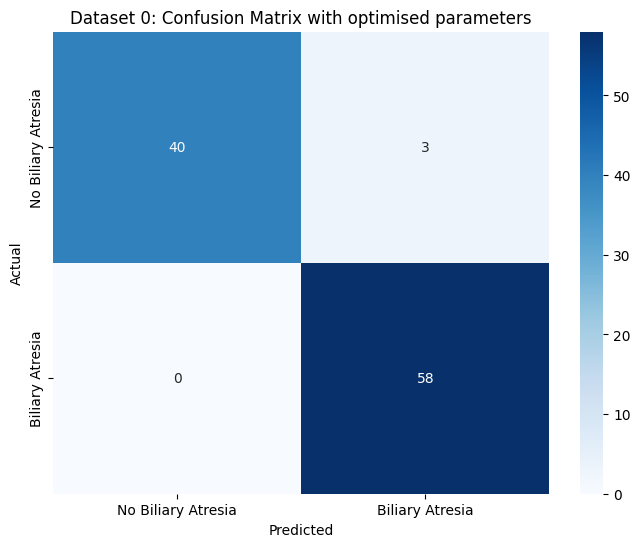

Dataset 1: Accuracy with optimized parameters: 0.9702970297029703
Dataset 1: Classification Report with optimized parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



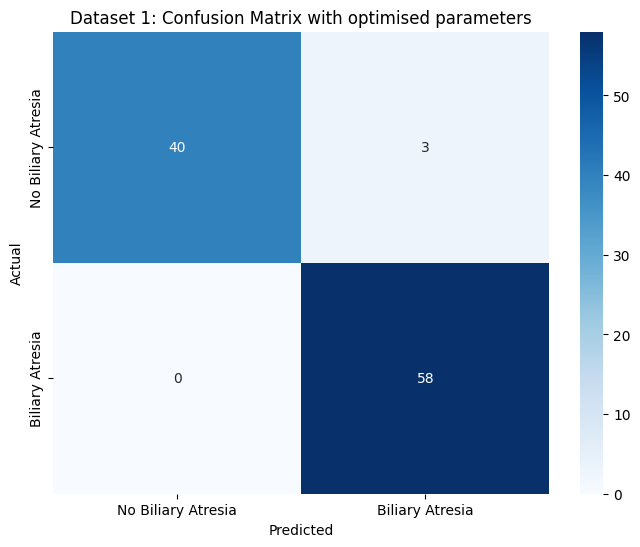

Dataset 2: Accuracy with optimized parameters: 0.9801980198019802
Dataset 2: Classification Report with optimized parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.98        58

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



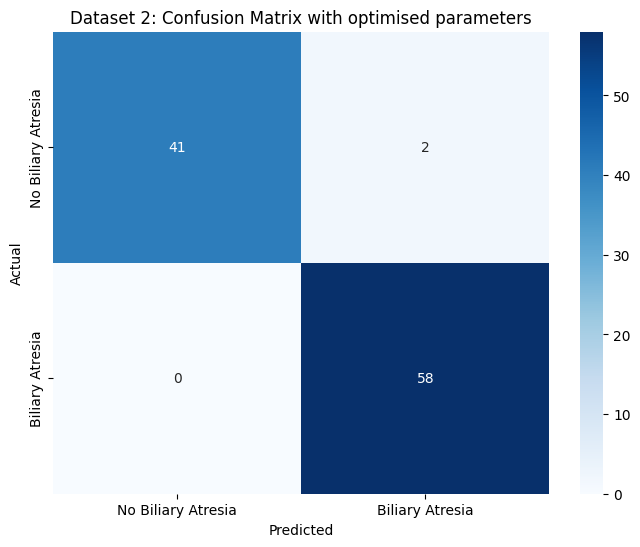

Dataset 3: Accuracy with optimized parameters: 0.9702970297029703
Dataset 3: Classification Report with optimized parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



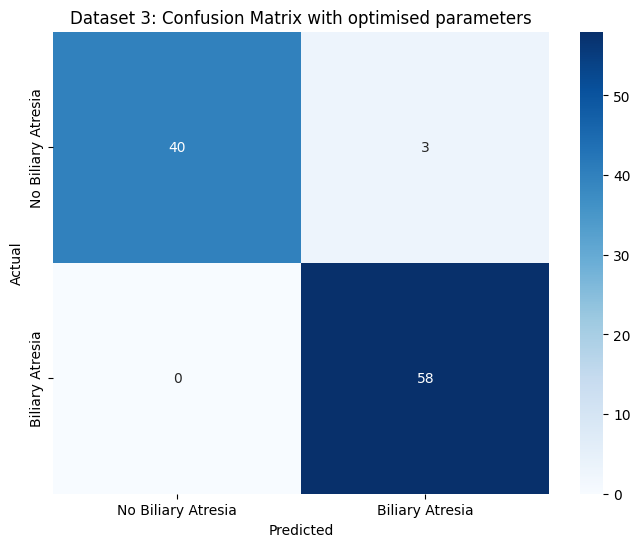

Dataset 4: Accuracy with optimized parameters: 0.9801980198019802
Dataset 4: Classification Report with optimized parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.98        58

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



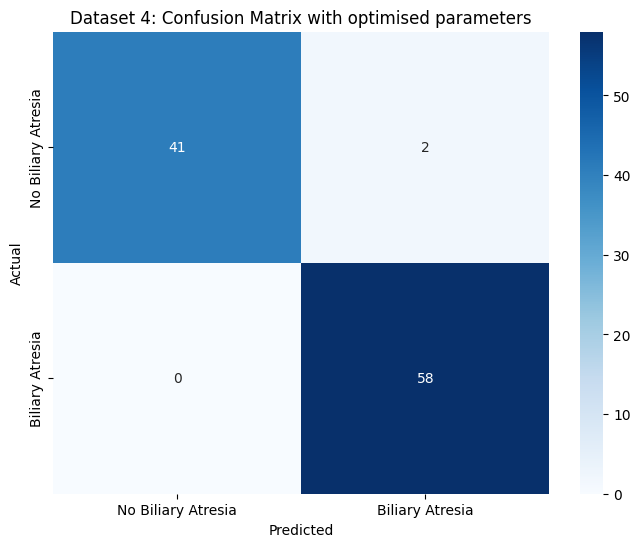

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


best_params = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}

# Loop through each imputed dataset

for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_opt = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_opt = dataset['Has_Biliary_Atresia']

    X_train_MI_opt, X_test_MI_opt, y_train_MI_opt, y_test_MI_opt = train_test_split(X_Multiple_imputation_opt, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)

    # c) Initializing random forest model with the best parameters
    rf_classifier_opt = RandomForestClassifier(**best_params, random_state=42)

    # Train the model with the best parameters
    rf_classifier_opt.fit(X_train_MI_opt, y_train_MI_opt)

    # d) Model evaluation
    y_pred_MI_opt = rf_classifier_opt.predict(X_test_MI_opt)

    accuracy_MI_opt = accuracy_score(y_test_MI_opt, y_pred_MI_opt)
    classification_rep_MI_opt = classification_report(y_test_MI_opt, y_pred_MI_opt)
    confusion_mat_MI_opt = confusion_matrix(y_test_MI_opt, y_pred_MI_opt)

    print(f"Dataset {i}: Accuracy with optimized parameters: {accuracy_MI_opt}")
    print(f"Dataset {i}: Classification Report with optimized parameters:")
    print(classification_rep_MI_opt)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat_MI_opt, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
                yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Dataset {i}: Confusion Matrix with optimised parameters')
    plt.show()




Dataset 1: Accuracy with optimized parameters: 0.9702970297029703
Dataset 1: Classification Report with optimized parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

Dataset 2: Accuracy with optimized parameters: 0.9702970297029703
Dataset 2: Classification Report with optimized parameters:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

Dataset 3: Accuracy with optimized parameters: 0.9801980198019802
Dataset 3: Classification Re

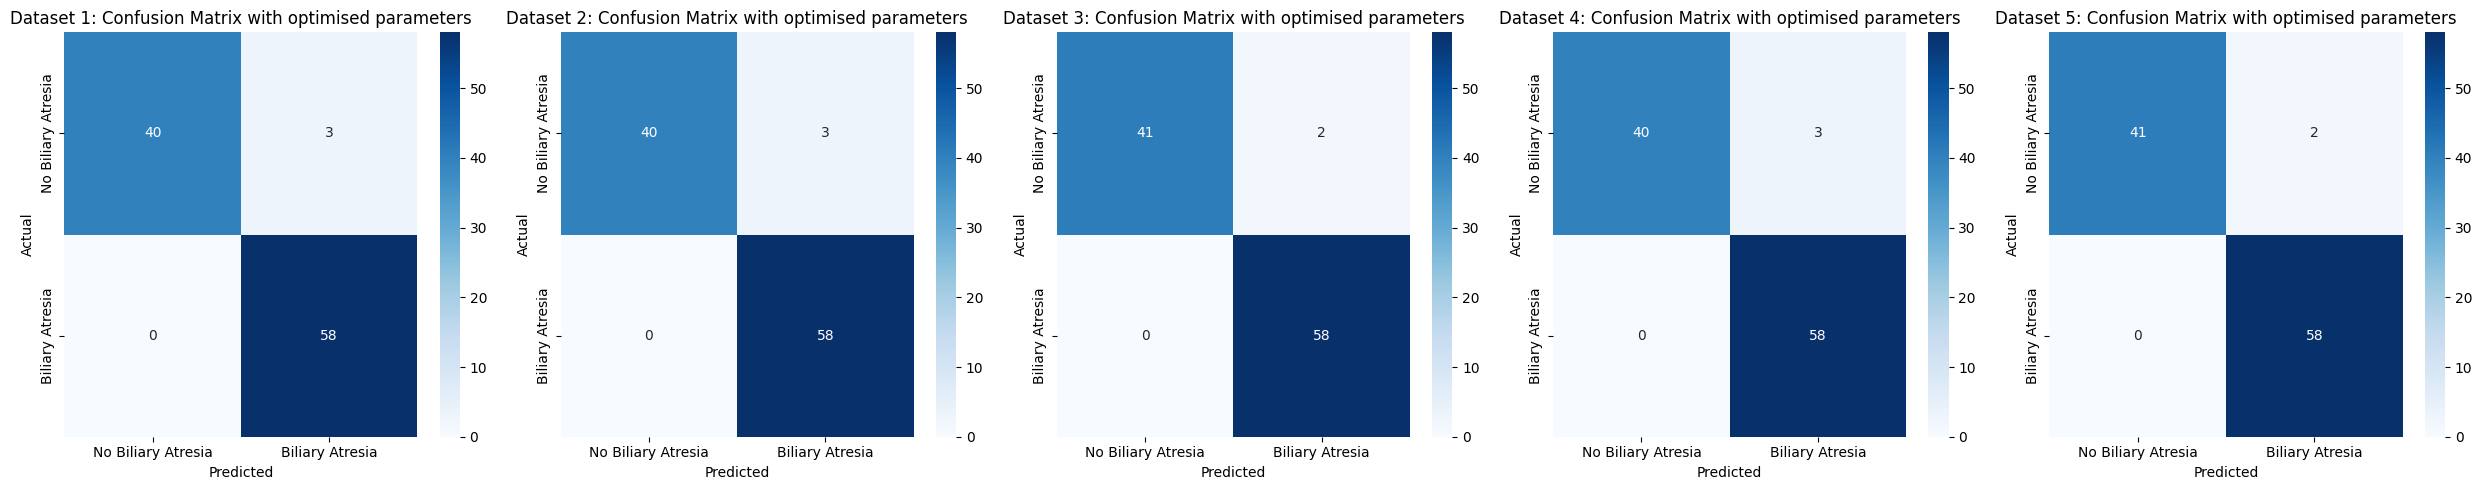

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
best_params = {
    'n_estimators': 50,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_depth': 20,
    'bootstrap': False
}

# Assuming imputed_datasets_encoded and best_params are properly defined

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_opt = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_opt = dataset['Has_Biliary_Atresia']

    X_train_MI_opt, X_test_MI_opt, y_train_MI_opt, y_test_MI_opt = train_test_split(X_Multiple_imputation_opt, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)



    rf_classifier_opt = RandomForestClassifier(**best_params, random_state=42)
    # Train the model with the best parameters
    rf_classifier_opt.fit(X_train_MI_opt, y_train_MI_opt)

    # d) Model evaluation
    y_pred_MI_opt = rf_classifier_opt.predict(X_test_MI_opt)

    accuracy_MI_opt = accuracy_score(y_test_MI_opt, y_pred_MI_opt)
    classification_rep_MI_opt = classification_report(y_test_MI_opt, y_pred_MI_opt)
    confusion_mat_MI_opt = confusion_matrix(y_test_MI_opt, y_pred_MI_opt)

    print(f"Dataset {i+1}: Accuracy with optimized parameters: {accuracy_MI_opt}")
    print(f"Dataset {i+1}: Classification Report with optimized parameters:")
    print(classification_rep_MI_opt)

    # Plotting confusion matrix
    sns.heatmap(confusion_mat_MI_opt, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
                yticklabels=['No Biliary Atresia', 'Biliary Atresia'], ax=axes[i])
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')
    axes[i].set_title(f'Dataset {i+1}: Confusion Matrix with optimised parameters')

plt.tight_layout()
plt.show()


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

best_params = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}

# Loop through each imputed dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_opt = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_opt = dataset['Has_Biliary_Atresia']

    X_train_MI_opt, X_test_MI_opt, y_train_MI_opt, y_test_MI_opt = train_test_split(X_Multiple_imputation_opt, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)

    # c) Initializing random forest model with the best parameters
    rf_classifier_opt = RandomForestClassifier(**best_params, random_state=42)

    # Train the model with the best parameters
    rf_classifier_opt.fit(X_train_MI_opt, y_train_MI_opt)

    # d) Model evaluation
    y_pred_MI_opt = rf_classifier_opt.predict(X_test_MI_opt)

    accuracy_MI_opt = accuracy_score(y_test_MI_opt, y_pred_MI_opt)
    classification_rep_MI_opt = classification_report(y_test_MI_opt, y_pred_MI_opt)
    confusion_mat_MI_opt = confusion_matrix(y_test_MI_opt, y_pred_MI_opt)


    print(f"Dataset {i+1}: Confusion Matrix with optimized parameters:")
    print(confusion_mat_MI_opt)



Dataset 1: Confusion Matrix with optimized parameters:
[[40  3]
 [ 0 58]]
Dataset 2: Confusion Matrix with optimized parameters:
[[40  3]
 [ 0 58]]
Dataset 3: Confusion Matrix with optimized parameters:
[[41  2]
 [ 0 58]]
Dataset 4: Confusion Matrix with optimized parameters:
[[40  3]
 [ 0 58]]
Dataset 5: Confusion Matrix with optimized parameters:
[[41  2]
 [ 0 58]]


In [31]:
from sklearn.metrics import precision_recall_fscore_support

# Stores the overall performance metrics for all datasets with optimized parameters
overall_metrics_opt = []

# Loop through each imputed dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_opt = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_opt = dataset['Has_Biliary_Atresia']

    X_train_MI_opt, X_test_MI_opt, y_train_MI_opt, y_test_MI_opt = train_test_split(X_Multiple_imputation_opt, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)

    # c) Initializing random forest model with the best parameters
    rf_classifier_opt = RandomForestClassifier(**best_params, random_state=42)

    # Train the model with the best parameters
    rf_classifier_opt.fit(X_train_MI_opt, y_train_MI_opt)

    # d) Model evaluation with optimized parameters
    y_pred_MI_opt = rf_classifier_opt.predict(X_test_MI_opt)

    # Get precision, recall, fscore with optimized parameters
    precision_opt, recall_opt, fscore_opt, _ = precision_recall_fscore_support(y_test_MI_opt, y_pred_MI_opt, average='weighted')

    # Storing metrics of the current dataset with optimized parameters
    overall_metrics_opt.append({
        'Dataset': i,
        'Accuracy': round(accuracy_score(y_test_MI_opt, y_pred_MI_opt), 4),
        'Precision': round(precision_opt, 4),
        'Recall': round(recall_opt, 4),
        'F1 Score': round(fscore_opt, 4)
    })

# Display overall metrics with optimized parameters
for metrics in overall_metrics_opt:
    print(f"Dataset {metrics['Dataset']} with optimized parameters:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")


Dataset 0 with optimized parameters:
  Accuracy: 0.9703
  Precision: 0.9718
  Recall: 0.9703
  F1 Score: 0.9701
Dataset 1 with optimized parameters:
  Accuracy: 0.9703
  Precision: 0.9718
  Recall: 0.9703
  F1 Score: 0.9701
Dataset 2 with optimized parameters:
  Accuracy: 0.9802
  Precision: 0.9809
  Recall: 0.9802
  F1 Score: 0.9801
Dataset 3 with optimized parameters:
  Accuracy: 0.9703
  Precision: 0.9718
  Recall: 0.9703
  F1 Score: 0.9701
Dataset 4 with optimized parameters:
  Accuracy: 0.9802
  Precision: 0.9809
  Recall: 0.9802
  F1 Score: 0.9801


Pooling


In [32]:
import numpy as np

M = len(imputed_datasets_encoded)

accuracies = [metrics['Accuracy'] for metrics in overall_metrics_opt]
precisions = [metrics['Precision'] for metrics in overall_metrics_opt]
recalls = [metrics['Recall'] for metrics in overall_metrics_opt]
f1_scores = [metrics['F1 Score'] for metrics in overall_metrics_opt]

mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)


variance_accuracy = np.var(accuracies) + (1 + 1/M) * (mean_accuracy - np.mean(accuracies))**2
variance_precision = np.var(precisions) + (1 + 1/M) * (mean_precision - np.mean(precisions))**2
variance_recall = np.var(recalls) + (1 + 1/M) * (mean_recall - np.mean(recalls))**2
variance_f1_score = np.var(f1_scores) + (1 + 1/M) * (mean_f1_score - np.mean(f1_scores))**2


print(f"Pooled Accuracy: {mean_accuracy} ± {np.sqrt(variance_accuracy)}")
print(f"Pooled Precision: {mean_precision} ± {np.sqrt(variance_precision)}")
print(f"Pooled Recall: {mean_recall} ± {np.sqrt(variance_recall)}")
print(f"Pooled F1 Score: {mean_f1_score} ± {np.sqrt(variance_f1_score)}")


Pooled Accuracy: 0.9742599999999999 ± 0.004849989690710648
Pooled Precision: 0.9754400000000001 ± 0.0044580713318653825
Pooled Recall: 0.9742599999999999 ± 0.004849989690710648
Pooled F1 Score: 0.9741 ± 0.00489897948556636


Feature Importance

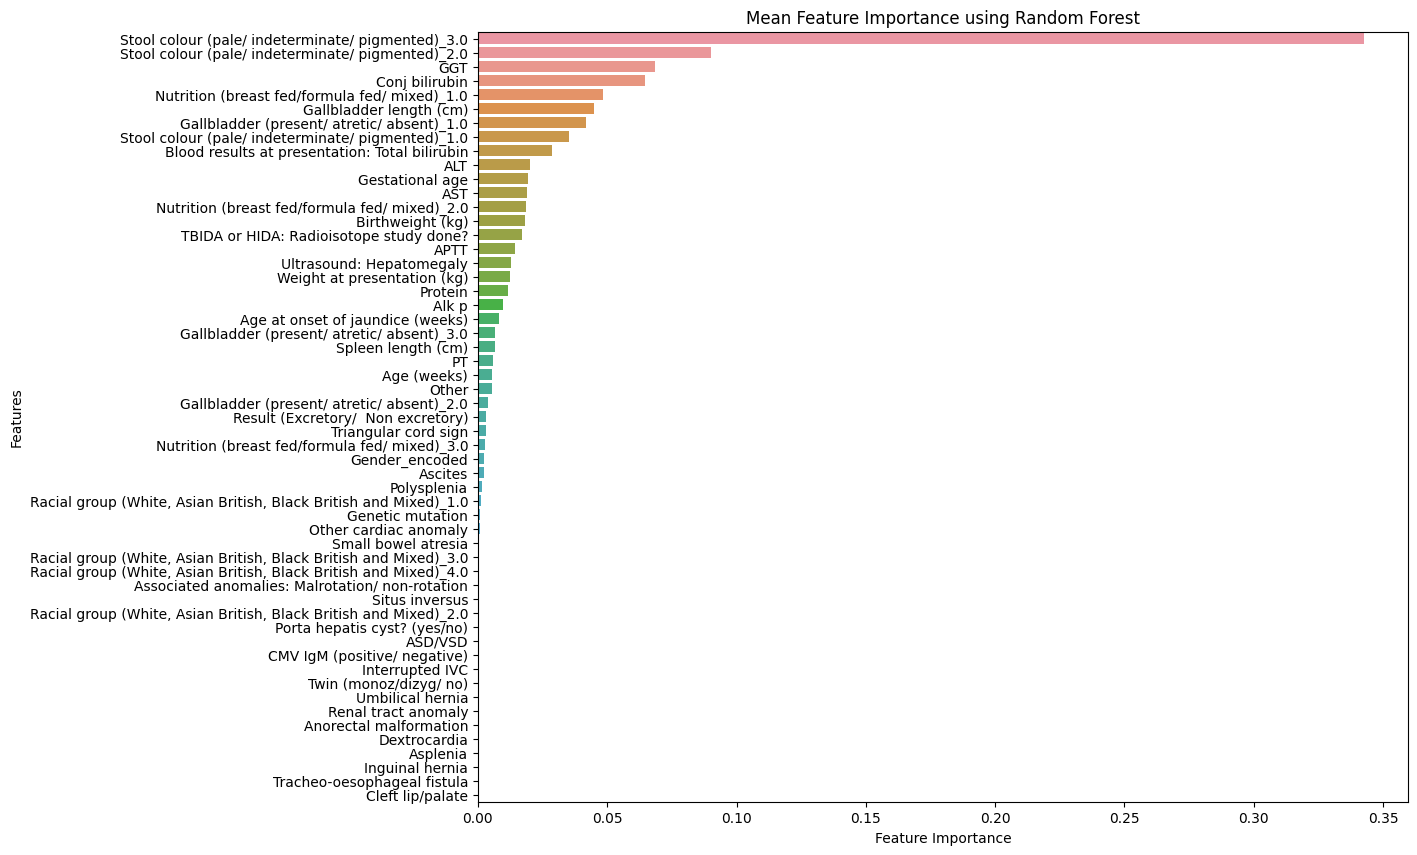

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


feature_importances = []

# Loop through each imputed dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_opt = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_opt = dataset['Has_Biliary_Atresia']

    # Splitting the data into training and testing sets
    X_train_MI_opt, X_test_MI_opt, y_train_MI_opt, y_test_MI_opt = train_test_split(X_Multiple_imputation_opt, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)

    # c) Initializing random forest model with the best parameters
    rf_classifier_opt = RandomForestClassifier(**best_params, random_state=42)

    # Train the model with the best parameters
    rf_classifier_opt.fit(X_train_MI_opt, y_train_MI_opt)

    # Get feature importances and store them
    feature_importances.append(rf_classifier_opt.feature_importances_)

# Calculating the mean feature importance
mean_feature_importance = np.mean(feature_importances, axis=0)

# Getting the feature names
feature_names = X_Multiple_imputation_opt.columns

# Creating a series with feature importances and sorting it
importance_series = pd.Series(mean_feature_importance, index=feature_names)
sorted_importances = importance_series.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Mean Feature Importance using Random Forest")
plt.show()


Accuracy with reduced feature set: 0.9505
Classification Report with reduced feature set:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        43
         1.0       0.96      0.95      0.96        58

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101



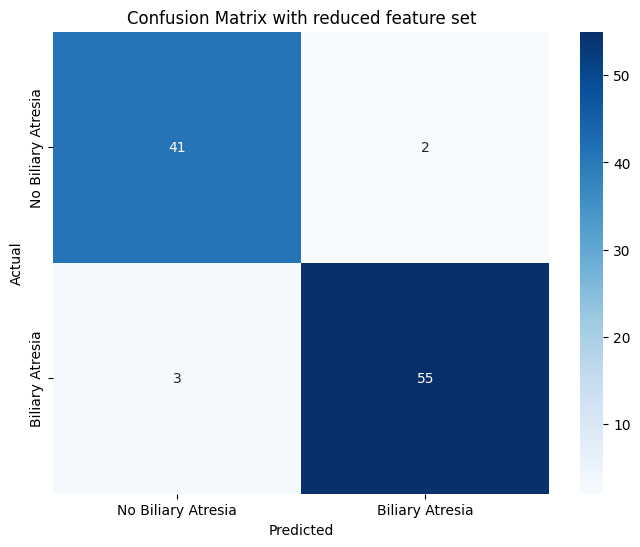

In [34]:
# Removing the most important feature
X_Multiple_imputation_opt_reduced = X_Multiple_imputation_opt.drop(sorted_importances.idxmax(), axis=1)

# Splitting the data into training and testing sets
X_train_MI_opt_reduced, X_test_MI_opt_reduced, y_train_MI_opt_reduced, y_test_MI_opt_reduced = train_test_split(X_Multiple_imputation_opt_reduced, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)

# Initializing random forest model with the best parameters
rf_classifier_opt_reduced = RandomForestClassifier(**best_params, random_state=42)

# Training the model with the reduced feature set
rf_classifier_opt_reduced.fit(X_train_MI_opt_reduced, y_train_MI_opt_reduced)

# Predicting the test set results
y_pred_opt_reduced = rf_classifier_opt_reduced.predict(X_test_MI_opt_reduced)

# Getting the accuracy
accuracy_opt_reduced = accuracy_score(y_test_MI_opt_reduced, y_pred_opt_reduced)

# Getting the classification report
classification_rep_opt_reduced = classification_report(y_test_MI_opt_reduced, y_pred_opt_reduced)

# Getting the confusion matrix
confusion_mat_opt_reduced = confusion_matrix(y_test_MI_opt_reduced, y_pred_opt_reduced)

# Printing the results
print(f"Accuracy with reduced feature set: {accuracy_opt_reduced:.4f}")
print("Classification Report with reduced feature set:")
print(classification_rep_opt_reduced)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_opt_reduced, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
            yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with reduced feature set')
plt.show()


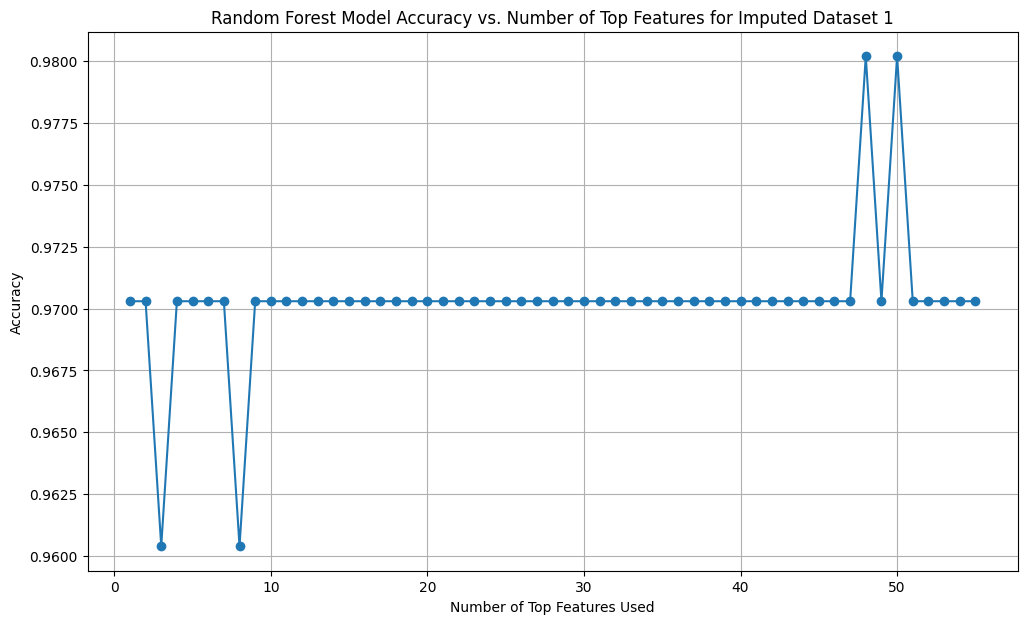

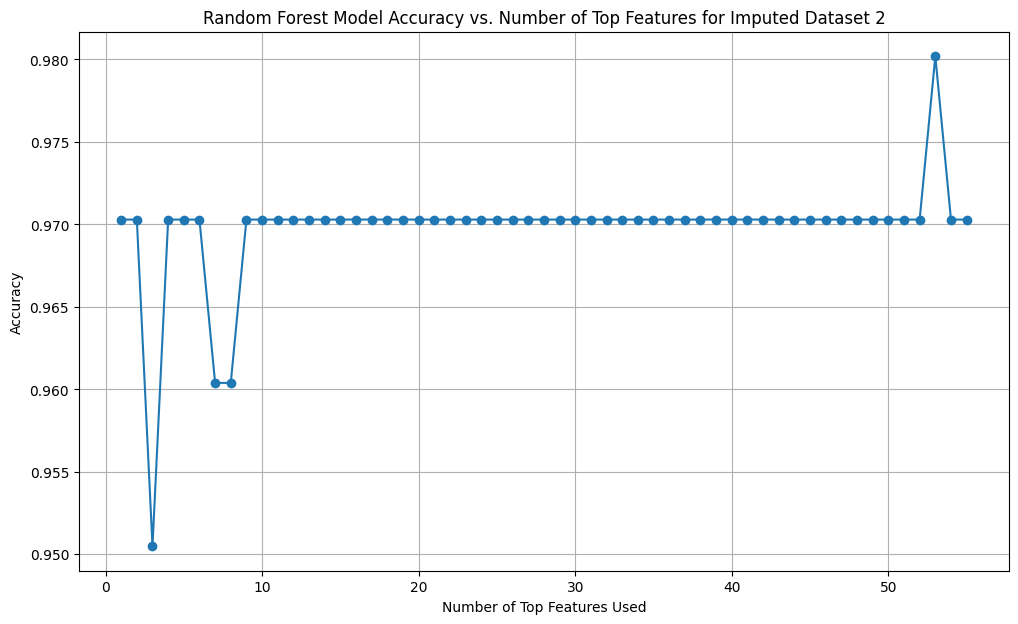

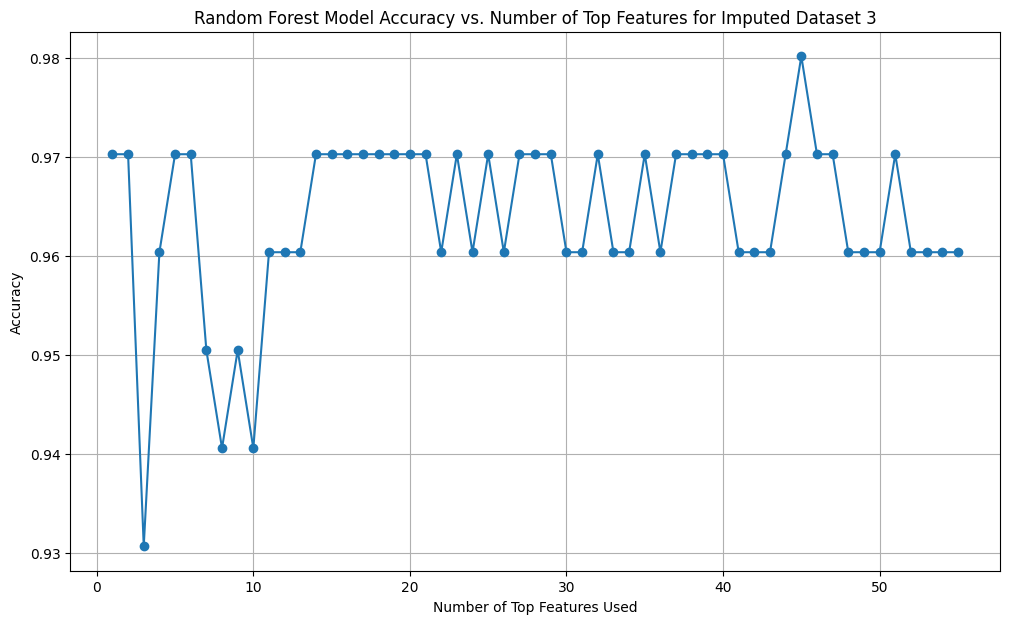

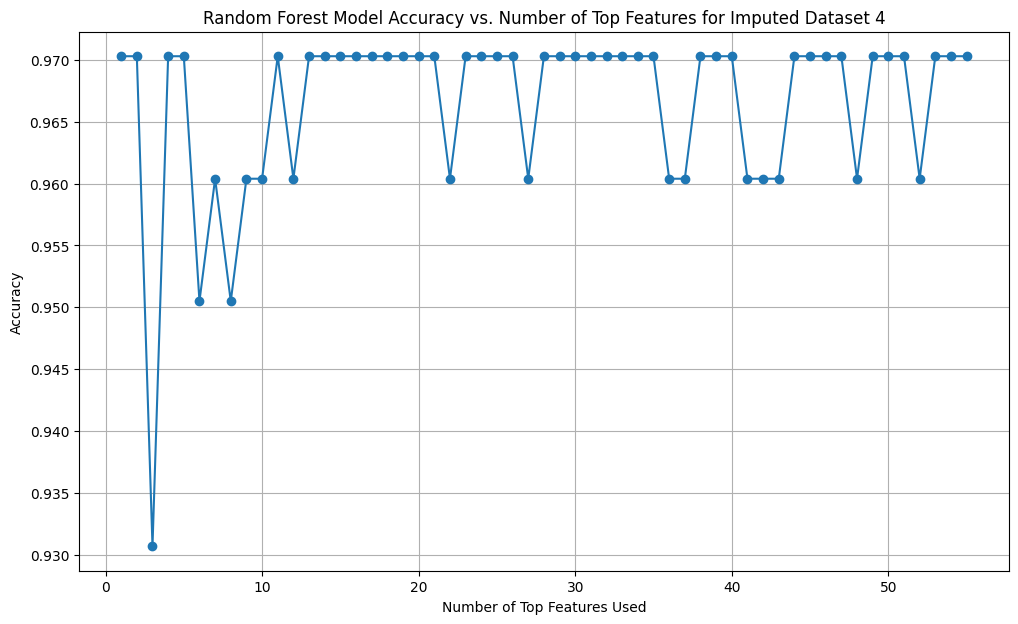

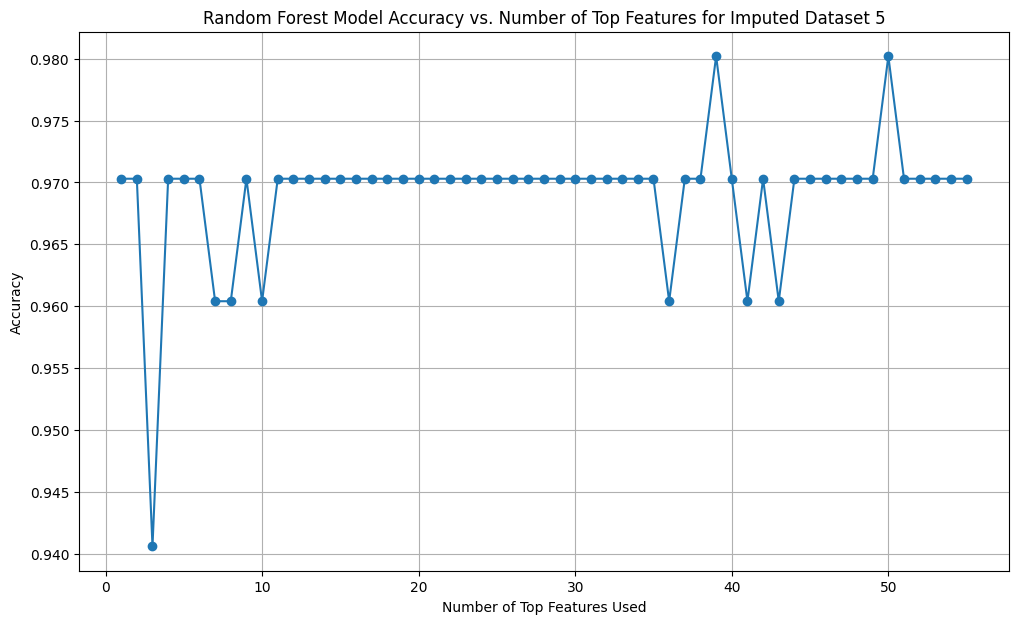

In [54]:
from sklearn.metrics import accuracy_score

# Determine the number of top features that result in the best accuracy for Random Forest

# Getting the sorted feature names
sorted_features = sorted_importances.index.tolist()

# Loop through each imputed dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    rf_accuracies = []

    # Splitting the data into training and testing sets
    X_Multiple_imputation_opt = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_opt = dataset['Has_Biliary_Atresia']
    X_train_MI_opt, X_test_MI_opt, y_train_MI_opt, y_test_MI_opt = train_test_split(X_Multiple_imputation_opt, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)

    # Loop over number of top features
    for top_n in range(1, len(sorted_features) + 1):

        # Select top N features
        features_n = sorted_features[:top_n]
        X_train_n = X_train_MI_opt[features_n]
        X_test_n = X_test_MI_opt[features_n]

        # Train Random Forest on N features
        rf_n = RandomForestClassifier(**best_params, random_state=42)
        rf_n.fit(X_train_n, y_train_MI_opt)

        # Predict and evaluate
        y_pred_n = rf_n.predict(X_test_n)
        accuracy_n = accuracy_score(y_test_MI_opt, y_pred_n)

        # Append accuracy
        rf_accuracies.append(accuracy_n)

    # Plotting
    plt.figure(figsize=(12, 7))
    plt.plot(range(1, len(sorted_features) + 1), rf_accuracies, marker='o', linestyle='-')
    plt.title(f'Random Forest Model Accuracy vs. Number of Top Features for Imputed Dataset {i+1}')
    plt.xlabel('Number of Top Features Used')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


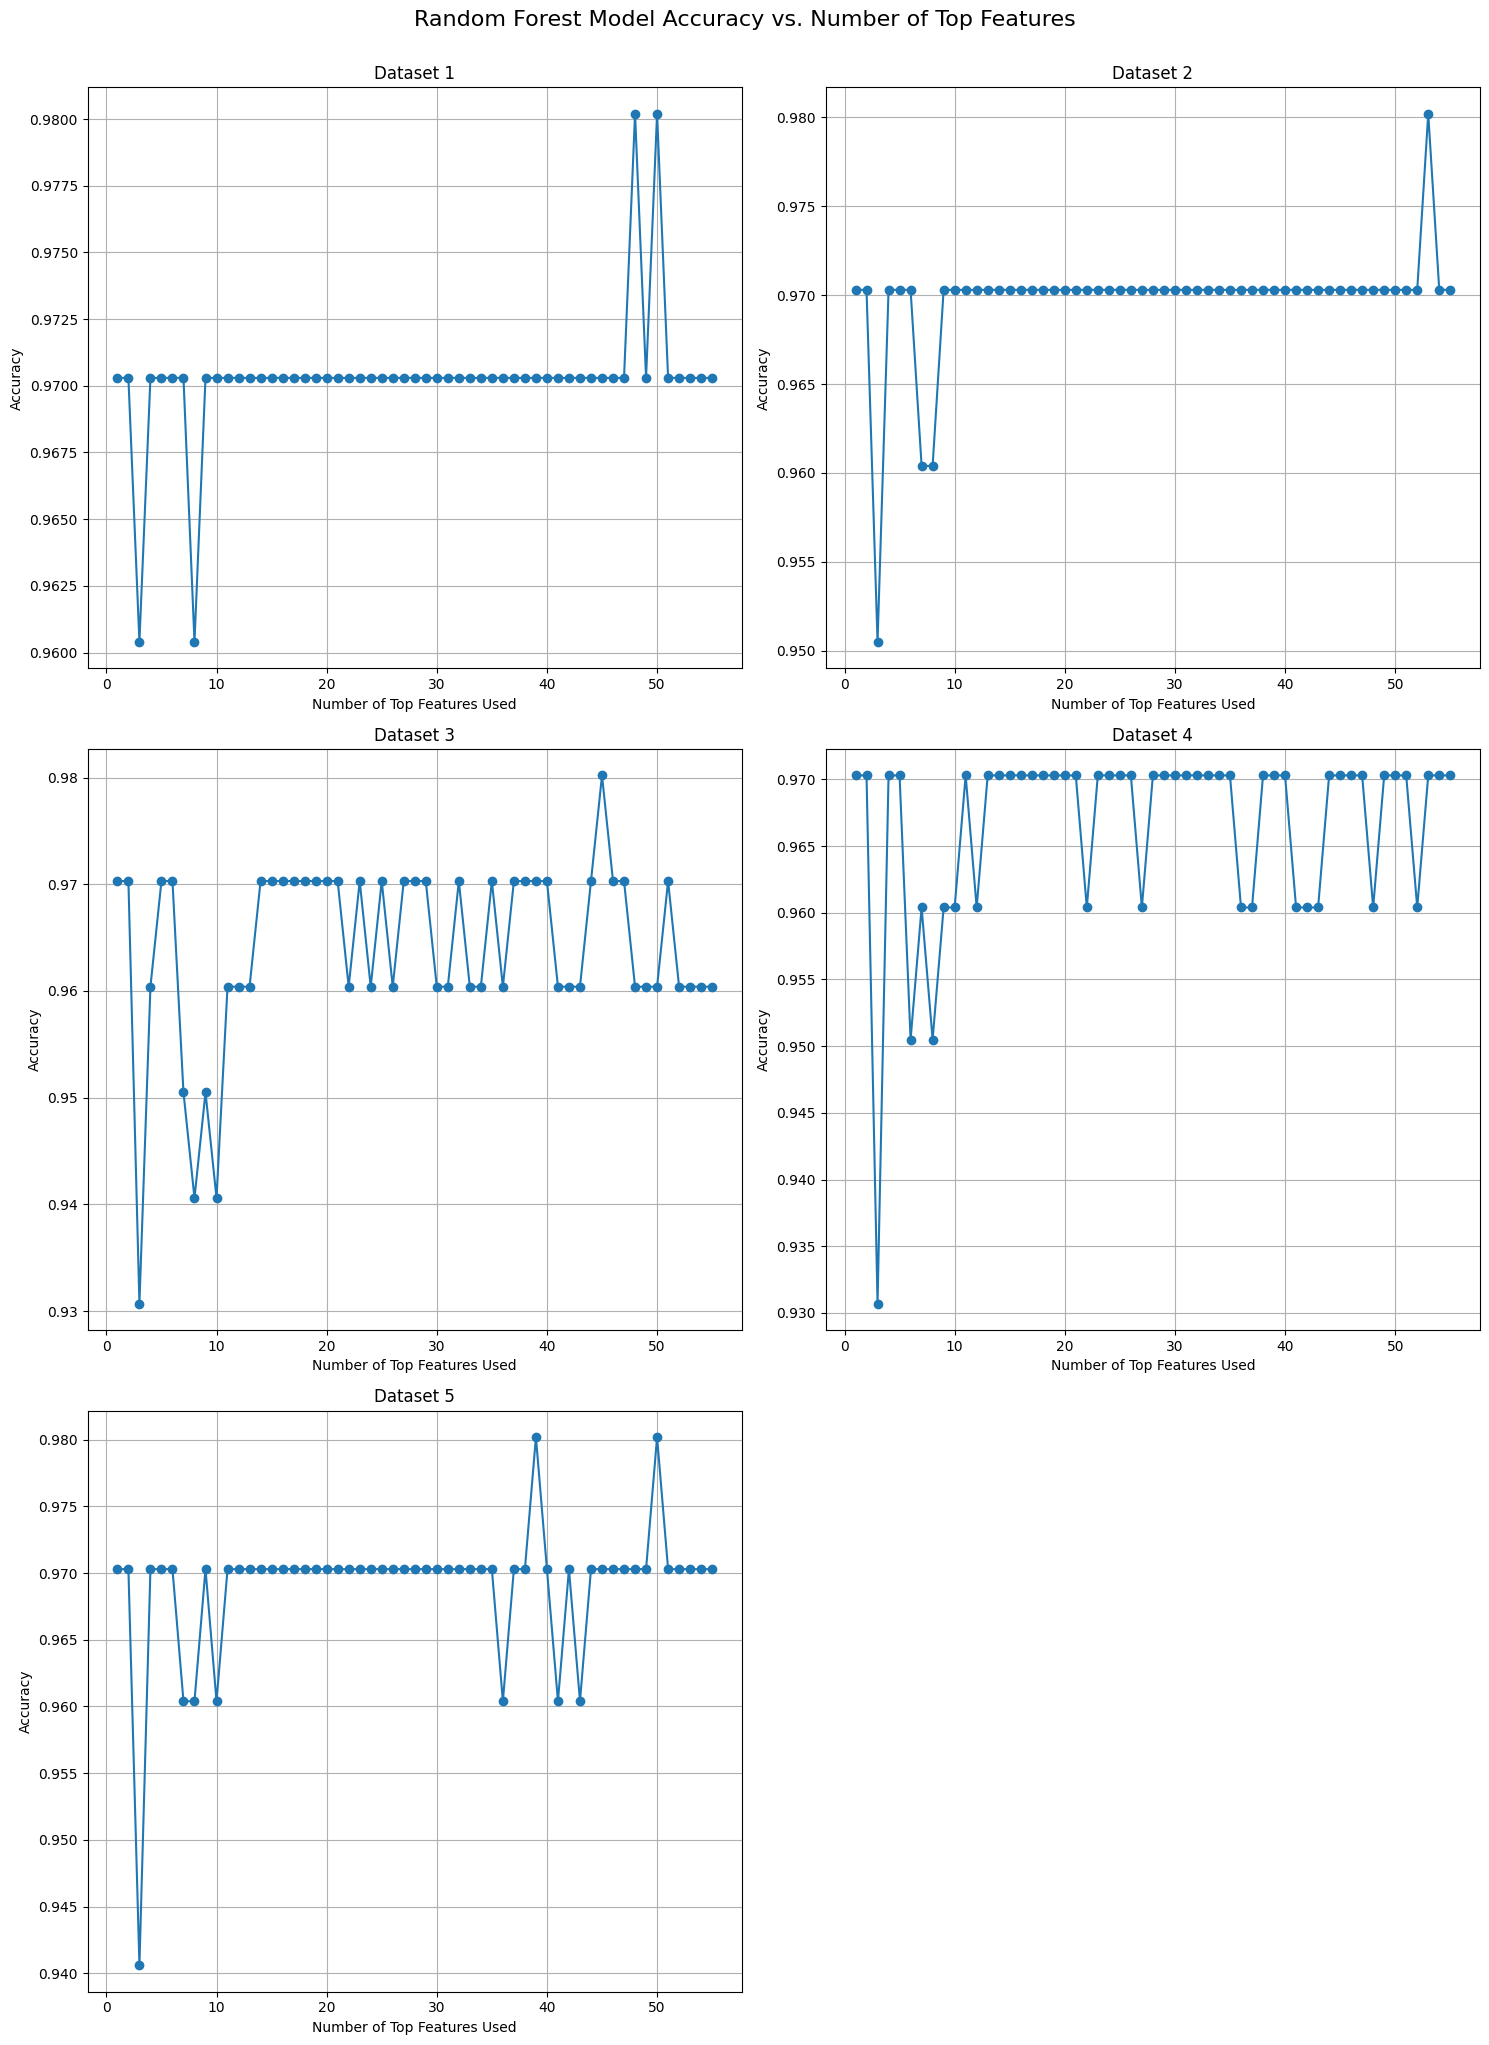

In [59]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.ravel()
# Loop through each imputed dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    rf_accuracies = []

    # Splitting the data into training and testing sets
    X_Multiple_imputation_opt = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_opt = dataset['Has_Biliary_Atresia']
    X_train_MI_opt, X_test_MI_opt, y_train_MI_opt, y_test_MI_opt = train_test_split(X_Multiple_imputation_opt, Y_Multiple_imputation_opt, test_size=0.2, random_state=42)

    # Loop over number of top features
    for top_n in range(1, len(sorted_features) + 1):

        # Select top N features
        features_n = sorted_features[:top_n]
        X_train_n = X_train_MI_opt[features_n]
        X_test_n = X_test_MI_opt[features_n]

        # Train Random Forest on N features
        rf_n = RandomForestClassifier(**best_params, random_state=42)
        rf_n.fit(X_train_n, y_train_MI_opt)

        # Predict and evaluate
        y_pred_n = rf_n.predict(X_test_n)
        accuracy_n = accuracy_score(y_test_MI_opt, y_pred_n)

        # Append accuracy
        rf_accuracies.append(accuracy_n)

    # Plotting in individual subplot
    axes[i].plot(range(1, len(sorted_features) + 1), rf_accuracies, marker='o', linestyle='-')
    axes[i].set_title(f'Dataset {i+1}')
    axes[i].set_xlabel('Number of Top Features Used')
    axes[i].set_ylabel('Accuracy')
    axes[i].grid(True)

# Remove the extra subplot if number of datasets is odd
if len(imputed_datasets_encoded) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()  # Adjusts subplot params for neat layout
plt.suptitle('Random Forest Model Accuracy vs. Number of Top Features', y=1.02, fontsize=16)
plt.show()


 learning curve

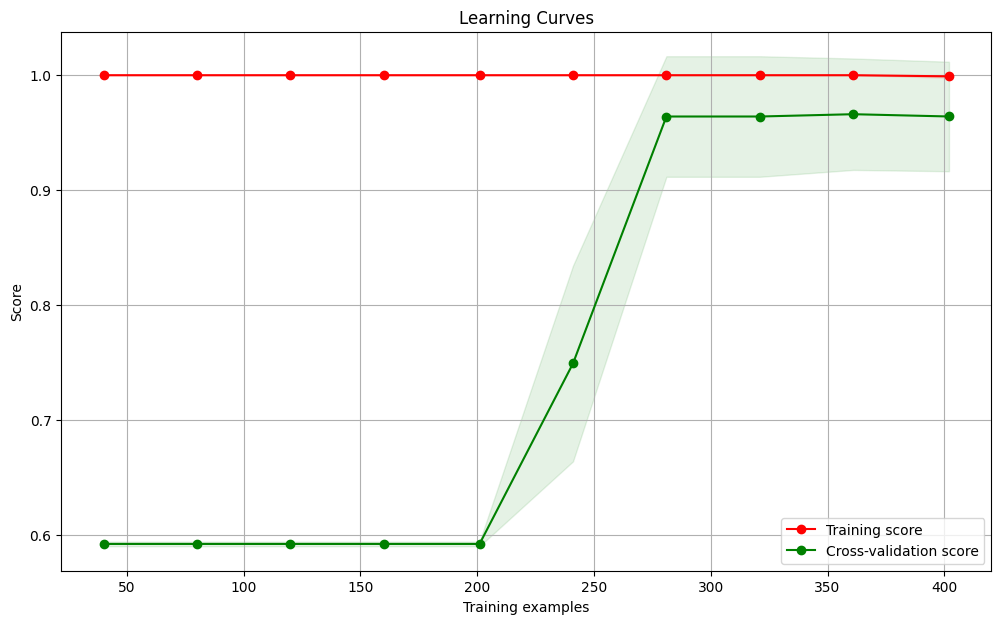

In [36]:
from sklearn.model_selection import learning_curve


X = X_Multiple_imputation_opt
y = Y_Multiple_imputation_opt


train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestClassifier(**best_params, random_state=42), X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


plt.figure(figsize=(12, 7))


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")

plt.grid(True)
plt.show()


In [37]:
#old, single interpolation

# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # a) Splitting the data into training and testing sets
# X_2 = encoded_data2.drop("Has_Biliary_Atresia", axis=1)
# y_2 = encoded_data2["Has_Biliary_Atresia"]
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=42)


In [38]:
# # b) Perform k-fold cross-validation (k=5) on the training set
# rf_2 = RandomForestClassifier(random_state=42)
# cv_scores_2 = cross_val_score(rf_2, X_train_2, y_train_2, cv=5)

# print(cv_scores_2)

In [39]:

# # c) Adjusting hyperparameters using the results of cross-validation
# param_grid_2 = {
#     'n_estimators': [10, 25, 50, 100, ],
#     'max_depth': [ 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 3, 4]
# }

# grid_search_2 = GridSearchCV(estimator=rf_2, param_grid=param_grid_2,
#                            cv=5, n_jobs=-1, verbose=2)

# grid_search_2.fit(X_train_2, y_train_2)

# # Best hyperparameters
# best_params_2 = grid_search_2.best_params_
# print(best_params_2)


In [40]:
# # d) Evaluating the performance on the test set using the best hyperparameters
# best_params_2 = {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}

# # 使用最佳超参数训练随机森林模型
# best_rf_2 = RandomForestClassifier(**best_params_2, random_state=42)
# best_rf_2.fit(X_train_2, y_train_2)
# y_pred_2 = best_rf_2.predict(X_test_2)

# # Metrics
# accuracy_2 = accuracy_score(y_test_2, y_pred_2)
# classification_rep_2 = classification_report(y_test_2, y_pred_2)
# confusion_mat_2 = confusion_matrix(y_test_2, y_pred_2)

# # Plotting confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_mat_2, annot=True, fmt="d", cmap="Blues",
#             xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
#             yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()

# print(accuracy_2, classification_rep_2)

In [41]:
# # Convert the classification report to a dataframe for better visualization
# report_dict_2 = classification_report(y_test_2, y_pred_2, output_dict=True)
# report_df_2 = pd.DataFrame(report_dict_2).transpose()
# print(report_df_2)

In [42]:
# # Train a random forest classifier using the best hyperparameters found earlier
# rf_classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)
# rf_classifier.fit(X_train_2, y_train_2)

# # Extract feature importances
# feature_importances = rf_classifier.feature_importances_

# # Sort features and their importance values
# sorted_indices = feature_importances.argsort()[::-1]
# sorted_features = X_train_2.columns[sorted_indices]
# sorted_importances = feature_importances[sorted_indices]

# # Plotting feature importances
# plt.figure(figsize=(12, 10))
# sns.barplot(x=sorted_importances, y=sorted_features)
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("Feature Importance using Random Forest")
# plt.show()


In [43]:
# # Determine the number of top features that result in the best accuracy for Random Forest
# rf_accuracies = []

# # Loop over number of top features
# for top_n in range(1, len(sorted_features) + 1):
#     # Select top N features
#     features_n = sorted_features[:top_n]
#     X_train_n = X_train_2[features_n]
#     X_test_n = X_test_2[features_n]

#     # Train Random Forest on N features
#     rf_n = RandomForestClassifier(**best_params_2, random_state=42)
#     rf_n.fit(X_train_n, y_train_2)

#     # Predict and evaluate
#     y_pred_n = rf_n.predict(X_test_n)
#     accuracy_n = accuracy_score(y_test_2, y_pred_n)

#     # Append accuracy
#     rf_accuracies.append(accuracy_n)

# # Plotting
# plt.figure(figsize=(12, 7))
# plt.plot(range(1, len(sorted_features) + 1), rf_accuracies, marker='o', linestyle='-')
# plt.title('Random Forest Model Accuracy vs. Number of Top Features')
# plt.xlabel('Number of Top Features Used')
# plt.ylabel('Accuracy')
# plt.grid(True)
# plt.show()


In [44]:
# # Assuming you've already trained the Random Forest model and extracted the feature importances as you've mentioned

# # Determine the number of top features that result in the best accuracy for Random Forest
# rf_accuracies_updated = []

# # Loop over number of top features
# for top_n in range(1, len(sorted_features) + 1):
#     # Select top N features
#     features_n = sorted_features[:top_n]
#     X_train_n = X_train_2[features_n]
#     X_test_n = X_test_2[features_n]

#     # Train Random Forest on N features
#     rf_n_updated = RandomForestClassifier(**best_params_2, random_state=42)
#     rf_n_updated.fit(X_train_n, y_train_2)

#     # Predict and evaluate
#     y_pred_n_updated = rf_n_updated.predict(X_test_n)
#     accuracy_n_updated = accuracy_score(y_test_2, y_pred_n_updated)

#     # Append accuracy
#     rf_accuracies_updated.append(accuracy_n_updated)

# # Determine the number of features that gives the highest accuracy
# best_num_features_updated = rf_accuracies_updated.index(max(rf_accuracies_updated)) + 1


# best_num_features_updated


In [45]:
# # Selecting top 34 features
# # Assuming you've already trained the Random Forest model as "rf_classifier"
# feature_importances_updated = rf_classifier.feature_importances_

# # Sort features and their importance values
# sorted_indices_updated = feature_importances_updated.argsort()[::-1]
# sorted_features_updated = X_train_2.columns[sorted_indices_updated]

# top_features_34 = sorted_features_updated[:34]
# X_train_34 = X_train_2[top_features_34]
# X_test_34 = X_test_2[top_features_34]

# # d) Evaluating the performance on the test set using the best hyperparameters
# best_rf_34 = RandomForestClassifier(**best_params_2, random_state=42)
# best_rf_34.fit(X_train_34, y_train_2)
# y_pred_34 = best_rf_34.predict(X_test_34)

# # Metrics
# accuracy_34 = accuracy_score(y_test_2, y_pred_34)
# classification_rep_34 = classification_report(y_test_2, y_pred_34)
# confusion_mat_34 = confusion_matrix(y_test_2, y_pred_34)

# # Plotting confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_mat_34, annot=True, fmt="d", cmap="Blues",
#             xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
#             yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix for Top 34 Features')
# plt.show()

# print(accuracy_34, classification_rep_34)


In [46]:
# # Plotting the learning curve for the Random Forest model trained on top 34 features
# plot_learning_curve(best_rf_34, "Random Forest Learning Curve with Top 34 Features", X_train_34, y_train_2, cv=5)
# plt.show()


In [47]:
# from sklearn.model_selection import learning_curve
# import numpy as np

# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt

# # Example usage:
# plot_learning_curve(best_rf_2, "Random Forest Learning Curve", X_train_2, y_train_2, cv=5)
# plt.show()


In [48]:
# # Adjusting the validation curve plotting to use the top 34 features

# def plot_validation_curve_updated(parameter, parameter_range):
#     # If parameter is max_depth, replace None with np.inf for plotting
#     if parameter == "max_depth":
#         parameter_range = [np.inf if val is None else val for val in parameter_range]

#     train_scores, test_scores = validation_curve(
#         RandomForestClassifier(random_state=42),
#         X_train_34,  # Using the top 34 features
#         y_train_2,
#         param_name=parameter,
#         param_range=parameter_range,
#         cv=5,
#         scoring="accuracy",
#         n_jobs=-1
#     )

#     # Calculate mean and standard deviation for training set scores
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)

#     # Calculate mean and standard deviation for test set scores
#     test_mean = np.mean(test_scores, axis=1)
#     test_std = np.std(test_scores, axis=1)

#     plt.plot(parameter_range, train_mean, label="Training score", color="blue")
#     plt.plot(parameter_range, test_mean, label="Cross-validation score", color="green")

#     # Plot accuracies bands for training and test sets
#     plt.fill_between(parameter_range, train_mean - train_std, train_mean + train_std, color="lightblue")
#     plt.fill_between(parameter_range, test_mean - test_std, test_mean + test_std, color="lightgreen")

#     plt.title(f"Validation Curve with Random Forest ({parameter}) using Top 34 Features")
#     plt.xlabel(parameter)
#     plt.ylabel("Accuracy Score")
#     plt.tight_layout()
#     plt.legend(loc="best")
#     plt.show()

# # Plotting the validation curve for max_depth
# plot_validation_curve_updated("max_depth", max_depth_range_inf)

# # Plotting the validation curve for n_estimators
# plot_validation_curve_updated("n_estimators", n_estimators_range)


In [49]:
# from sklearn.model_selection import validation_curve

# # Define the range for the parameters
# max_depth_range = [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
# n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 150, 200]

# def plot_validation_curve(parameter, parameter_range):
#     # If parameter is max_depth, replace None with np.inf for plotting
#     if parameter == "max_depth":
#         parameter_range = [np.inf if val is None else val for val in parameter_range]

#     train_scores, test_scores = validation_curve(
#         RandomForestClassifier(random_state=42),
#         X_train_2,
#         y_train_2,
#         param_name=parameter,
#         param_range=parameter_range,
#         cv=5,
#         scoring="accuracy",
#         n_jobs=-1
#     )

#     # Calculate mean and standard deviation for training set scores
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)

#     # Calculate mean and standard deviation for test set scores
#     test_mean = np.mean(test_scores, axis=1)
#     test_std = np.std(test_scores, axis=1)

#     plt.plot(parameter_range, train_mean, label="Training score", color="blue")
#     plt.plot(parameter_range, test_mean, label="Cross-validation score", color="green")

#     # Plot accuracies bands for training and test sets
#     plt.fill_between(parameter_range, train_mean - train_std, train_mean + train_std, color="lightblue")
#     plt.fill_between(parameter_range, test_mean - test_std, test_mean + test_std, color="lightgreen")

#     plt.title(f"Validation Curve with Random Forest ({parameter})")
#     plt.xlabel(parameter)
#     plt.ylabel("Accuracy Score")
#     plt.tight_layout()
#     plt.legend(loc="best")
#     plt.show()

# # Replace None with np.inf for plotting for max_depth
# max_depth_range_inf = [np.inf if val is None else val for val in max_depth_range]

# # Plot validation curve for max_depth
# plot_validation_curve("max_depth", max_depth_range_inf)

# # Plot validation curve for n_estimators
# plot_validation_curve("n_estimators", n_estimators_range)


In [50]:
# # Drop the specified features
# X_train_2_modified = X_train_2.drop(['Stool colour (pale/ indeterminate/ pigmented)_1.0',
#                                     'Stool colour (pale/ indeterminate/ pigmented)_2.0',
#                                     'Stool colour (pale/ indeterminate/ pigmented)_3.0'], axis=1)
# X_test_2_modified = X_test_2.drop(['Stool colour (pale/ indeterminate/ pigmented)_1.0',
#                                   'Stool colour (pale/ indeterminate/ pigmented)_2.0',
#                                   'Stool colour (pale/ indeterminate/ pigmented)_3.0'], axis=1)

# # Train a random forest classifier using the best hyperparameters found earlier but with modified features
# rf_classifier_modified = RandomForestClassifier(**best_params_2, random_state=42)
# rf_classifier_modified.fit(X_train_2_modified, y_train_2)

# # Predict and evaluate
# y_pred_2_modified = rf_classifier_modified.predict(X_test_2_modified)
# accuracy_2_modified = accuracy_score(y_test_2, y_pred_2_modified)
# classification_rep_2_modified = classification_report(y_test_2, y_pred_2_modified)
# confusion_mat_2_modified = confusion_matrix(y_test_2, y_pred_2_modified)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_mat_2_modified, annot=True, fmt="d", cmap="Blues",
#             xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
#             yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix for Random forest without Stool colour feature')
# plt.show()

# print(accuracy_2_modified, classification_rep_2_modified)


In [51]:
# # Extract feature importances from the modified random forest model
# feature_importances_modified = rf_classifier_modified.feature_importances_

# # Sort features and their importance values
# sorted_indices_modified = feature_importances_modified.argsort()[::-1]
# sorted_features_modified = X_train_2_modified.columns[sorted_indices_modified]
# sorted_importances_modified = feature_importances_modified[sorted_indices_modified]

# # Plotting feature importances
# plt.figure(figsize=(12, 10))
# sns.barplot(x=sorted_importances_modified, y=sorted_features_modified)
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("Feature Importance using Random Forest (without stool colour)")
# plt.show()


# **SVM**

Dataset 0: SVM cross-validation scores: [0.95061728 0.98765432 0.9625     0.9625     0.95      ]
Dataset 0: Accuracy with SVM: 0.9604
Dataset 0: Classification Report with SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.95      0.98      0.97        58

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



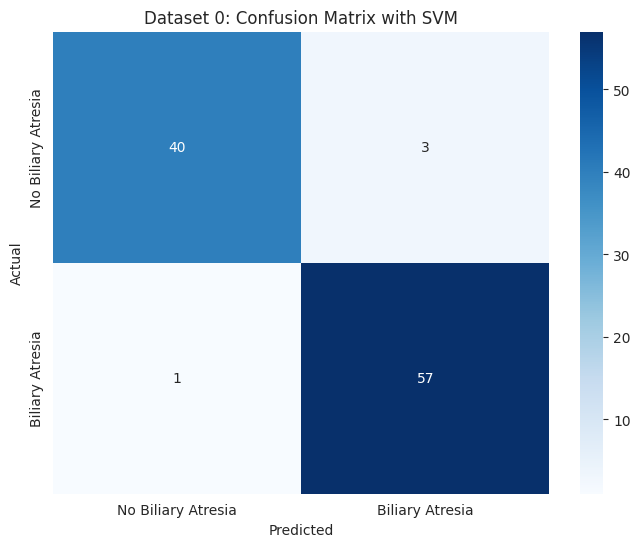

Dataset 1: SVM cross-validation scores: [0.95061728 0.98765432 0.975      0.9625     0.95      ]
Dataset 1: Accuracy with SVM: 0.9604
Dataset 1: Classification Report with SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.95      0.98      0.97        58

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



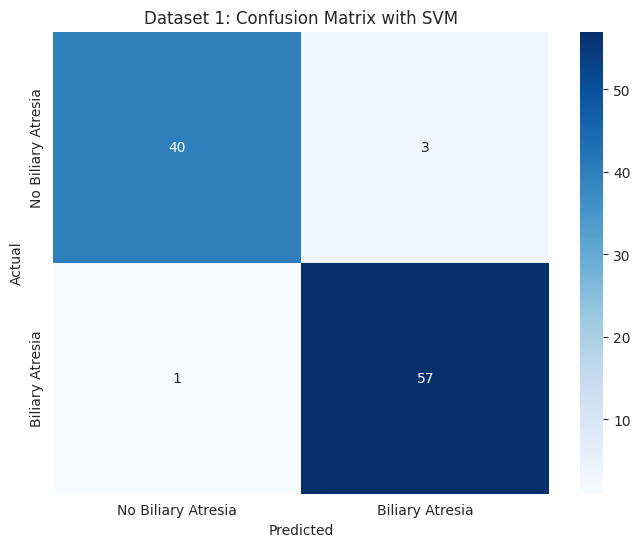

Dataset 2: SVM cross-validation scores: [0.95061728 0.98765432 0.975      0.9625     0.9625    ]
Dataset 2: Accuracy with SVM: 0.9604
Dataset 2: Classification Report with SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.95      0.98      0.97        58

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



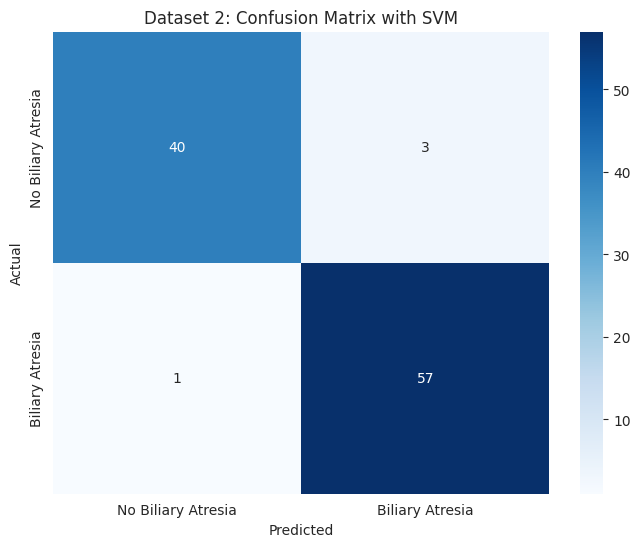

Dataset 3: SVM cross-validation scores: [0.95061728 0.97530864 0.975      0.9625     0.9625    ]
Dataset 3: Accuracy with SVM: 0.9703
Dataset 3: Classification Report with SVM:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



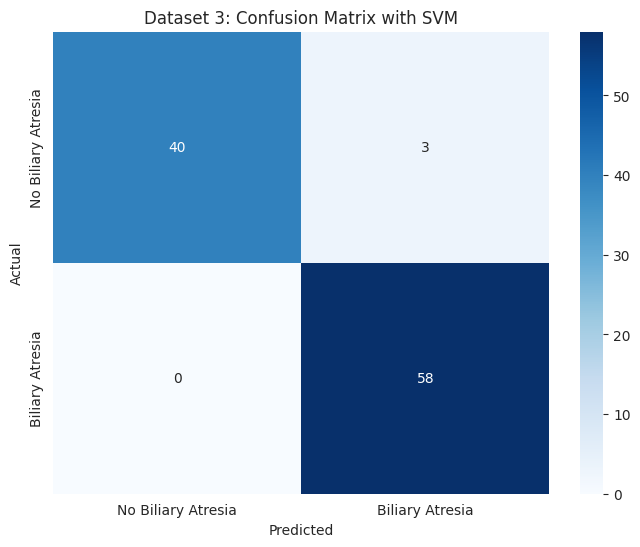

Dataset 4: SVM cross-validation scores: [0.95061728 0.98765432 0.975      0.9625     0.95      ]
Dataset 4: Accuracy with SVM: 0.9703
Dataset 4: Classification Report with SVM:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.95      1.00      0.97        58

    accuracy                           0.97       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



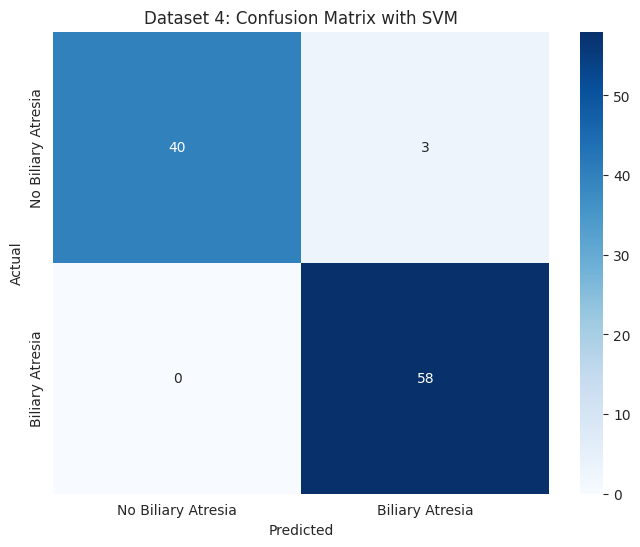

In [137]:
#new

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each imputed and encoded dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_SVM = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_SVM = dataset['Has_Biliary_Atresia']

    X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_Multiple_imputation_SVM, Y_Multiple_imputation_SVM, test_size=0.2, random_state=42)

    # b) Perform k-fold cross-validation (k=5) on the training set
    svm_classifier = SVC(random_state=42)
    cv_scores_SVM = cross_val_score(svm_classifier, X_train_SVM, y_train_SVM, cv=5)
    print(f"Dataset {i}: SVM cross-validation scores: {cv_scores_SVM}")

    # c) Initializing SVM model with initial parameters
    svm_classifier.fit(X_train_SVM, y_train_SVM)

    # d) Model evaluation with initial parameters
    y_pred_SVM = svm_classifier.predict(X_test_SVM)

    accuracy_SVM = accuracy_score(y_test_SVM, y_pred_SVM)
    classification_rep_SVM = classification_report(y_test_SVM, y_pred_SVM)
    confusion_mat_SVM = confusion_matrix(y_test_SVM, y_pred_SVM)

    print(f"Dataset {i}: Accuracy with SVM: {accuracy_SVM:.4f}")
    print(f"Dataset {i}: Classification Report with SVM:")
    print(classification_rep_SVM)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat_SVM, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
                yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Dataset {i}: Confusion Matrix with SVM')
    plt.show()


In [138]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Stores the overall performance metrics for all datasets with SVM parameters
overall_metrics_SVM = []

# Loop through each imputed and encoded dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_SVM = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_SVM = dataset['Has_Biliary_Atresia']

    X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_Multiple_imputation_SVM, Y_Multiple_imputation_SVM, test_size=0.2, random_state=42)

    # c) Initializing SVM model with initial parameters
    svm_classifier = SVC(random_state=42)
    svm_classifier.fit(X_train_SVM, y_train_SVM)

    # d) Model evaluation with initial parameters
    y_pred_SVM = svm_classifier.predict(X_test_SVM)

    # Get precision, recall, fscore with SVM parameters
    precision_SVM, recall_SVM, fscore_SVM, _ = precision_recall_fscore_support(y_test_SVM, y_pred_SVM, average='weighted')

    # Storing metrics of the current dataset with SVM parameters
    overall_metrics_SVM.append({
        'Dataset': i,
        'Accuracy': round(accuracy_score(y_test_SVM, y_pred_SVM), 4),
        'Precision': round(precision_SVM, 4),
        'Recall': round(recall_SVM, 4),
        'F1 Score': round(fscore_SVM, 4)
    })

# Display overall metrics with SVM parameters
for metrics in overall_metrics_SVM:
    print(f"Dataset {metrics['Dataset']} with SVM parameters:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")


Dataset 0 with SVM parameters:
  Accuracy: 0.9604
  Precision: 0.9609
  Recall: 0.9604
  F1 Score: 0.9603
Dataset 1 with SVM parameters:
  Accuracy: 0.9604
  Precision: 0.9609
  Recall: 0.9604
  F1 Score: 0.9603
Dataset 2 with SVM parameters:
  Accuracy: 0.9604
  Precision: 0.9609
  Recall: 0.9604
  F1 Score: 0.9603
Dataset 3 with SVM parameters:
  Accuracy: 0.9703
  Precision: 0.9718
  Recall: 0.9703
  F1 Score: 0.9701
Dataset 4 with SVM parameters:
  Accuracy: 0.9703
  Precision: 0.9718
  Recall: 0.9703
  F1 Score: 0.9701


In [139]:
import numpy as np


M = len(imputed_datasets_encoded)

accuracies_SVM = [metrics['Accuracy'] for metrics in overall_metrics_SVM]
precisions_SVM = [metrics['Precision'] for metrics in overall_metrics_SVM]
recalls_SVM = [metrics['Recall'] for metrics in overall_metrics_SVM]
f1_scores_SVM = [metrics['F1 Score'] for metrics in overall_metrics_SVM]


mean_accuracy_SVM = np.mean(accuracies_SVM)
mean_precision_SVM = np.mean(precisions_SVM)
mean_recall_SVM = np.mean(recalls_SVM)
mean_f1_score_SVM = np.mean(f1_scores_SVM)


variance_accuracy_SVM = np.var(accuracies_SVM) + (1 + 1/M) * (mean_accuracy_SVM - np.mean(accuracies_SVM))**2
variance_precision_SVM = np.var(precisions_SVM) + (1 + 1/M) * (mean_precision_SVM - np.mean(precisions_SVM))**2
variance_recall_SVM = np.var(recalls_SVM) + (1 + 1/M) * (mean_recall_SVM - np.mean(recalls_SVM))**2
variance_f1_score_SVM = np.var(f1_scores_SVM) + (1 + 1/M) * (mean_f1_score_SVM - np.mean(f1_scores_SVM))**2


print(f"Pooled Accuracy (SVM): {mean_accuracy_SVM} ± {np.sqrt(variance_accuracy_SVM)}")
print(f"Pooled Precision (SVM): {mean_precision_SVM} ± {np.sqrt(variance_precision_SVM)}")
print(f"Pooled Recall (SVM): {mean_recall_SVM} ± {np.sqrt(variance_recall_SVM)}")
print(f"Pooled F1 Score (SVM): {mean_f1_score_SVM} ± {np.sqrt(variance_f1_score_SVM)}")


Pooled Accuracy (SVM): 0.9643600000000001 ± 0.004849989690710702
Pooled Precision (SVM): 0.96526 ± 0.0053398876392673385
Pooled Recall (SVM): 0.9643600000000001 ± 0.004849989690710702
Pooled F1 Score (SVM): 0.9642199999999999 ± 0.004800999895854989


**random research for SVM**

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score


param_dist = {
    'C': [0.1, 1, ],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}


svm_classifier = SVC(random_state=42)


random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, scoring=make_scorer(f1_score, average='weighted'), cv=5, random_state=42)

for i, dataset in enumerate(imputed_datasets_encoded):
    X = dataset.drop('Has_Biliary_Atresia', axis=1)
    y = dataset['Has_Biliary_Atresia']


    random_search.fit(X, y)


print(f"Best parameters for dataset {0}: {random_search.best_params_}")
print(f"Best cross-validation score for dataset {0}: {random_search.best_score_:.4f}")


Best parameters for dataset 0: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best cross-validation score for dataset 0: 0.9556


In [27]:
# Stores the overall performance metrics for all datasets with the Best SVM parameters
overall_metrics_SVM_specified = []

# Loop through each imputed and encoded dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_SVM = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_SVM = dataset['Has_Biliary_Atresia']

    X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_Multiple_imputation_SVM, Y_Multiple_imputation_SVM, test_size=0.2, random_state=42)

    # c) Initializing SVM model with specified parameters
    svm_classifier_specified = SVC(C=1, gamma='scale', kernel='linear', random_state=42)
    svm_classifier_specified.fit(X_train_SVM, y_train_SVM)

    # d) Model evaluation with specified parameters
    y_pred_SVM_specified = svm_classifier_specified.predict(X_test_SVM)

    # Get precision, recall, fscore with specified SVM parameters
    precision_SVM_specified, recall_SVM_specified, fscore_SVM_specified, _ = precision_recall_fscore_support(y_test_SVM, y_pred_SVM_specified, average='weighted')

    # Storing metrics of the current dataset with specified SVM parameters
    overall_metrics_SVM_specified.append({
        'Dataset': i,
        'Accuracy': round(accuracy_score(y_test_SVM, y_pred_SVM_specified), 4),
        'Precision': round(precision_SVM_specified, 4),
        'Recall': round(recall_SVM_specified, 4),
        'F1 Score': round(fscore_SVM_specified, 4)
    })

# Display overall metrics with specified SVM parameters
for metrics in overall_metrics_SVM_specified:
    print(f"Dataset {metrics['Dataset']} with specified SVM parameters:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")


Dataset 0 with specified SVM parameters:
  Accuracy: 0.9802
  Precision: 0.9802
  Recall: 0.9802
  F1 Score: 0.9802
Dataset 1 with specified SVM parameters:
  Accuracy: 0.9802
  Precision: 0.9802
  Recall: 0.9802
  F1 Score: 0.9802
Dataset 2 with specified SVM parameters:
  Accuracy: 0.9604
  Precision: 0.9604
  Recall: 0.9604
  F1 Score: 0.9604
Dataset 3 with specified SVM parameters:
  Accuracy: 0.9703
  Precision: 0.9706
  Recall: 0.9703
  F1 Score: 0.9703
Dataset 4 with specified SVM parameters:
  Accuracy: 0.9703
  Precision: 0.9706
  Recall: 0.9703
  F1 Score: 0.9703


In [28]:
import numpy as np


M = len(imputed_datasets_encoded)

accuracies_SVM_specified = [metrics['Accuracy'] for metrics in overall_metrics_SVM_specified]
precisions_SVM_specified = [metrics['Precision'] for metrics in overall_metrics_SVM_specified]
recalls_SVM_specified = [metrics['Recall'] for metrics in overall_metrics_SVM_specified]
f1_scores_SVM_specified = [metrics['F1 Score'] for metrics in overall_metrics_SVM_specified]

mean_accuracy_SVM_specified = np.mean(accuracies_SVM_specified)
mean_precision_SVM_specified = np.mean(precisions_SVM_specified)
mean_recall_SVM_specified = np.mean(recalls_SVM_specified)
mean_f1_score_SVM_specified = np.mean(f1_scores_SVM_specified)

variance_accuracy_SVM_specified = np.var(accuracies_SVM_specified) + (1 + 1/M) * (mean_accuracy_SVM_specified - np.mean(accuracies_SVM_specified))**2
variance_precision_SVM_specified = np.var(precisions_SVM_specified) + (1 + 1/M) * (mean_precision_SVM_specified - np.mean(precisions_SVM_specified))**2
variance_recall_SVM_specified = np.var(recalls_SVM_specified) + (1 + 1/M) * (mean_recall_SVM_specified - np.mean(recalls_SVM_specified))**2
variance_f1_score_SVM_specified = np.var(f1_scores_SVM_specified) + (1 + 1/M) * (mean_f1_score_SVM_specified - np.mean(f1_scores_SVM_specified))**2

print(f"Pooled Accuracy (SVM with specified parameters): {mean_accuracy_SVM_specified} ± {np.sqrt(variance_accuracy_SVM_specified)}")
print(f"Pooled Precision (SVM with specified parameters): {mean_precision_SVM_specified} ± {np.sqrt(variance_precision_SVM_specified)}")
print(f"Pooled Recall (SVM with specified parameters): {mean_recall_SVM_specified} ± {np.sqrt(variance_recall_SVM_specified)}")
print(f"Pooled F1 Score (SVM with specified parameters): {mean_f1_score_SVM_specified} ± {np.sqrt(variance_f1_score_SVM_specified)}")


Pooled Accuracy (SVM with specified parameters): 0.9722799999999999 ± 0.007408481625812371
Pooled Precision (SVM with specified parameters): 0.9724 ± 0.0073778045514908824
Pooled Recall (SVM with specified parameters): 0.9722799999999999 ± 0.007408481625812371
Pooled F1 Score (SVM with specified parameters): 0.9722799999999999 ± 0.007408481625812371


# **Logistic regression**

Dataset 0: LR cross-validation scores: [0.96296296 0.98765432 0.9625     0.9875     0.975     ]
Dataset 0: Accuracy with LR: 0.9604
Dataset 0: Classification Report with LR:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.95      0.98      0.97        58

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



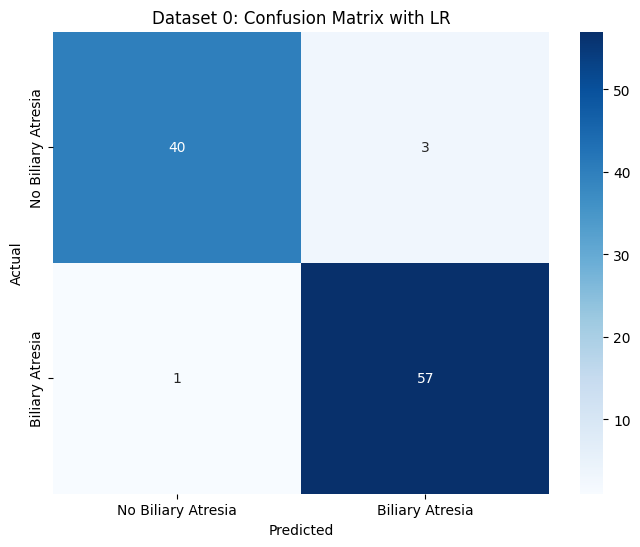

Dataset 1: LR cross-validation scores: [0.96296296 0.97530864 0.9625     0.9875     0.975     ]
Dataset 1: Accuracy with LR: 0.9604
Dataset 1: Classification Report with LR:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.95      0.98      0.97        58

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



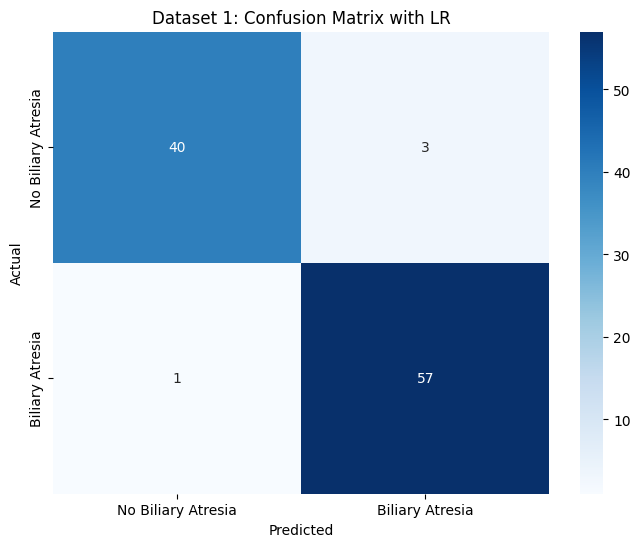

Dataset 2: LR cross-validation scores: [0.96296296 1.         0.9625     0.9875     0.975     ]
Dataset 2: Accuracy with LR: 0.9505
Dataset 2: Classification Report with LR:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.95      0.97      0.96        58

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101



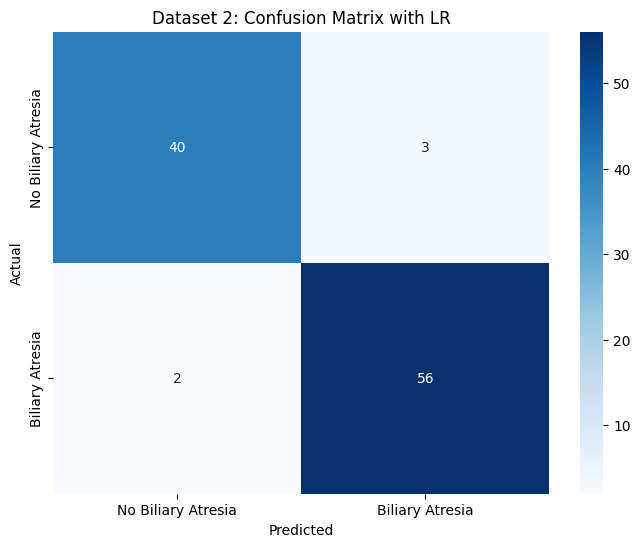

Dataset 3: LR cross-validation scores: [0.95061728 0.98765432 0.9625     0.9875     0.975     ]
Dataset 3: Accuracy with LR: 0.9505
Dataset 3: Classification Report with LR:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.95      0.97      0.96        58

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101



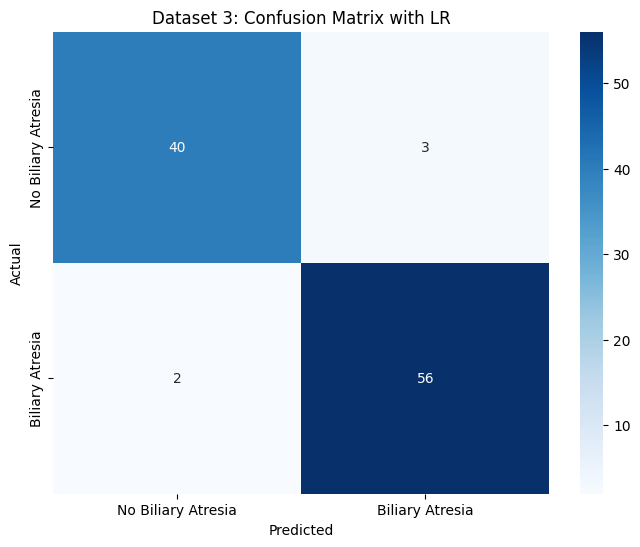

Dataset 4: LR cross-validation scores: [0.96296296 0.97530864 0.9625     0.9875     0.975     ]
Dataset 4: Accuracy with LR: 0.9505
Dataset 4: Classification Report with LR:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.95      0.97      0.96        58

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101



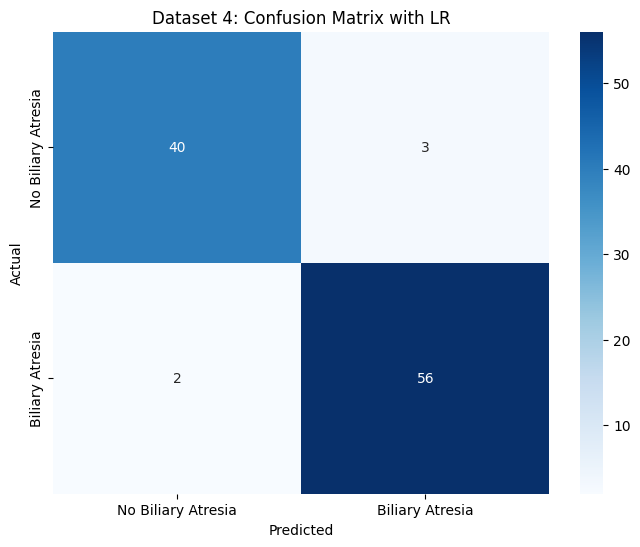

In [31]:
#new
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each imputed and encoded dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # a) Splitting the data into training and testing sets
    X_Multiple_imputation_LR = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_LR = dataset['Has_Biliary_Atresia']

    X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_Multiple_imputation_LR, Y_Multiple_imputation_LR, test_size=0.2, random_state=42)

    # b) Perform k-fold cross-validation (k=5) on the training set
    lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
    cv_scores_LR = cross_val_score(lr_classifier, X_train_LR, y_train_LR, cv=5)
    print(f"Dataset {i}: LR cross-validation scores: {cv_scores_LR}")

    # c) Initializing logistic regression model with initial parameters
    lr_classifier.fit(X_train_LR, y_train_LR)

    # d) Model evaluation with initial parameters
    y_pred_LR = lr_classifier.predict(X_test_LR)

    accuracy_LR = accuracy_score(y_test_LR, y_pred_LR)
    classification_rep_LR = classification_report(y_test_LR, y_pred_LR)
    confusion_mat_LR = confusion_matrix(y_test_LR, y_pred_LR)

    print(f"Dataset {i}: Accuracy with LR: {accuracy_LR:.4f}")
    print(f"Dataset {i}: Classification Report with LR:")
    print(classification_rep_LR)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat_LR, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Biliary Atresia', 'Biliary Atresia'],
                yticklabels=['No Biliary Atresia', 'Biliary Atresia'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Dataset {i}: Confusion Matrix with LR')
    plt.show()


In [32]:
from sklearn.metrics import precision_recall_fscore_support

# Stores the overall performance metrics for all datasets with the logistic regression parameters
overall_metrics_LR = []

# Loop through each imputed and encoded dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # ... (保持训练和测试代码不变)

    # d) Model evaluation with logistic regression parameters
    y_pred_LR = lr_classifier.predict(X_test_LR)

    # Get precision, recall, fscore with logistic regression parameters
    precision_LR, recall_LR, fscore_LR, _ = precision_recall_fscore_support(y_test_LR, y_pred_LR, average='weighted')

    # Storing metrics of the current dataset with logistic regression parameters
    overall_metrics_LR.append({
        'Dataset': i,
        'Accuracy': round(accuracy_score(y_test_LR, y_pred_LR), 4),
        'Precision': round(precision_LR, 4),
        'Recall': round(recall_LR, 4),
        'F1 Score': round(fscore_LR, 4)
    })

# Display overall metrics with logistic regression parameters
for metrics in overall_metrics_LR:
    print(f"Dataset {metrics['Dataset']} with logistic regression parameters:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")


Dataset 0 with logistic regression parameters:
  Accuracy: 0.9505
  Precision: 0.9505
  Recall: 0.9505
  F1 Score: 0.9504
Dataset 1 with logistic regression parameters:
  Accuracy: 0.9505
  Precision: 0.9505
  Recall: 0.9505
  F1 Score: 0.9504
Dataset 2 with logistic regression parameters:
  Accuracy: 0.9505
  Precision: 0.9505
  Recall: 0.9505
  F1 Score: 0.9504
Dataset 3 with logistic regression parameters:
  Accuracy: 0.9505
  Precision: 0.9505
  Recall: 0.9505
  F1 Score: 0.9504
Dataset 4 with logistic regression parameters:
  Accuracy: 0.9505
  Precision: 0.9505
  Recall: 0.9505
  F1 Score: 0.9504


In [33]:
import numpy as np


M = len(imputed_datasets_encoded)


accuracies_LR = [metrics['Accuracy'] for metrics in overall_metrics_LR]
precisions_LR = [metrics['Precision'] for metrics in overall_metrics_LR]
recalls_LR = [metrics['Recall'] for metrics in overall_metrics_LR]
f1_scores_LR = [metrics['F1 Score'] for metrics in overall_metrics_LR]


mean_accuracy_LR = np.mean(accuracies_LR)
mean_precision_LR = np.mean(precisions_LR)
mean_recall_LR = np.mean(recalls_LR)
mean_f1_score_LR = np.mean(f1_scores_LR)


variance_accuracy_LR = np.var(accuracies_LR) + (1 + 1/M) * (mean_accuracy_LR - np.mean(accuracies_LR))**2
variance_precision_LR = np.var(precisions_LR) + (1 + 1/M) * (mean_precision_LR - np.mean(precisions_LR))**2
variance_recall_LR = np.var(recalls_LR) + (1 + 1/M) * (mean_recall_LR - np.mean(recalls_LR))**2
variance_f1_score_LR = np.var(f1_scores_LR) + (1 + 1/M) * (mean_f1_score_LR - np.mean(f1_scores_LR))**2


print(f"Pooled Accuracy (LR): {mean_accuracy_LR} ± {np.sqrt(variance_accuracy_LR)}")
print(f"Pooled Precision (LR): {mean_precision_LR} ± {np.sqrt(variance_precision_LR)}")
print(f"Pooled Recall (LR): {mean_recall_LR} ± {np.sqrt(variance_recall_LR)}")
print(f"Pooled F1 Score (LR): {mean_f1_score_LR} ± {np.sqrt(variance_f1_score_LR)}")


Pooled Accuracy (LR): 0.9505000000000001 ± 1.1102230246251565e-16
Pooled Precision (LR): 0.9505000000000001 ± 1.1102230246251565e-16
Pooled Recall (LR): 0.9505000000000001 ± 1.1102230246251565e-16
Pooled F1 Score (LR): 0.9503999999999999 ± 1.1102230246251565e-16


**random research for Logistic regression**

In [143]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score


param_dist = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear solver supports both L1 and L2 regularization
}


lr_classifier = LogisticRegression(random_state=42, max_iter=1000)


random_search = RandomizedSearchCV(lr_classifier, param_distributions=param_dist, n_iter=3, scoring=make_scorer(f1_score, average='weighted'), cv=5, random_state=42)


for i, dataset in enumerate(imputed_datasets_encoded):
    X = dataset.drop('Has_Biliary_Atresia', axis=1)
    y = dataset['Has_Biliary_Atresia']


    random_search.fit(X, y)


print(f"Best parameters for dataset {1}: {random_search.best_params_}")
print(f"Best cross-validation score for dataset {1}: {random_search.best_score_:.4f}")


Best parameters for dataset 1: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Best cross-validation score for dataset 1: 0.9612


In [144]:
from sklearn.metrics import precision_recall_fscore_support

# Stores the overall performance metrics for all datasets with the best logistic regression parameters
overall_metrics_LR_best = []

# Loop through each imputed and encoded dataset
for i, dataset in enumerate(imputed_datasets_encoded):

    # Splitting the data into training and testing sets
    X_Multiple_imputation_LR = dataset.drop('Has_Biliary_Atresia', axis=1)
    Y_Multiple_imputation_LR = dataset['Has_Biliary_Atresia']

    X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_Multiple_imputation_LR, Y_Multiple_imputation_LR, test_size=0.2, random_state=42)

    # Initializing logistic regression model with the best parameters
    lr_classifier_best = LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=42, max_iter=1000)
    lr_classifier_best.fit(X_train_LR, y_train_LR)

    # Model evaluation with the best parameters
    y_pred_LR_best = lr_classifier_best.predict(X_test_LR)

    # Get precision, recall, fscore with the best parameters
    precision_LR_best, recall_LR_best, fscore_LR_best, _ = precision_recall_fscore_support(y_test_LR, y_pred_LR_best, average='weighted')

    # Storing metrics of the current dataset with the best parameters
    overall_metrics_LR_best.append({
        'Dataset': i,
        'Accuracy': round(accuracy_score(y_test_LR, y_pred_LR_best), 4),
        'Precision': round(precision_LR_best, 4),
        'Recall': round(recall_LR_best, 4),
        'F1 Score': round(fscore_LR_best, 4)
    })

# Display overall metrics with the best logistic regression parameters
for metrics in overall_metrics_LR_best:
    print(f"Dataset {metrics['Dataset']} with the best logistic regression parameters:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")


Dataset 0 with the best logistic regression parameters:
  Accuracy: 0.9604
  Precision: 0.9604
  Recall: 0.9604
  F1 Score: 0.9604
Dataset 1 with the best logistic regression parameters:
  Accuracy: 0.9604
  Precision: 0.9604
  Recall: 0.9604
  F1 Score: 0.9604
Dataset 2 with the best logistic regression parameters:
  Accuracy: 0.9604
  Precision: 0.9604
  Recall: 0.9604
  F1 Score: 0.9604
Dataset 3 with the best logistic regression parameters:
  Accuracy: 0.9604
  Precision: 0.9604
  Recall: 0.9604
  F1 Score: 0.9604
Dataset 4 with the best logistic regression parameters:
  Accuracy: 0.9604
  Precision: 0.9604
  Recall: 0.9604
  F1 Score: 0.9604


In [146]:


M = len(imputed_datasets_encoded)


accuracies_LR_best = [metrics['Accuracy'] for metrics in overall_metrics_LR_best]
precisions_LR_best = [metrics['Precision'] for metrics in overall_metrics_LR_best]
recalls_LR_best = [metrics['Recall'] for metrics in overall_metrics_LR_best]
f1_scores_LR_best = [metrics['F1 Score'] for metrics in overall_metrics_LR_best]

mean_accuracy_LR_best = np.mean(accuracies_LR_best)
mean_precision_LR_best = np.mean(precisions_LR_best)
mean_recall_LR_best = np.mean(recalls_LR_best)
mean_f1_score_LR_best = np.mean(f1_scores_LR_best)


variance_accuracy_LR_best = np.var(accuracies_LR_best) + (1 + 1/M) * (mean_accuracy_LR_best - np.mean(accuracies_LR_best))**2
variance_precision_LR_best = np.var(precisions_LR_best) + (1 + 1/M) * (mean_precision_LR_best - np.mean(precisions_LR_best))**2
variance_recall_LR_best = np.var(recalls_LR_best) + (1 + 1/M) * (mean_recall_LR_best - np.mean(recalls_LR_best))**2
variance_f1_score_LR_best = np.var(f1_scores_LR_best) + (1 + 1/M) * (mean_f1_score_LR_best - np.mean(f1_scores_LR_best))**2


print(f"Pooled Accuracy (LR with best parameters): {mean_accuracy_LR_best} ± {np.sqrt(variance_accuracy_LR_best)}")
print(f"Pooled Precision (LR with best parameters): {mean_precision_LR_best} ± {np.sqrt(variance_precision_LR_best)}")
print(f"Pooled Recall (LR with best parameters): {mean_recall_LR_best} ± {np.sqrt(variance_recall_LR_best)}")
print(f"Pooled F1 Score (LR with best parameters): {mean_f1_score_LR_best} ± {np.sqrt(variance_f1_score_LR_best)}")


Pooled Accuracy (LR with best parameters): 0.9604000000000001 ± 1.1102230246251565e-16
Pooled Precision (LR with best parameters): 0.9604000000000001 ± 1.1102230246251565e-16
Pooled Recall (LR with best parameters): 0.9604000000000001 ± 1.1102230246251565e-16
Pooled F1 Score (LR with best parameters): 0.9604000000000001 ± 1.1102230246251565e-16
